In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from  matplotlib.ticker import FuncFormatter
plt.style.use('dark_background')

## Load

In [63]:
#X_plot = pd.read_csv('X_y_plot.csv').set_index('HADM_ID')
#X.GENDER = X.GENDER.map(lambda x: 'Male' if x==0 else 'Female')
X = pd.read_csv('X_y_IV.csv').set_index('HADM_ID')
X.GENDER = X.GENDER.map(lambda x: 'Male' if x==0 else 'Female')

/Users/Bova/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
mean_LOS = X.LOS.mean()
mean_LOS

9.61984761322948

In [259]:
X[X.LOS<0]

Empty DataFrame
Columns: [ADMISSION_TYPE, ADMISSION_LOCATION, LANGUAGE, ETHNICITY, DIAGNOSIS, LOS, DOA, AGE, GENDER, DIAGNOSIS_1, DIAGNOSIS_2, DIAGNOSIS_3, N_DIAGNOSES, STROKE, HEAD_BLEED, SEIZURE, AMS, NEURO_DEGENERATIVE, NEURO_OTHER, PSYCH, CAD, HEART_FAILURE, MI, AORTIC_ANEURYSM, VALVE_DX, CARDIAC_ARREST, A_FIB, HYPOTENSION, HTN, PERICARDIAL EFFUSION, HEART BLOCK, TACHYCARDIA, DYSRHYTHMIA OTHER, ENDOCARDITIS, VASCULAR OTHER, RESPIRATORY_INFECTION, PE, RESTRICTIVE_LUNG_DX, DYSPNEA, RESPIRATORY_FAILURE, PULMONARY_EDEMA, HEMO/PNEUMOTHORAX, RESP_OTHER, GIB, GI_OBSTRUCTION, GI_INFLAMMATION, PANCREATIC_DX, IBD, GI_INFECTION, GI_OTHER, LIVER_FALURE, LIVER_OTHER, RENAL_FAILURE, UTI, RENAL_OTHER, SEPSIS, ANEMIA, INFECTION_OTHER, ALLERGIC_REACTION, SKIN_WOUND, CLOT, BLEEDING_DX, SPLENE_DX, SICKLE_CELL, AUTOIMMUNE, DKA, DM, ELECTROLYTE_DX, OBESITY, CONSTITUTION, ENDOCRINE_OTHER, TRAUMA, OD, FRACTURE, HEAD_TRAUMA, WITHDRAWAL, JOINT DX, ORTHO, POOR_PERFUSION, SPINE_DX, GI_CANCER, METASTATIC_CANCER, NEURO_CANCER, RESPIRATORY_CANCER, PANCREATIC_CANCER, HEME_CANCER, BLADDER/RENAL_CANCER, LIVER_CANCER, BREAST_CANCER, MALE_REPRO_CANCER, FEMALE_REPRO_CANCER, OTHER_CANCER, SKIN_CANCER, ENDOCRINE_CANCER, PAIN, HERNIA, MINOR, LITHIASES, FOREIGN_BODY, ORGAN_DONOR, ...]
Index: []

[0 rows x 380 columns]

In [534]:
X.LOS.max()

294

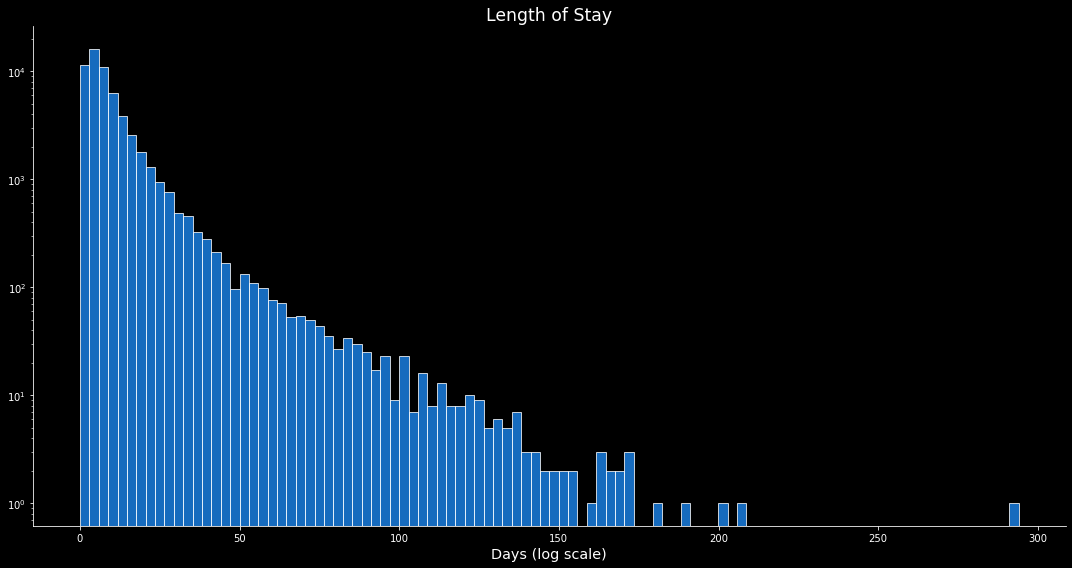

In [31]:
plt.figure(figsize = (15,8))
ax = sns.histplot(data =X           ,
                  x    ='LOS'       ,
                  bins =100         ,
                  color='dodgerblue')
plt.title('Length of Stay',
          fontdict={'fontsize':'xx-large'})
plt.xlabel('Days (log scale)',
          fontdict={'fontsize':'x-large'})
plt.ylabel('')
ax.set_yscale("log")
sns.despine()
plt.tight_layout()
plt.show()

In [25]:
X.AGE.mean()

55.11765626630491

In [44]:
X.LANGUAGE.value_counts()

0    28796
1    28702
Name: LANGUAGE, dtype: int64

In [543]:
32242/(32242+25256)

0.5607499391283175

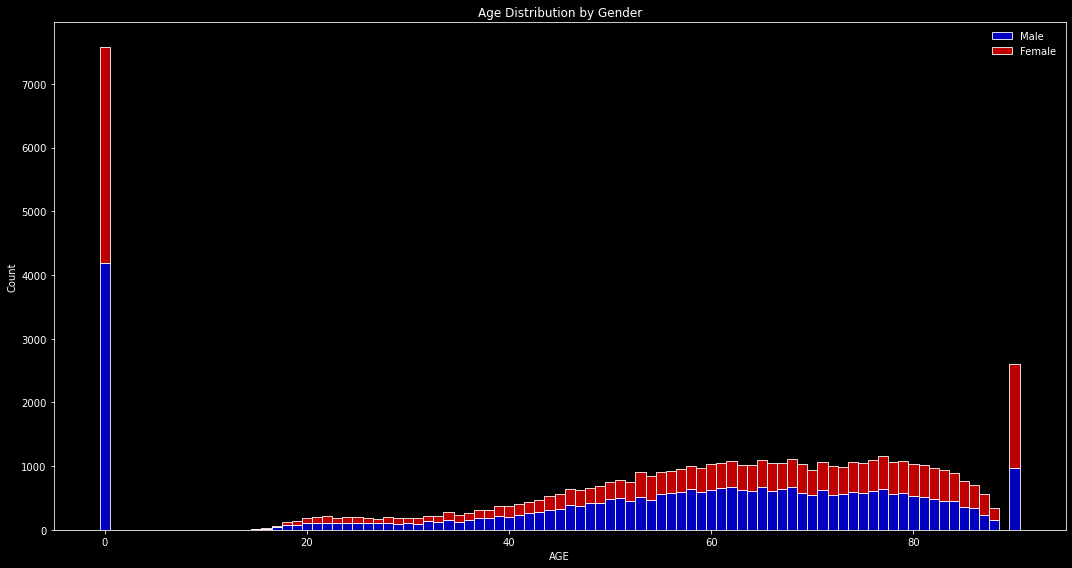

In [133]:
plt.figure(figsize = (15,8))
sns.histplot(data=X,
             x='AGE',
             hue='GENDER',
             palette=['red','blue'],
             multiple='stack',
             discrete=True)
plt.title('Age Distribution by Gender')
plt.legend(['Male','Female'],frameon=False)
sns.despine()
plt.tight_layout()

['WHITE', 'WHITE', 'WHITE', 'WHITE', 'WHITE', ..., 'WHITE', 'WHITE', 'WHITE', 'WHITE', 'WHITE']
Length: 58929
Categories (7, object): ['WHITE', 'UNKNOWN', 'BLACK', 'LATINX', 'ASIAN', 'MULTIRACIAL', 'NATIVE']

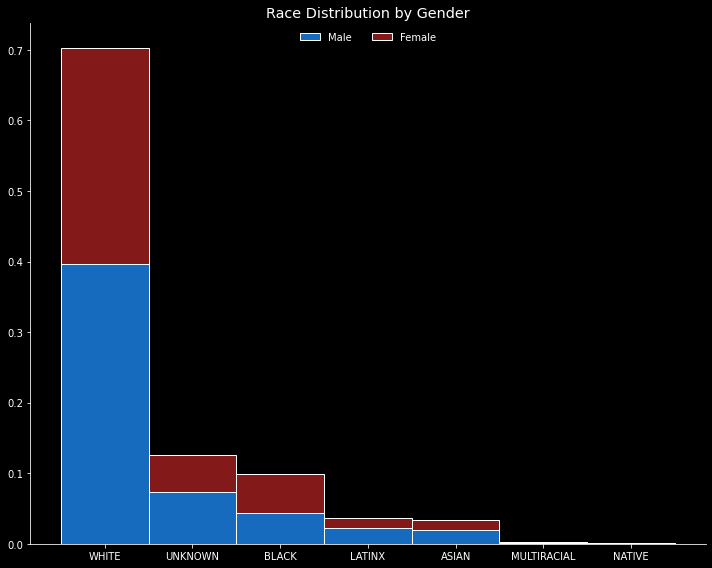

In [44]:
X.ETHNICITY = pd.Categorical(X.ETHNICITY,['WHITE','UNKNOWN','BLACK','LATINX','ASIAN','MULTIRACIAL','NATIVE'])

fig,ax = plt.subplots(figsize = (10,8))
sns.histplot(data=X,
             x='ETHNICITY',
             hue='GENDER',
             stat='density',
             palette=['firebrick','dodgerblue'],
             multiple='stack',
             discrete=True,
             ax=ax)
plt.title('Race Distribution by Gender',
          fontdict={'fontsize':'x-large'})
plt.legend(['Male','Female'],
           frameon=False,
           ncol=2,
           loc='upper center')
#ax2=ax.twinx()
#ax2.set_ylabel('count')
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [49]:
X.columns

Index(['ADMISSION_TYPE', 'ADMISSION_LOCATION', 'LANGUAGE', 'ETHNICITY', 'LOS',
       'AGE', 'GENDER', 'N_DIAGNOSES', 'GI_INFECTION', 'TB',
       ...
       'TAG_FEMALE_REPRO_CANCER', 'TAG_OTHER_CANCER', 'TAG_PAIN', 'TAG_HERNIA',
       'TAG_MINOR', 'TAG_LITHIASES', 'TAG_FOREIGN_BODY', 'TAG_NONSPECIFIC',
       'TAG_PROCEDURE', 'TAG_PREMATURE'],
      dtype='object', length=419)

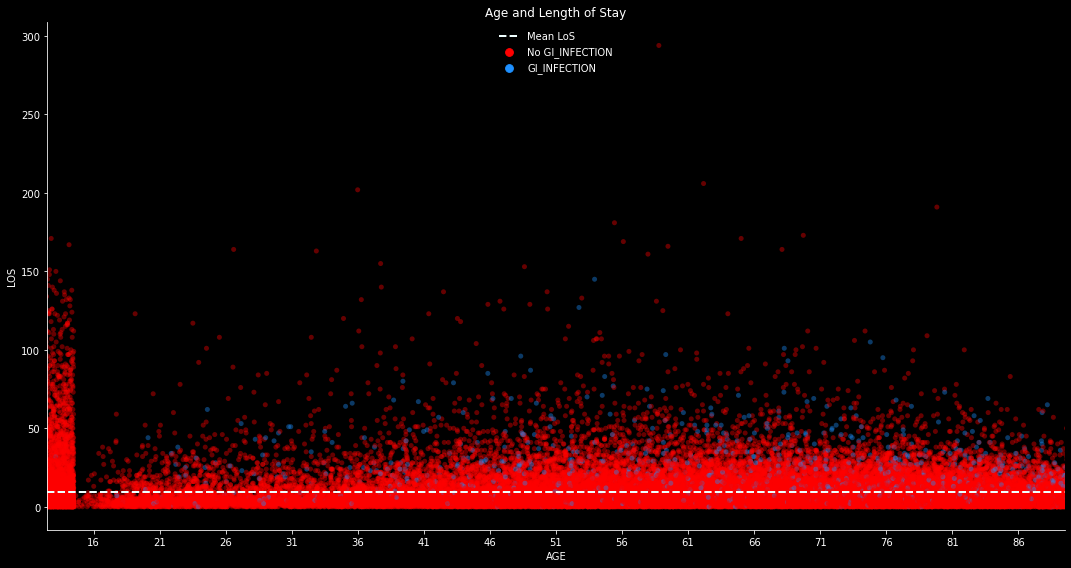

In [53]:
c='GI_INFECTION'
plt.figure(figsize = (15,8))
ax = sns.stripplot(data   =X,
                   x      ='AGE',
                   y      ='LOS',
                   hue    =X[c].map(lambda x: f'No {c}' if x==0 else c),
                   palette=['red','dodgerblue'],
                   jitter=1.5,
                   alpha=0.4,
                   zorder=1)
xticks=ax.xaxis.get_major_ticks()
ax.axhline(mean_LOS,
           color='azure',
           linestyle='--',
           label='Mean LoS',
           linewidth=2,
           zorder=2)
for i in range(len(xticks)):
    if (i-3)%5!=0:
        xticks[i].set_visible(False)
sns.despine()
plt.title('Age and Length of Stay')
plt.legend(frameon=False,
           loc='upper center')
plt.tight_layout()

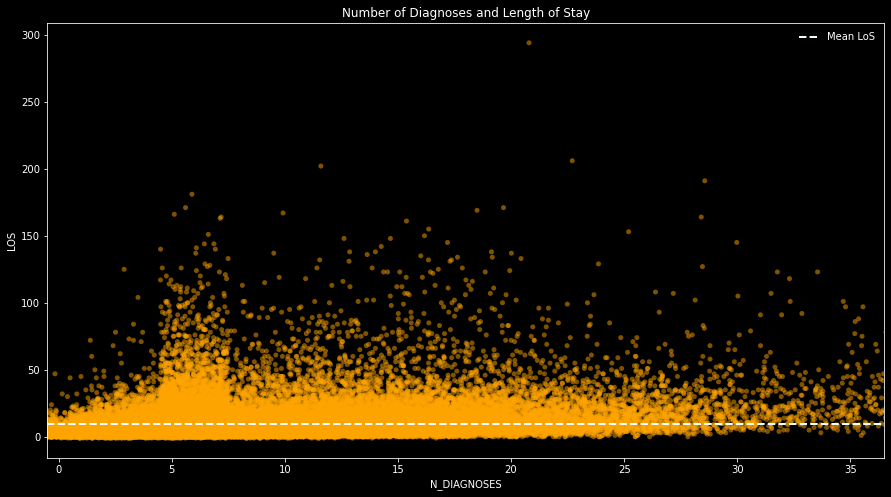

In [157]:
plt.figure(figsize = (15,8))
ax = sns.stripplot(data   =X,
                   x      ='N_DIAGNOSES',
                   y      ='LOS',
                   #hue    ='GENDER',
                   #palette=['red','blue'],
                   jitter =1.5,
                   alpha  =0.5,
                   zorder=1)
xticks=ax.xaxis.get_major_ticks()
ax.axhline(mean_LOS,
           color='azure',
           linestyle='--',
           label='Mean LoS',
           linewidth=2,
           zorder=2)
for i in range(len(xticks)):
    if i%5!=0:
        xticks[i].set_visible(False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.title('Number of Diagnoses and Length of Stay')
plt.legend(frameon=False)

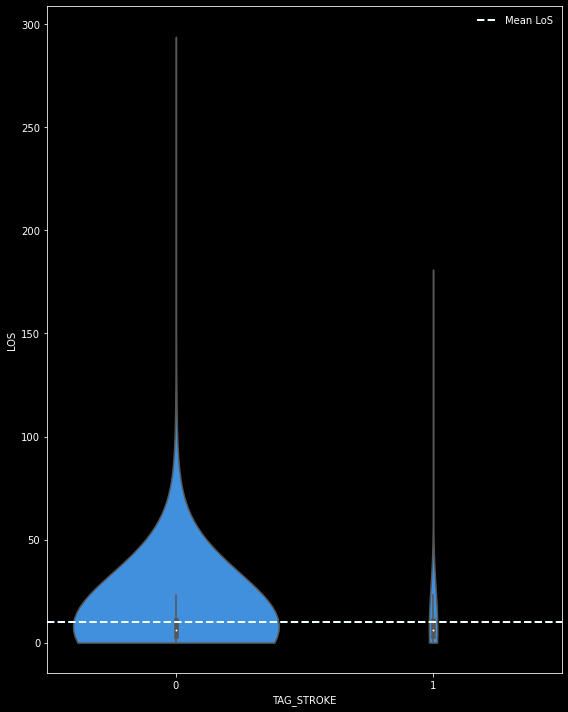

In [555]:
plt.figure(figsize = (8,10))
ax = sns.violinplot(data        =X       ,
                    x           ='TAG_STROKE',
                    y           ='LOS'   ,
                    color       ='dodgerblue',
                    scale       ='count' ,
                    cut         =0       ,
                    bw          =2       ,
                    saturation  =0.7     ,
                    zorder      =1       )
ax.axhline(mean_LOS            ,
           color    ='azure'   ,
           linestyle='--'      ,  
           label    ='Mean LoS',
           linewidth=2         ,
           zorder   =2         )
#plt.title('Number of Diagnoses and Length of Stay')
plt.legend(frameon=False)
plt.tight_layout()

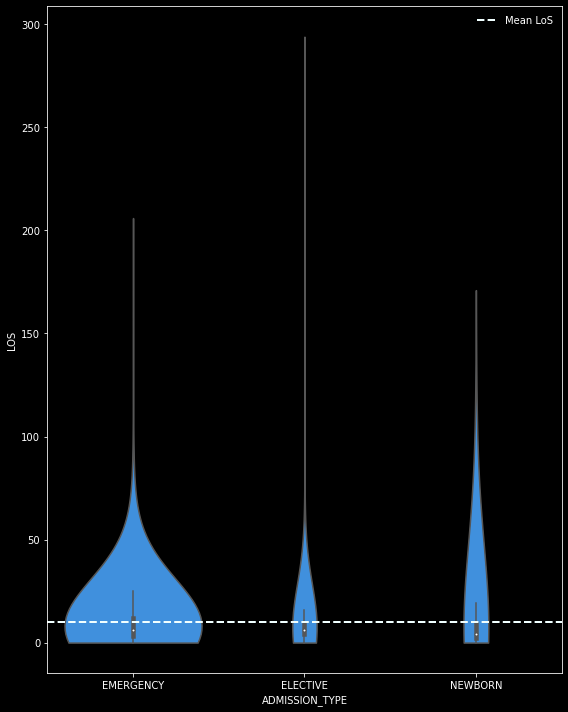

In [548]:
plt.figure(figsize = (8,10))
ax = sns.violinplot(data        =X               ,
                    x           ='ADMISSION_TYPE',
                    y           ='LOS'           ,
                    color       ='dodgerblue'    ,
                    scale       ='count'         ,
                    cut         =0               ,
                    bw          =2               ,
                    saturation  =0.7             ,
                    zorder      =1               )
ax.axhline(mean_LOS            ,
           color    ='azure'   ,
           linestyle='--'      ,  
           label    ='Mean LoS',
           linewidth=2         ,
           zorder   =2         )
#plt.title('Number of Diagnoses and Length of Stay')
plt.legend(frameon=False)
plt.tight_layout()

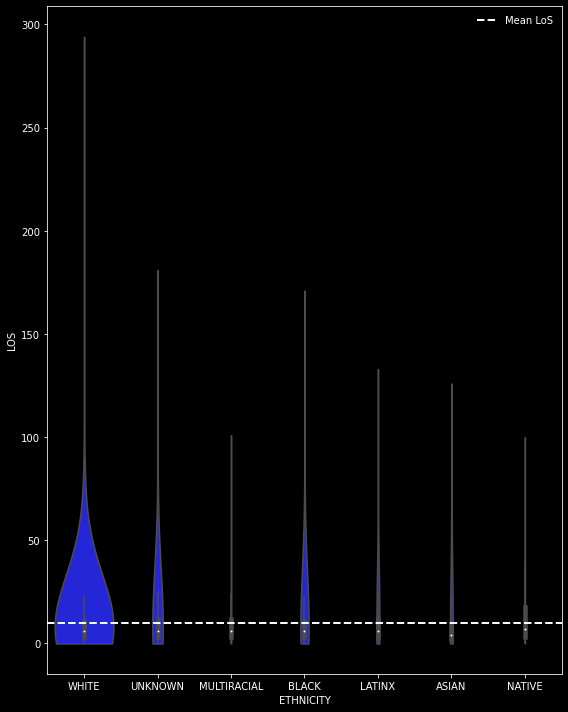

In [510]:
plt.figure(figsize = (8,10))
ax = sns.violinplot(data        =X          ,
                    x           ='ETHNICITY',
                    y           ='LOS'      ,
                    color       ='blue'   ,
                    scale       ='count'    ,
                    cut         =0          ,
                    bw          =2          ,
                    saturation  =0.7        ,
                    zorder      =1          )
ax.axhline(mean_LOS            ,
           color    ='azure'   ,
           linestyle='--'      ,  
           label    ='Mean LoS',
           linewidth=2         ,
           zorder   =2         )
#plt.title('Number of Diagnoses and Length of Stay')
plt.legend(frameon=False)
plt.tight_layout()

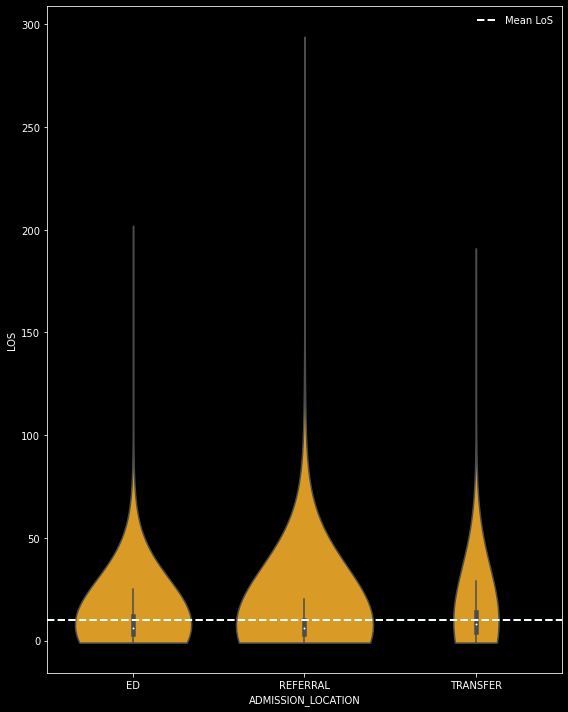

In [205]:
plt.figure(figsize = (8,10))
ax = sns.violinplot(data        =X                   ,
                    x           ='ADMISSION_LOCATION',
                    y           ='LOS'               ,
                    color       ='orange'            ,
                    scale       ='count'             ,
                    cut         =0                   ,
                    bw          =2                   ,
                    saturation  =0.7                 ,
                    zorder      =1                   )
ax.axhline(mean_LOS            ,
           color    ='azure'   ,
           linestyle='--'      ,  
           label    ='Mean LoS',
           linewidth=2         ,
           zorder   =2         )
#plt.title('Number of Diagnoses and Length of Stay')
plt.legend(frameon=False)
plt.tight_layout()

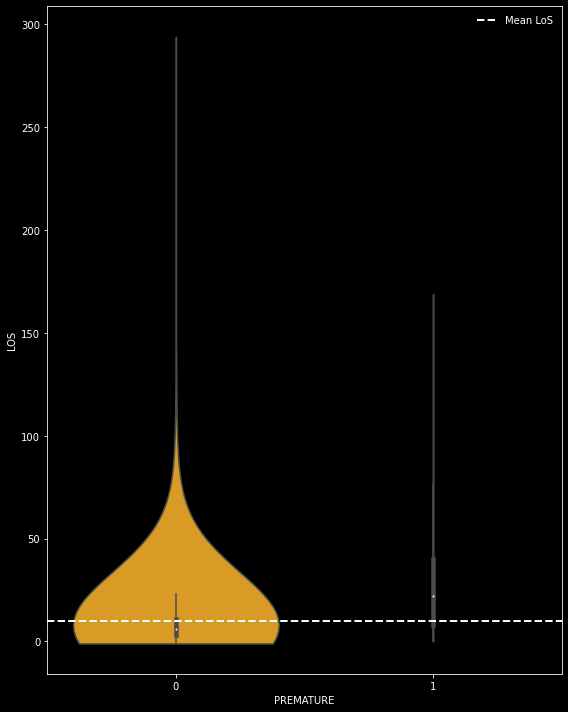

In [219]:
plt.figure(figsize = (8,10))
ax = sns.violinplot(data        =X       ,
                    x           ='PREMATURE',
                    y           ='LOS'   ,
                    color       ='orange',
                    scale       ='count' ,
                    cut         =0       ,
                    bw          =2       ,
                    saturation  =0.7     ,
                    zorder      =1       )
ax.axhline(mean_LOS            ,
           color    ='azure'   ,
           linestyle='--'      ,  
           label    ='Mean LoS',
           linewidth=2         ,
           zorder   =2         )
#plt.title('Number of Diagnoses and Length of Stay')
plt.legend(frameon=False)
plt.tight_layout()

In [214]:
for c in X.columns:
    print('\n',X.groupby(c).LOS.mean())


 ADMISSION_TYPE
ELECTIVE      8.816426
EMERGENCY     9.648485
NEWBORN      11.524443
Name: LOS, dtype: float64

 ADMISSION_LOCATION
ED           9.345996
REFERRAL     9.671857
TRANSFER    11.252635
Name: LOS, dtype: float64

 LANGUAGE
0    10.721871
1     8.845063
Name: LOS, dtype: float64

 ETHNICITY
ASIAN           8.942175
BLACK           9.865459
LATINX          9.669082
MULTIRACIAL    10.606299
NATIVE         12.492958
UNKNOWN        10.212668
WHITE           9.735467
Name: LOS, dtype: float64

 LOS
-1       -1
 0        0
 1        1
 2        2
 3        3
       ... 
 181    181
 191    191
 202    202
 206    206
 294    294
Name: LOS, Length: 162, dtype: int64

 AGE
0     11.730987
14     2.500000
15     5.500000
16     3.840000
17     8.301587
        ...    
85     8.700000
86     8.857347
87     8.028319
88     7.238372
90     7.113880
Name: LOS, Length: 77, dtype: float64

 GENDER
Female    9.721175
Male      9.834998
Name: LOS, dtype: float64

 N_DIAGNOSES
3.0      3.07

<AxesSubplot:>

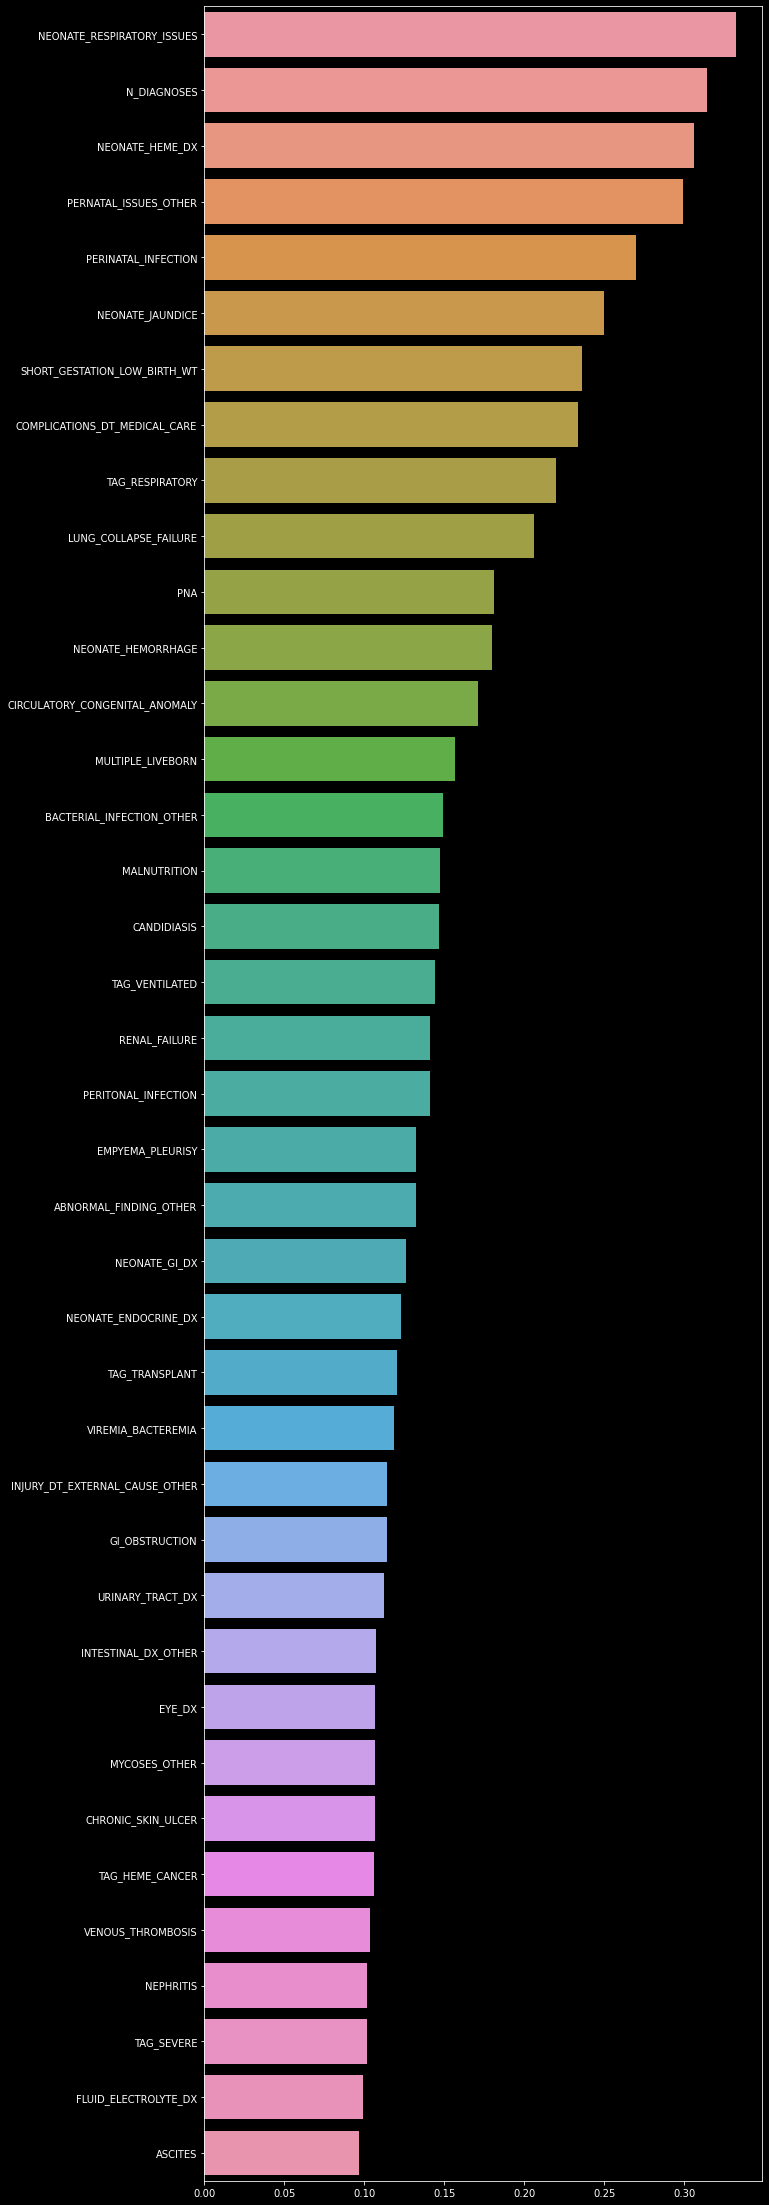

In [59]:
#c_matrix = X.corr()
plt.figure(figsize = (10,40))
correlation_los = abs(c_matrix.LOS).sort_values(ascending=False)[1:40]
sns.barplot(x=correlation_los.values,
            y=correlation_los.index)

In [61]:
X

ADMISSION_TYPE ADMISSION_LOCATION  LANGUAGE ETHNICITY  LOS  AGE  \
HADM_ID                                                                   
165315       EMERGENCY                 ED         0     WHITE    1   64   
152223        ELECTIVE           REFERRAL         0     WHITE    5   70   
124321       EMERGENCY           TRANSFER         1     WHITE    6   74   
161859       EMERGENCY           TRANSFER         0     WHITE    2   38   
129635       EMERGENCY                 ED         0     WHITE    3   58   
...                ...                ...       ...       ...  ...  ...   
191113       EMERGENCY           REFERRAL         1     WHITE    2   19   
101071       EMERGENCY           REFERRAL         1     WHITE    0   83   
122631        ELECTIVE           REFERRAL         1     WHITE    8   42   
170407       EMERGENCY                 ED         1     WHITE   41   60   
190264       EMERGENCY           REFERRAL         1     WHITE    1   63   

         GENDER  N_DIAGNOSES  GI_INFECTION  TB  ...  TAG_FEMALE_REPRO_CANCER  \
HADM_ID                                         ...                            
165315   Female          7.0             0   0  ...                        0   
152223     Male          8.0             0   0  ...                        0   
124321     Male         10.0             0   0  ...                        0   
161859     Male          4.0             0   0  ...                        0   
129635     Male          4.0             0   0  ...                        0   
...         ...          ...           ...  ..  ...                      ...   
191113   Female          8.0             0   0  ...                        0   
101071   Female          4.0             0   0  ...                        0   
122631     Male         17.0             0   0  ...                        0   
170407   Female          9.0             0   0  ...                        0   
190264   Female          7.0             0   0  ...                        0   

         TAG_OTHER_CANCER  TAG_PAIN  TAG_HERNIA  TAG_MINOR  TAG_LITHIASES  \
HADM_ID                                                                     
165315                  0         0           0          0              0   
152223                  0         0           0          0              0   
124321                  0         0           0          0              0   
161859                  0         0           0          0              0   
129635                  0         0           0          0              0   
...                   ...       ...         ...        ...            ...   
191113                  0         0           0          0              0   
101071                  0         0           0          0              0   
122631                  0         0           0          0              0   
170407                  0         0           0          0              0   
190264                  0         0           0          0              0   

         TAG_FOREIGN_BODY  TAG_NONSPECIFIC  TAG_PROCEDURE  TAG_PREMATURE  
HADM_ID                                                                   
165315                  0                0              0              0  
152223                  0                0              0              0  
124321                  0                0              0              0  
161859                  0                0              0              0  
129635                  0                0              0              0  
...                   ...              ...            ...            ...  
191113                  0                0              0              0  
101071                  0                0              0              0  
122631                  0                0              0              0  
170407                  0                0              0              0  
190264                  0                0              0              0  

[58929 rows x

In [60]:
value_counts = X.DIAGNOSIS.value_counts()
value_counts = pd.DataFrame({'Diagnosis' :value_counts.index,
                             'Occurence' :value_counts.values})

AttributeError: 'DataFrame' object has no attribute 'DIAGNOSIS'

In [54]:
plt.figure(figsize = (7,20))
sns.barplot(data=value_counts.head(50),
            y='Diagnosis',
            x='Occurence',
            hue='LOS')

NameError: name 'value_counts' is not defined

<Figure size 504x1440 with 0 Axes>

In [300]:
value_counts.head(50)

Diagnosis  Occurence  \
0                                             NEWBORN       7422   
1                                           PNEUMONIA       1566   
2                                              SEPSIS       1182   
3                            CONGESTIVE HEART FAILURE        929   
4                             CORONARY ARTERY DISEASE        851   
5                                          CHEST PAIN        776   
6                               ALTERED MENTAL STATUS        709   
7                             INTRACRANIAL HEMORRHAGE        693   
8                              GASTROINTESTINAL BLEED        682   
9   CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...        607   
10                                     UPPER GI BLEED        578   
11                                     ABDOMINAL PAIN        549   
12                                              FEVER        510   
13  CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...        465   
14                                     LOWER GI BLEED        441   
15                              DIABETIC KETOACIDOSIS        439   
16                                           S/P FALL        439   
17                                        HYPOTENSION        415   
18                            SUBARACHNOID HEMORRHAGE        394   
19         STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK        340   
20                                            SEIZURE        285   
21                                ACUTE RENAL FAILURE        270   
22                                  SUBDURAL HEMATOMA        266   
23                                       PANCREATITIS        251   
24                                RESPIRATORY FAILURE        247   
25                         S/P MOTOR VEHICLE ACCIDENT        238   
26                                            DYSPNEA        232   
27                                SHORTNESS OF BREATH        229   
28                       CORONARY ARTERY DISEASE\CATH        226   
29                            ACUTE CORONARY SYNDROME        225   
30                       UPPER GASTROINTESTINAL BLEED        220   
31                                       BLUNT TRAUMA        216   
32                                           OVERDOSE        206   
33                            ACUTE SUBDURAL HEMATOMA        194   
34          AORTIC STENOSIS\AORTIC VALVE REPLACEMENT         192   
35                           ASTHMA;COPD EXACERBATION        191   
36                                      LIVER FAILURE        190   
37                          ABDOMINAL AORTIC ANEURYSM        187   
38                              MYOCARDIAL INFARCTION        170   
39                               RESPIRATORY DISTRESS        168   
40                       LOWER GASTROINTESTINAL BLEED        168   
41                                         CELLULITIS        166   
42                                    CHEST PAIN\CATH        165   
43                                             ANEMIA        156   
44                        ACUTE MYOCARDIAL INFARCTION        154   
45                                    UNSTABLE ANGINA        151   
46                                        BRAIN TUMOR        149   
47                                         BRAIN MASS        149   
48                                           GI BLEED        148   
49                                     CARDIAC ARREST        141   

                                            Mean LoS   
0   DIAGNOSIS
0     9.539660
1    11.451091
Name: ...  
1   DIAGNOSIS
0    9.801706
1    9.239464
Name: LO...  
2   DIAGNOSIS
0     9.777648
1    10.203046
Name: ...  
3   DIAGNOSIS
0    9.785519
1    9.839612
Name: LO...  
4   DIAGNOSIS
0    9.797271
1    9.062280
Name: LO...  
5   DIAGNOSIS
0    9.811995
1    7.914948
Name: LO...  
6   DIAGNOSIS
0    9.801564
1    8.571227
Name: LO...  
7   DIAGNOSIS
0    9.802377
1    8.476190
Name: LO...  
8   DIAGNOSIS
0    9.816953
1    7.240469
Name: LO...  
9   DIAGNOSIS
0

In [308]:
value_counts['Mean LoS '] = [X.groupby(X.DIAGNOSIS.map(lambda x: 1 if x==d else 0)).LOS.mean()[1]
                             for d in value_counts.Diagnosis]

In [307]:
X.groupby(X.DIAGNOSIS.map(lambda x: 1 if x=='NEWBORN' else 0)).LOS.mean()[1]

11.45109135004042

In [309]:
dx = pd.read_csv('mimic_iii_data/DIAGNOSES_ICD.csv.gz',compression='gzip')\
       .drop(['SUBJECT_ID','SEQ_NUM','ROW_ID'],axis=1).dropna()

def convert_icd(icd):
    if icd.isdigit():
        return float(f'{icd[:3]}.{icd[3:]}')
    elif icd[0]=='V':
        return float(f'1{icd[1:3]}.{icd[3:]}')
    else:
        return float(f'2{icd[1:3]}.{icd[3:]}')

dx['ICD9'] = dx.ICD9_CODE.map(lambda x:convert_icd(x))

In [324]:
dx = pd.read_csv('mimic_iii_data/DIAGNOSES_ICD.csv.gz',compression='gzip')\
       .drop(['SUBJECT_ID','SEQ_NUM','ROW_ID'],axis=1).dropna()

def convert_icd(icd):
    if icd.isdigit():
        return float(f'{icd[:3]}')
    elif icd[0]=='V':
        return float(f'10{icd[1:4]}')
    else:
        return float(f'20{icd[1:4]}')

dx['ICD9'] = dx.ICD9_CODE.map(lambda x:convert_icd(x))

<AxesSubplot:xlabel='ICD9', ylabel='Count'>

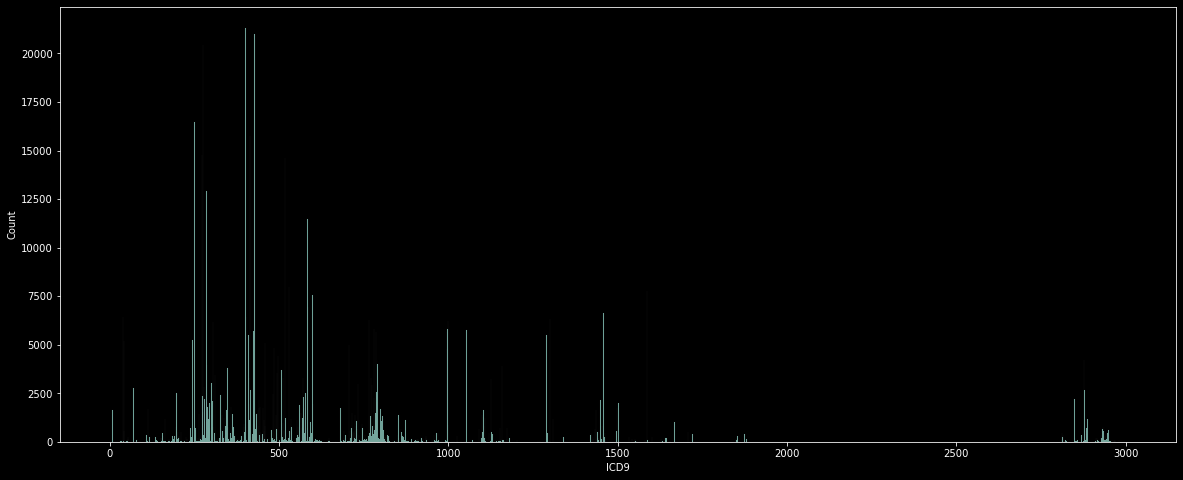

In [316]:
plt.figure(figsize = (20,8))
sns.histplot(dx.ICD9,
             bins=3000)

In [62]:
import plotly.express as px
fig = px.histogram(dx[dx.ICD9>1000], 
                   x='ICD9',
                   nbins=3000,
                   width=1200, 
                   height=800)
fig.show()

NameError: name 'dx' is not defined

In [381]:
dx[(dx.ICD9>999)&(dx.ICD9<2000)].ICD9_CODE.value_counts()[6900:]

Series([], Name: ICD9_CODE, dtype: int64)

In [442]:
e = dx.ICD9_CODE.value_counts().index.sort_values()[5991:6493]
e = e.map(lambda x: float(f'{x[1:4]}.{x[4:]}') if x[1:5]!='0000' else 0)

In [447]:
import plotly.express as px
fig = px.histogram(x=e,
                   nbins=4000,
                   width=1200, 
                   height=800)
fig.show()

In [467]:
X.SICKLE_CELL[X.SICKLE_CELL==1]

HADM_ID
105307    1
109288    1
100168    1
127364    1
173698    1
136696    1
173837    1
174563    1
Name: SICKLE_CELL, dtype: int64

In [462]:
tags = X.columns[13:134]

X[tags].sum().sort_values()[:50]

GI_INFECTION                              2.0
OTHER                                     3.0
ORGAN_DONOR                               5.0
SICKLE_CELL                               8.0
PREGNANCY_NORMAL                          9.0
TAG_SKIN_SOFT_TISSUESKIN_SOFT_TISSUE     11.0
NON-TRAUMA_ACCIDENTS                     12.0
AUTOIMMUNE                               14.0
FEMALE_REPRO_DX                          28.0
ORTHO                                    34.0
ENDOCRINE_OTHER                          36.0
ENDOCRINE_CANCER                         40.0
NEURO_DEGENERATIVE                       49.0
IBD                                      55.0
SKIN_WOUND                               63.0
TAG_BREAST                               65.0
PANCREATIC_DX                            69.0
OBESITY                                  73.0
MALE_REPRO_CANCER                        78.0
JOINT DX                                 86.0
SKIN_CANCER                              88.0
SPLENE_DX                         

In [472]:
X_2

ADMISSION_TYPE ADMISSION_LOCATION  LANGUAGE ETHNICITY  LOS  AGE  \
HADM_ID                                                                   
165315       EMERGENCY                 ED         0     WHITE    1   64   
152223        ELECTIVE           REFERRAL         0     WHITE    5   70   
124321       EMERGENCY           TRANSFER         1     WHITE    6   74   
161859       EMERGENCY           TRANSFER         0     WHITE    2   38   
129635       EMERGENCY                 ED         0     WHITE    3   58   
...                ...                ...       ...       ...  ...  ...   
191113       EMERGENCY           REFERRAL         1     WHITE    2   19   
101071       EMERGENCY           REFERRAL         1     WHITE    0   83   
122631        ELECTIVE           REFERRAL         1     WHITE    8   42   
170407       EMERGENCY                 ED         1     WHITE   41   60   
190264       EMERGENCY           REFERRAL         1     WHITE    1   63   

         GENDER  N_DIAGNOSES  GI_INFECTION  TB  ...  TAG_FEMALE_REPRO_CANCER  \
HADM_ID                                         ...                            
165315        1          7.0             0   0  ...                        0   
152223        0          8.0             0   0  ...                        0   
124321        0         10.0             0   0  ...                        0   
161859        0          4.0             0   0  ...                        0   
129635        0          4.0             0   0  ...                        0   
...         ...          ...           ...  ..  ...                      ...   
191113        1          8.0             0   0  ...                        0   
101071        1          4.0             0   0  ...                        0   
122631        0         17.0             0   0  ...                        0   
170407        1          9.0             0   0  ...                        0   
190264        1          7.0             0   0  ...                        0   

         TAG_OTHER_CANCER  TAG_PAIN  TAG_HERNIA  TAG_MINOR  TAG_LITHIASES  \
HADM_ID                                                                     
165315                  0         0           0          0              0   
152223                  0         0           0          0              0   
124321                  0         0           0          0              0   
161859                  0         0           0          0              0   
129635                  0         0           0          0              0   
...                   ...       ...         ...        ...            ...   
191113                  0         0           0          0              0   
101071                  0         0           0          0              0   
122631                  0         0           0          0              0   
170407                  0         0           0          0              0   
190264                  0         0           0          0              0   

         TAG_FOREIGN_BODY  TAG_NONSPECIFIC  TAG_PROCEDURE  TAG_PREMATURE  
HADM_ID                                                                   
165315                  0                0              0              0  
152223                  0                0              0              0  
124321                  0                0              0              0  
161859                  0                0              0              0  
129635                  0                0              0              0  
...                   ...              ...            ...            ...  
191113                  0                0              0              0  
101071                  0                0              0              0  
122631                  0                0              0              0  
170407                  0                0              0              0  
190264                  0                0              0              0  

[58929 rows x

GI_INFECTION


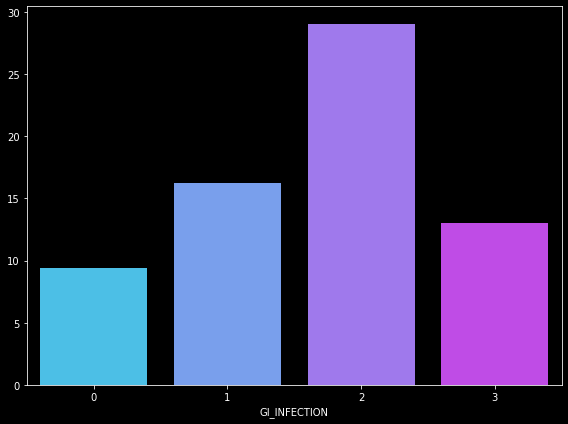

TB


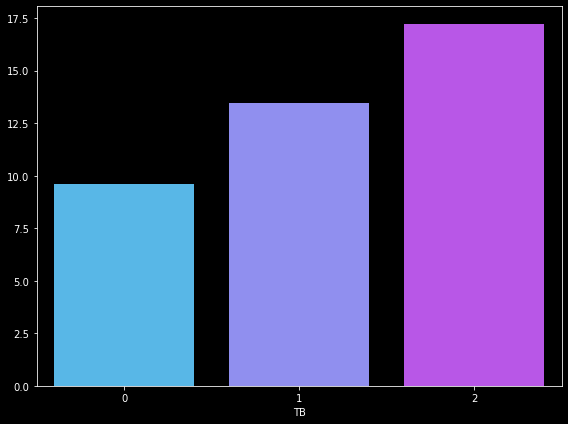

BACTERIAL_INFECTION_OTHER


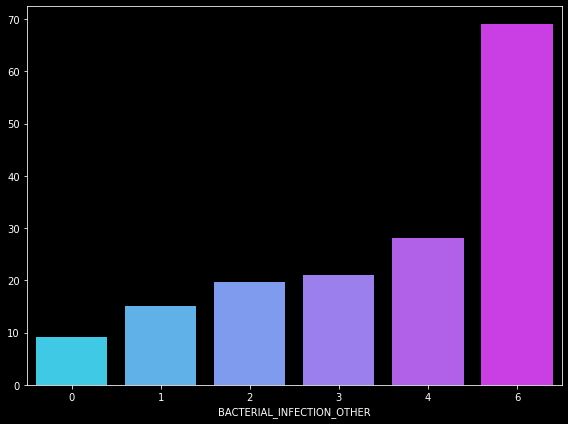

HIV


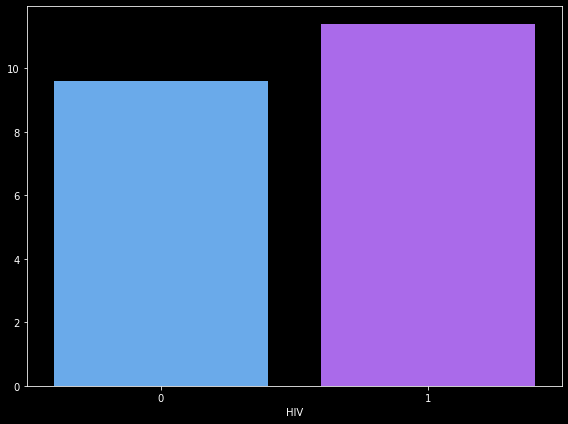

VIRAL_CNS


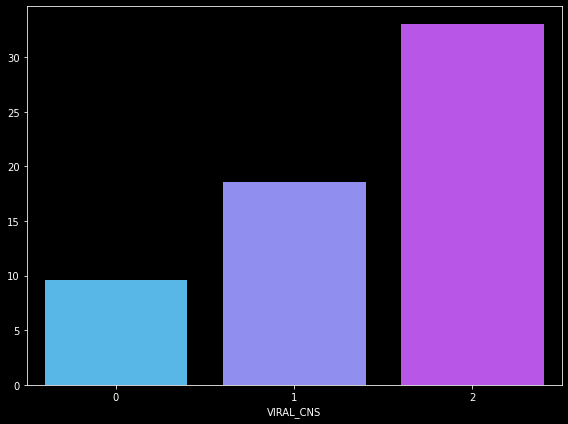

VIRAL_HEPATITIS


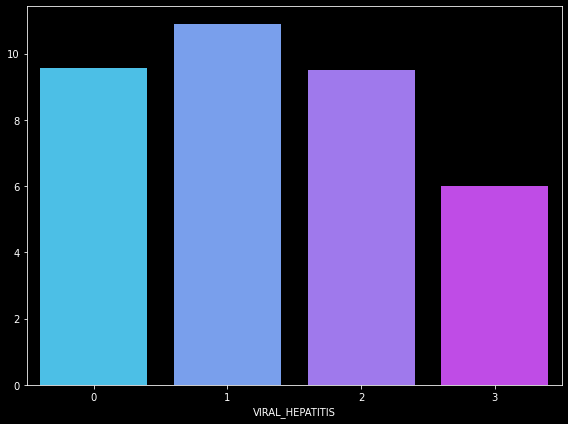

VIRUS_OTHER


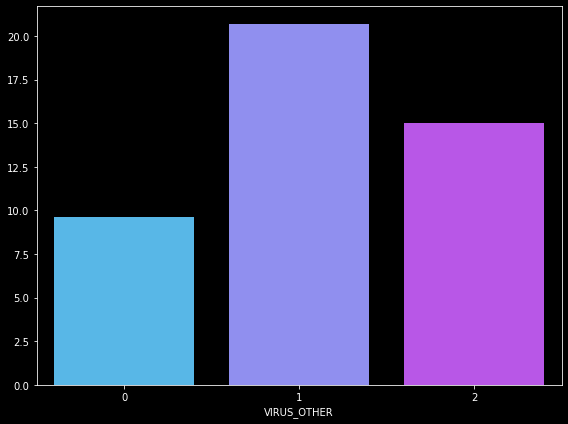

CHLAMIDIA


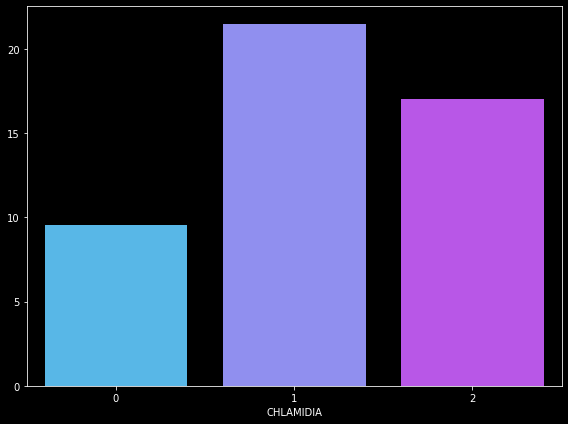

ARTHROPOD_BORN_INFECTION


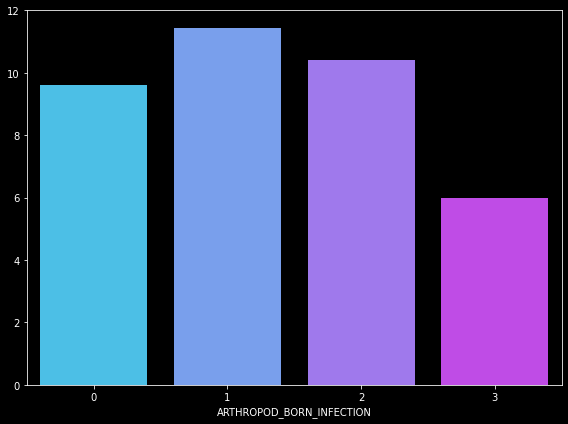

SYPHILIS


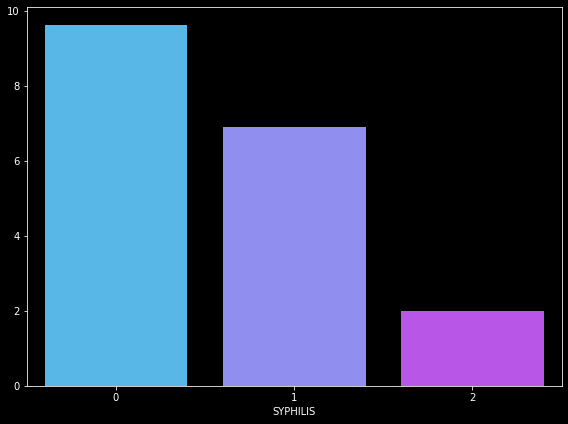

DERMATOPHYTOSIS


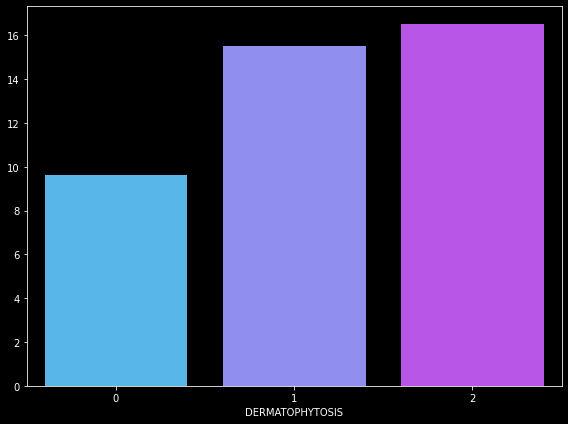

CANDIDIASIS


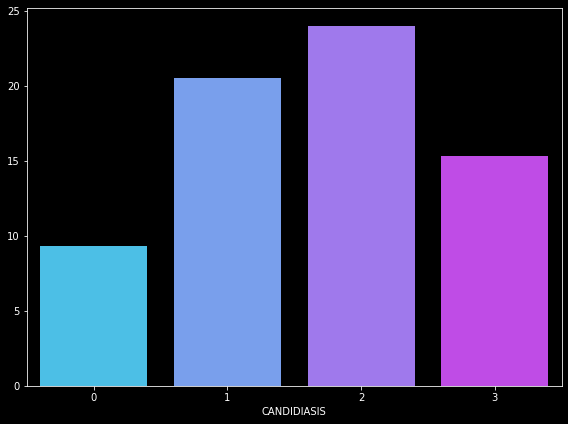

MYCOSES_OTHER


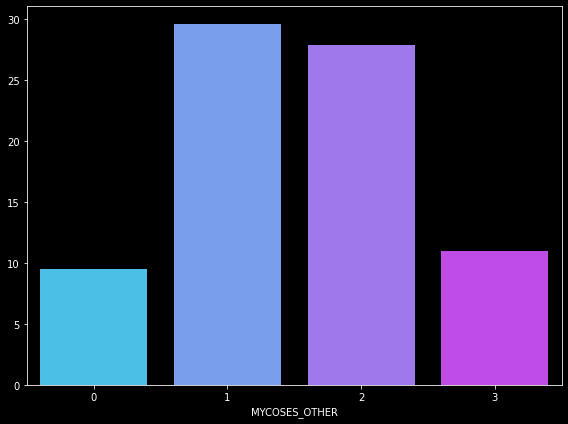

HELMINTHIASIS


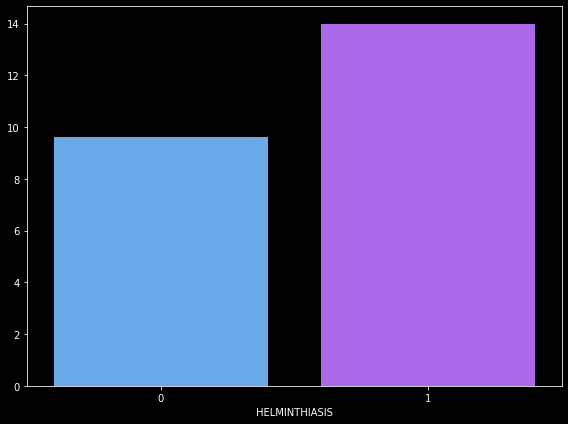

INFECTION_OTHER


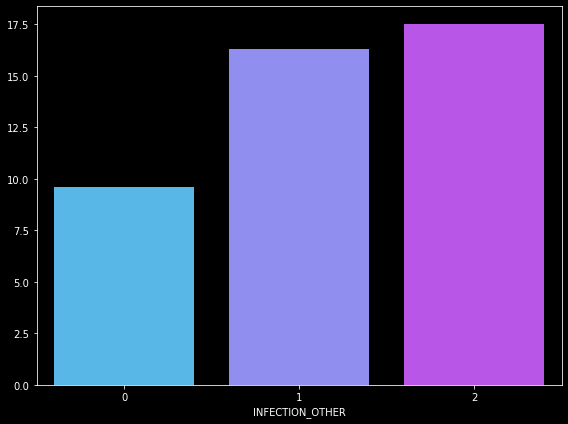

SARCOIDOSIS


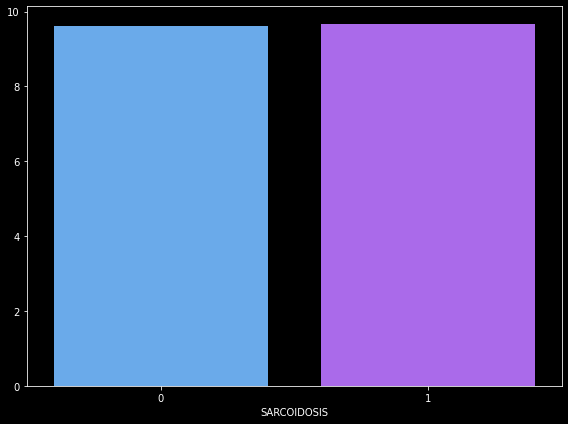

POLIO


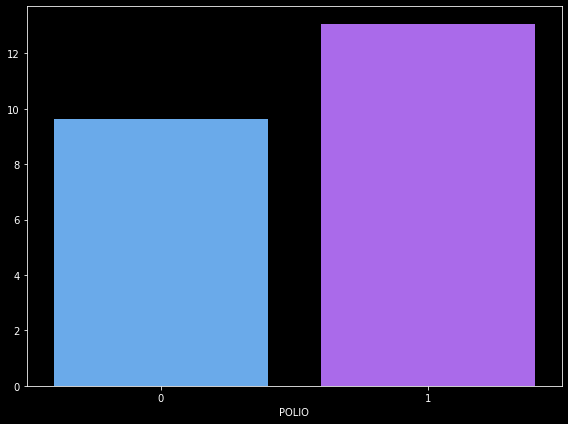

ORAL_PHARYNGERAL_CANCER


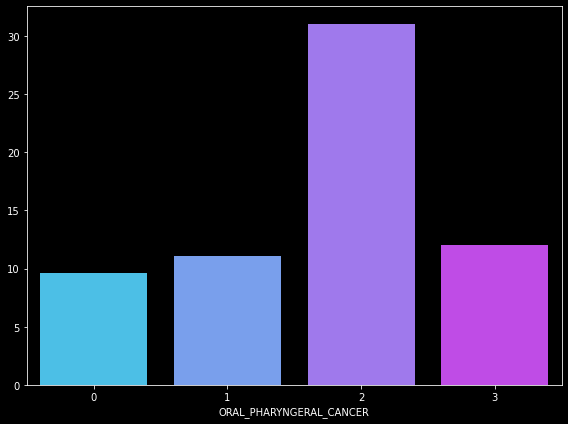

ESOPHAGUS_STOMACH_CANCER


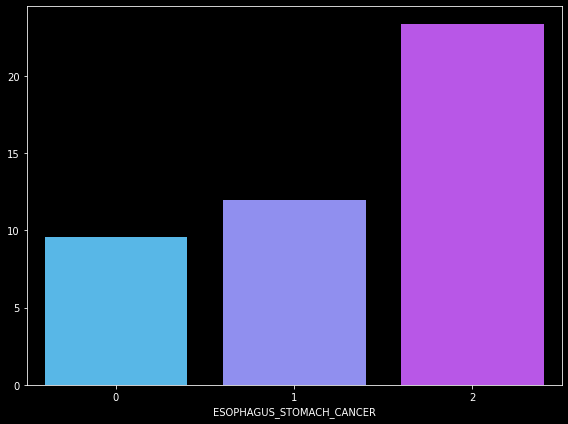

INTESTINAL_CANCER


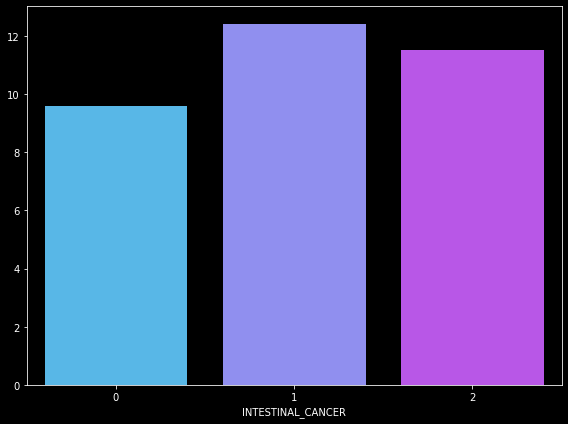

LIVER_CANCER


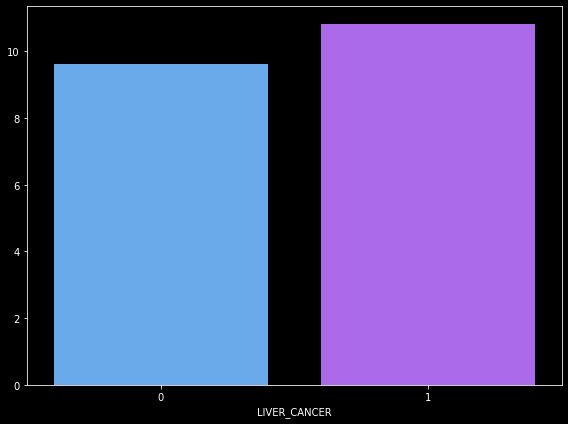

GALLBLADDER_CANCER


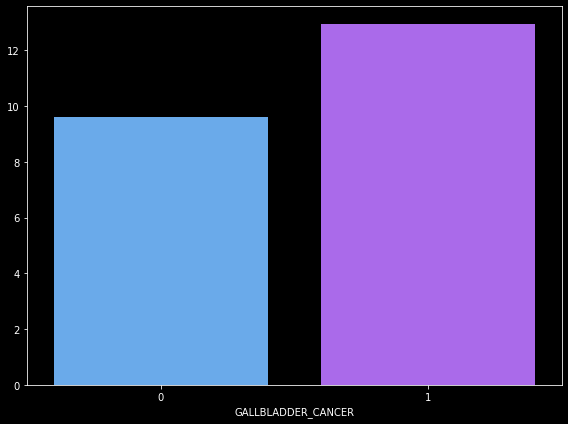

PANCREATIC_CANCER


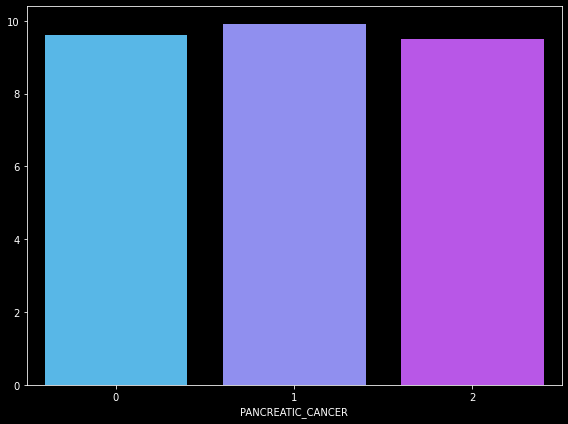

GI_CANCER_OTHER


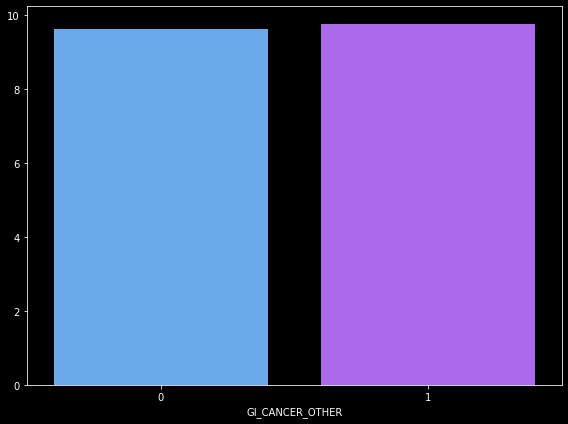

UPPPER_RESPIRATORY_CANCER


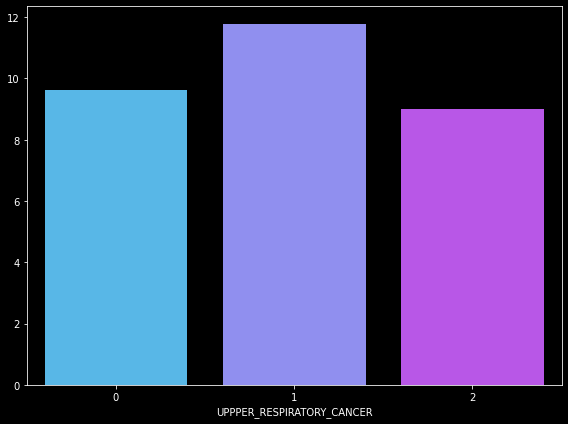

LUNG_CANCER


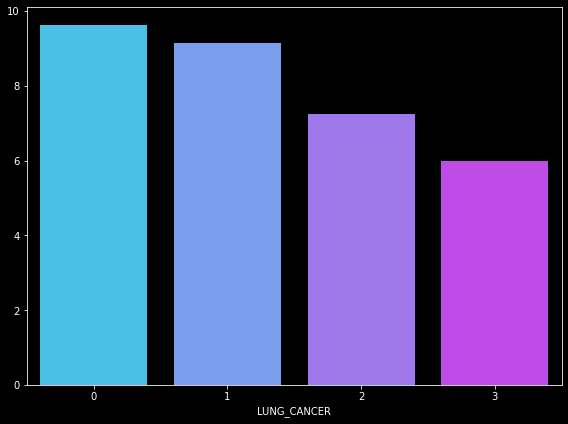

RESPIRATORY_CANCER_OTHER


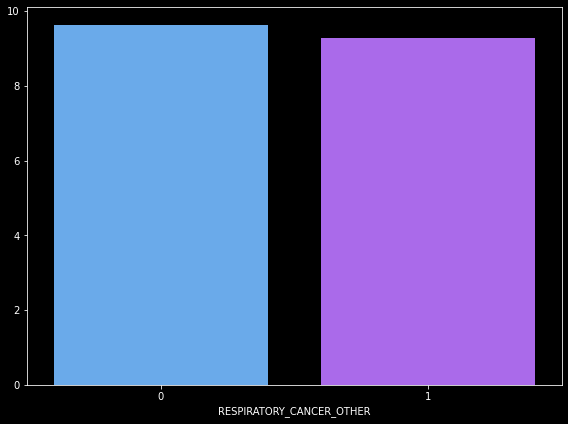

BONE_CONNECTIVE_TISSUE_CANCER


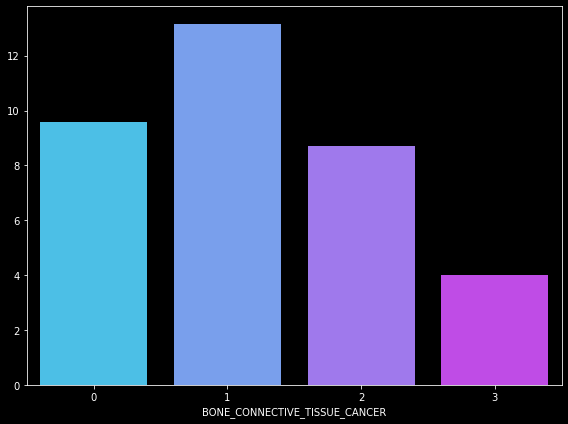

SKIN_CANCER


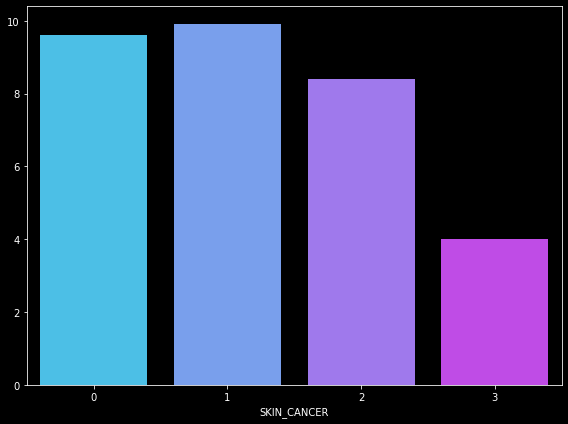

BREAST_CANCER


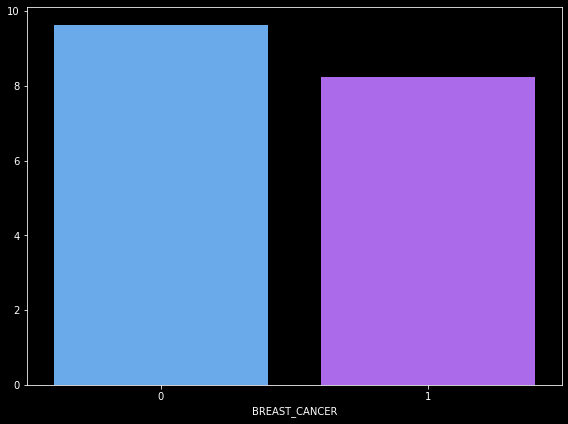

KAPOSIS_SARCOMA


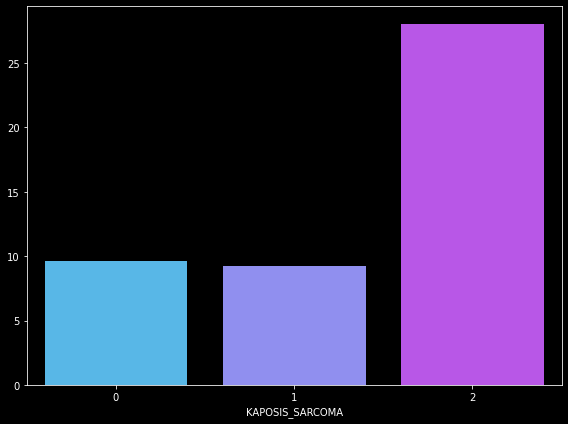

UTERINE_CANCER


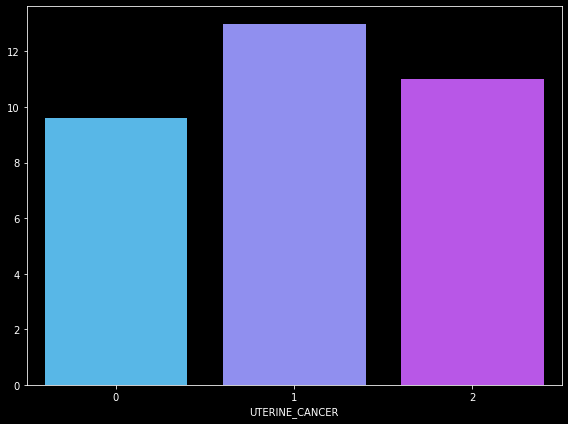

OVARIAN_CANCER


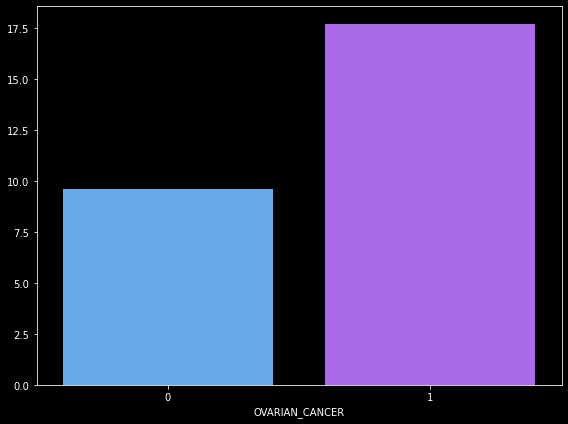

PROSTATE_CANCER


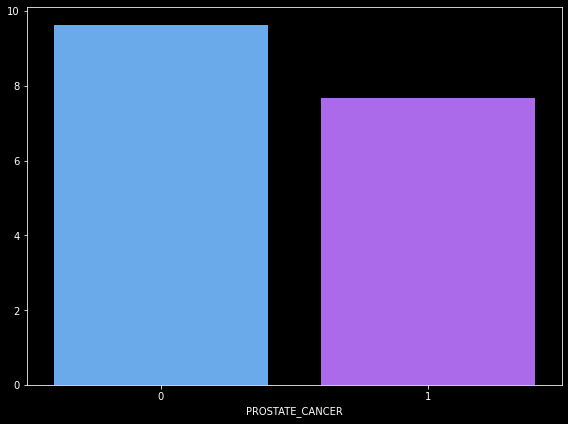

MALE_REPRO_CANCER_OTHER


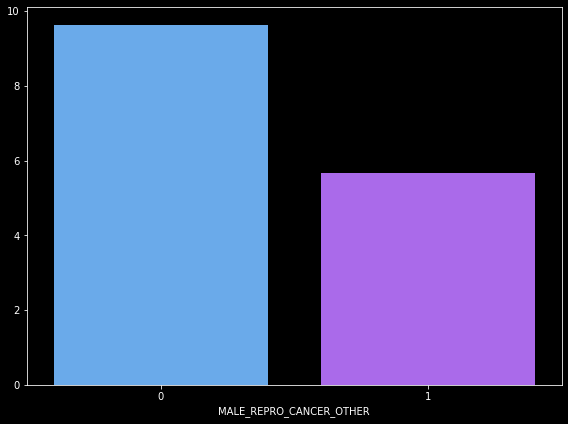

BLADDER_CANCER


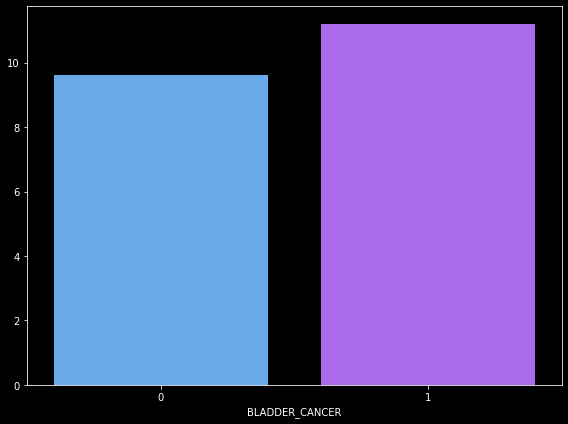

KIDNEY_CANCER


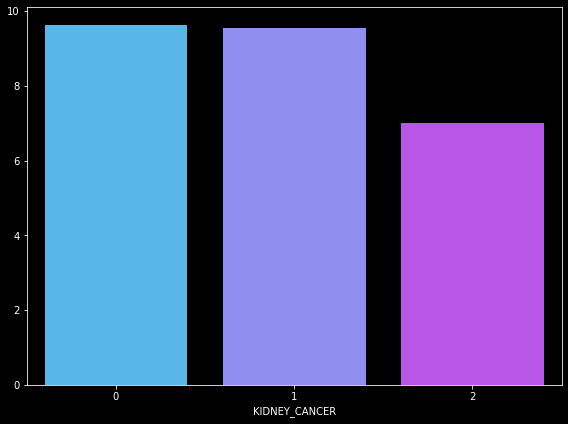

NEURO_CANCER_OTHER


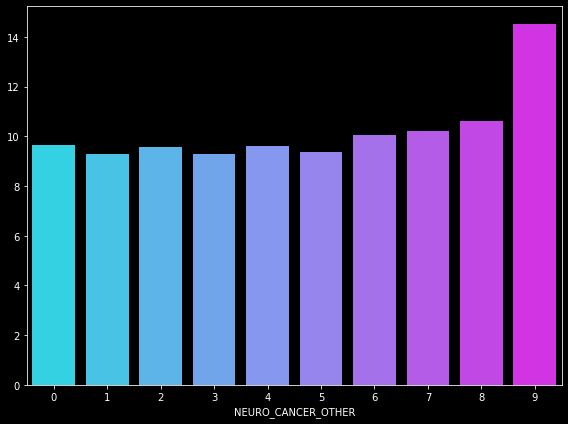

BRAIN_CANCER


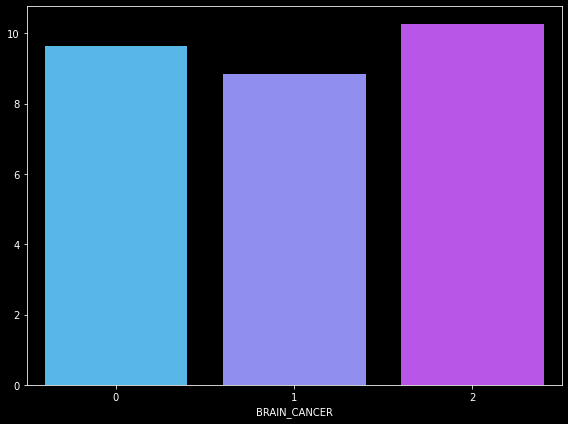

THYROID_CANCER


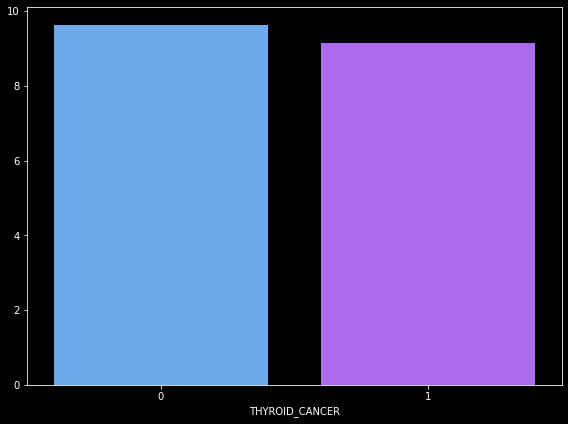

ENDOCRINE_CANCER_OTHER


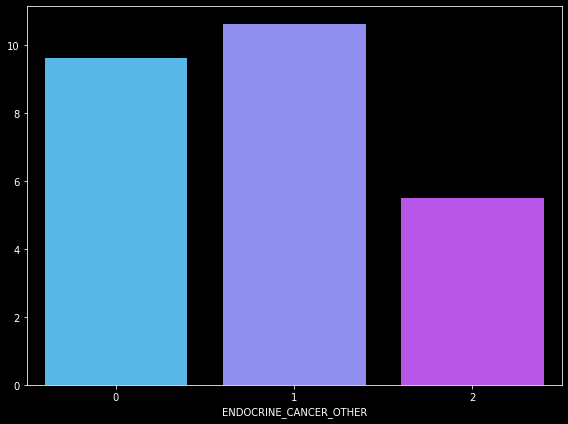

CONNECTIVE_TISSUE_CANCER


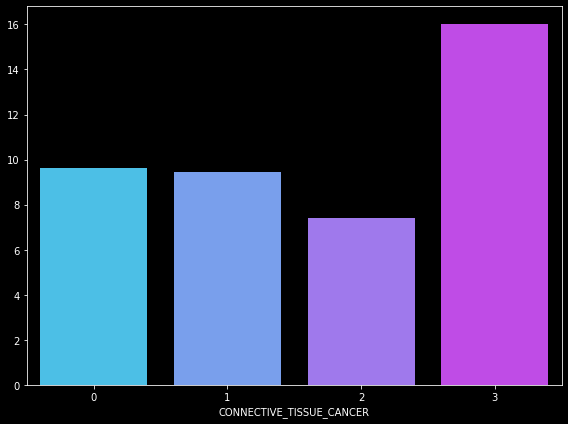

CANCER_OTHER


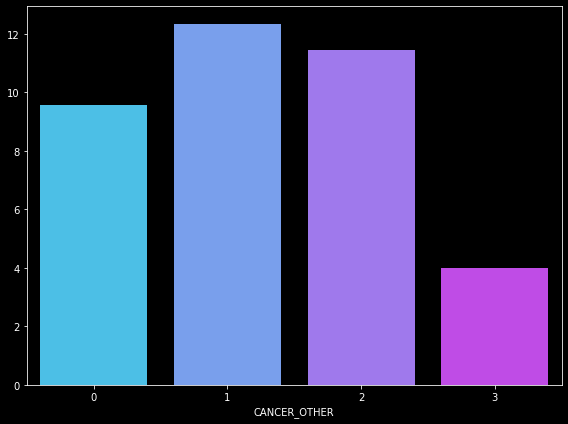

METS_TO_LYMPH_NODES


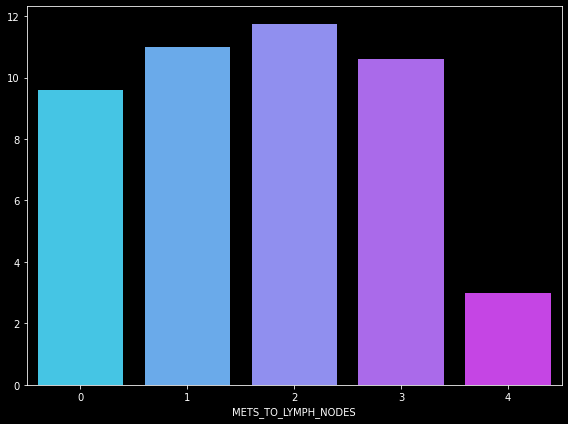

METS_TO_RESP_GI


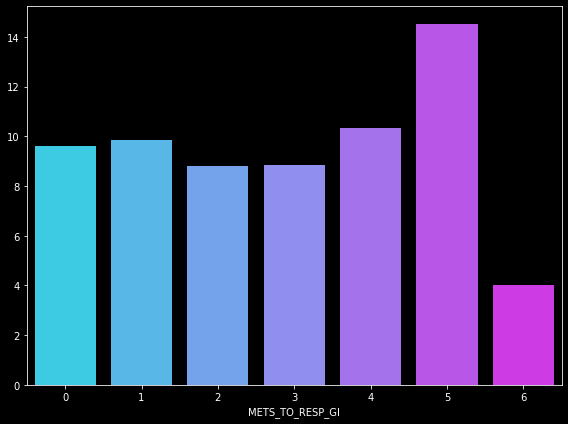

METS_TO_OTHER


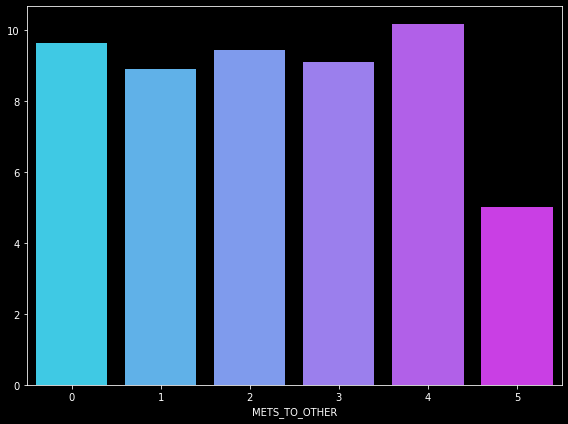

LYMPHATIC_CANCER


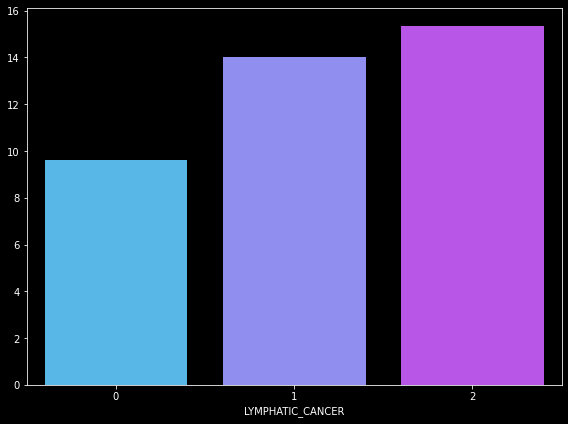

HOGKINS_LYMPHOMA


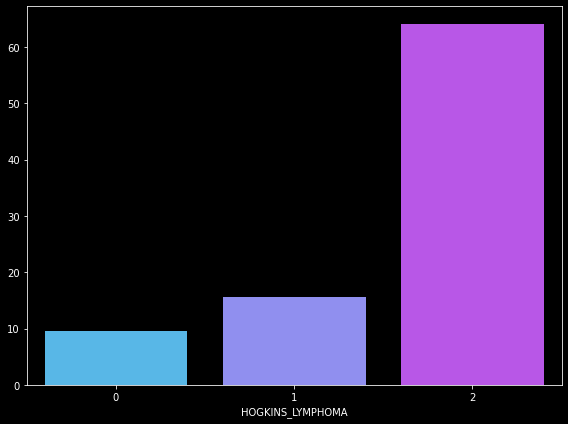

HEME_CANCER_OTHER


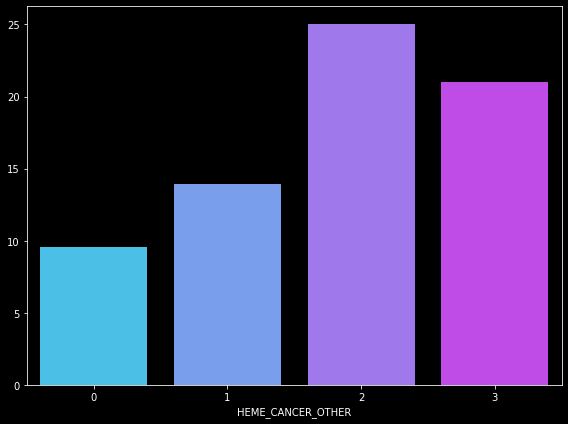

MULTIPLE_MYELOMA


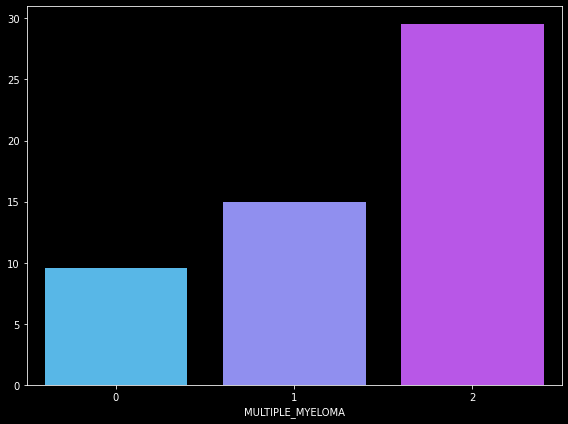

NEUROENDOCRINE_TUMORS


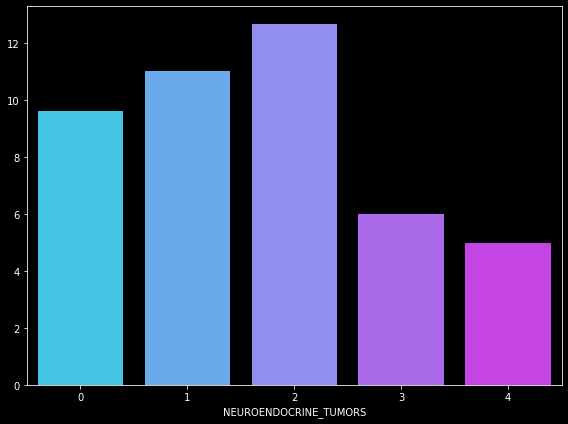

BENIGN_RESPIRATORY


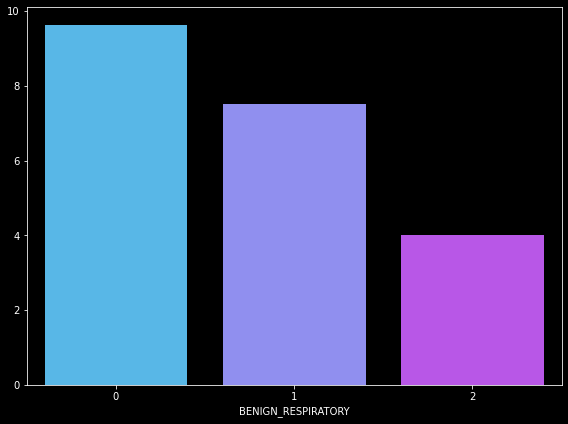

BENIGN_OTHER


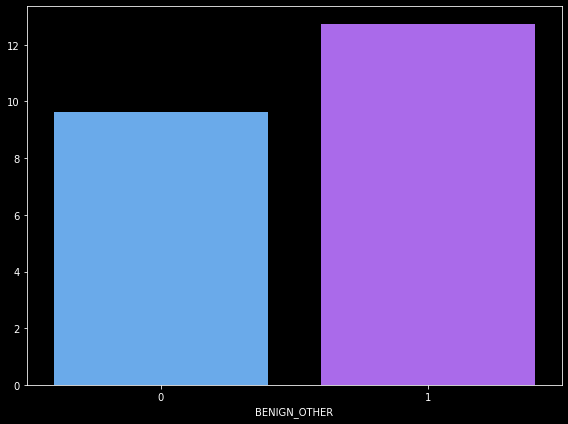

BENIGN_BRAIN


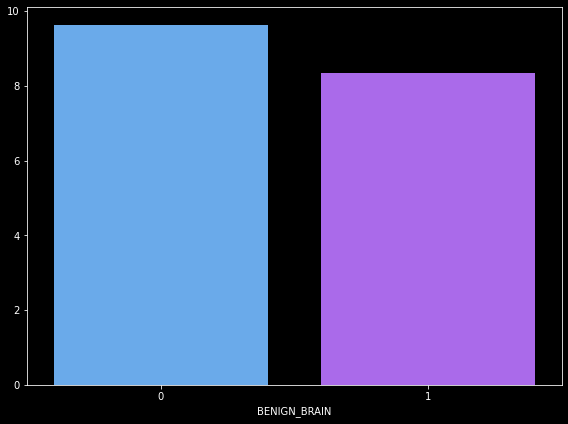

BENIGN_ENDOCRINE


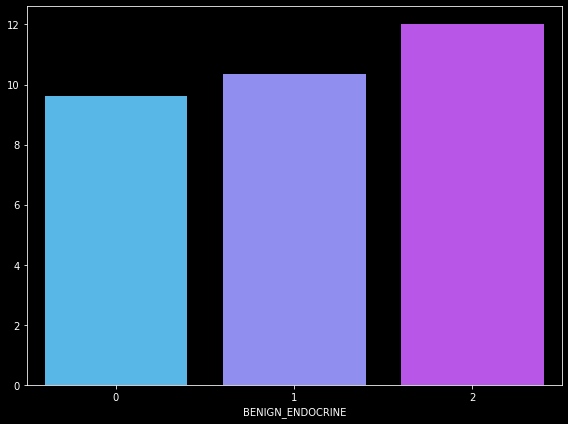

UTERINE_LEIOMYOMA


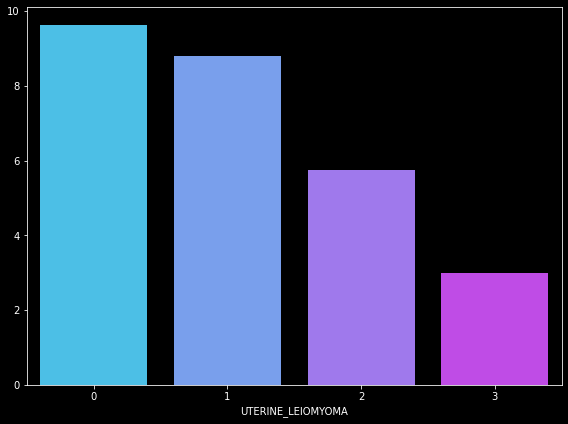

HEMANGIOMA_LYMPHANGIOMA


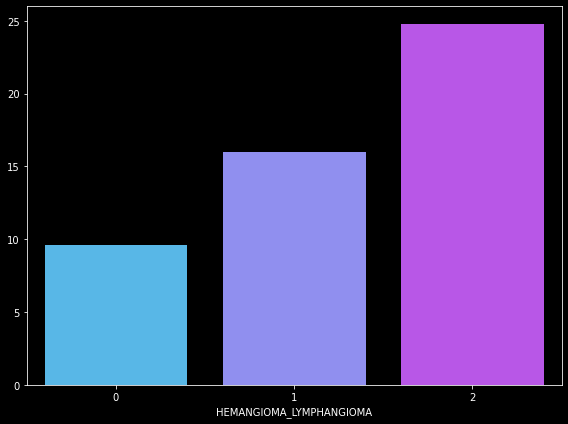

CARCINOMA_IN_SITU


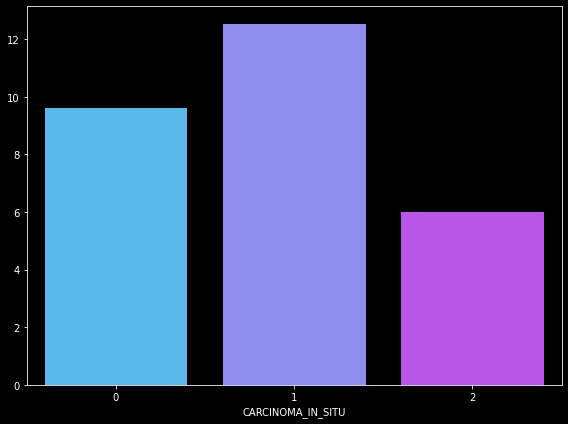

GOITER


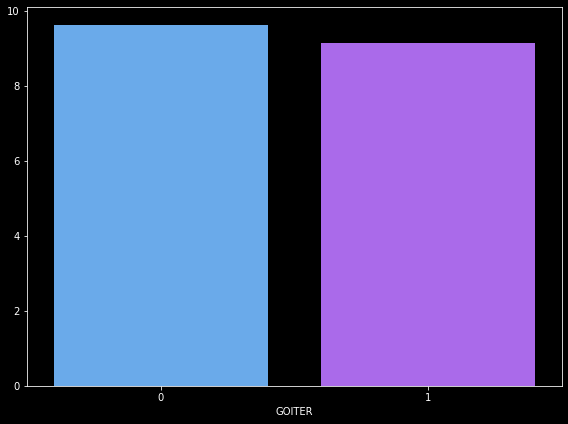

THYROTOXICOSIS


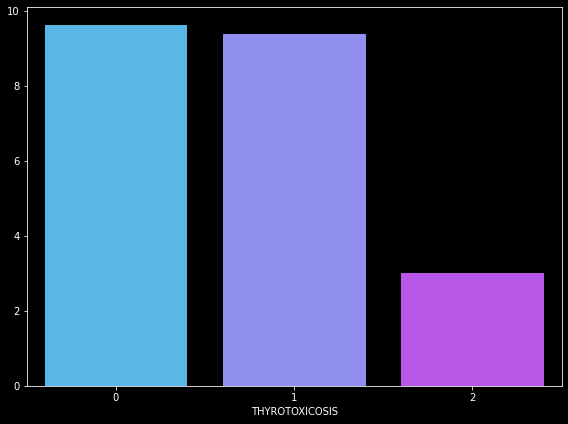

HYPOTHYROIDISM


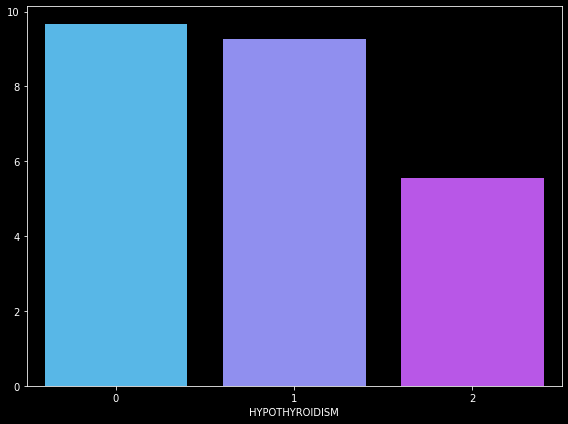

THYROID_DX_OTHER


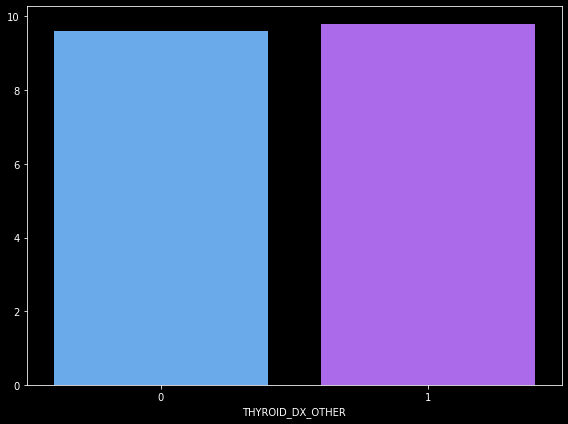

PANCREATIC_DX_OTHER


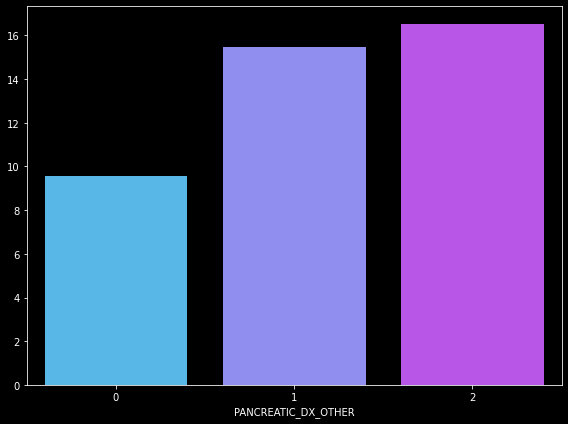

PITUITARY_DX


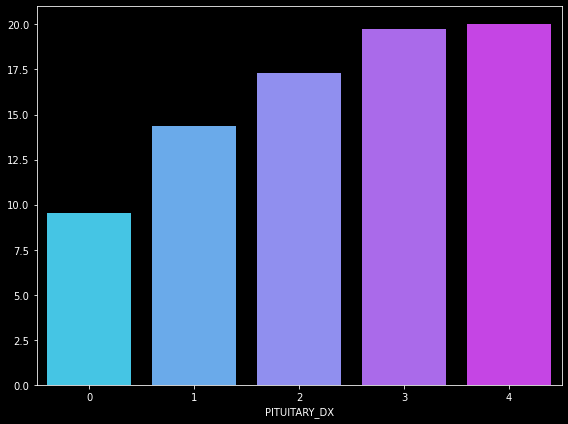

ENDOCRINE_DX_OTHER


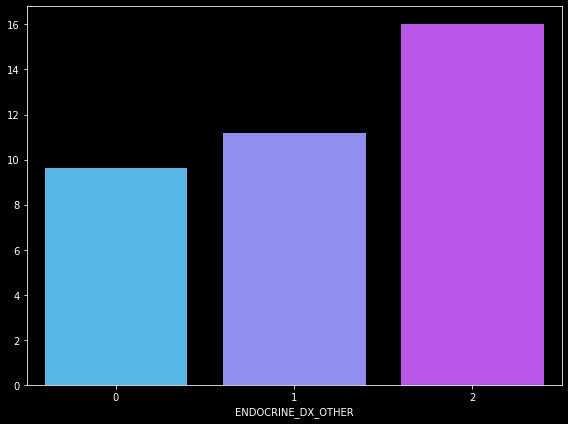

ADRENAL_DX


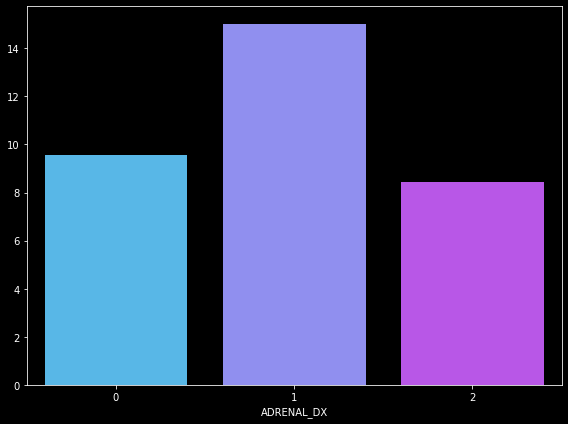

VITAMIN_DEFICIENCY


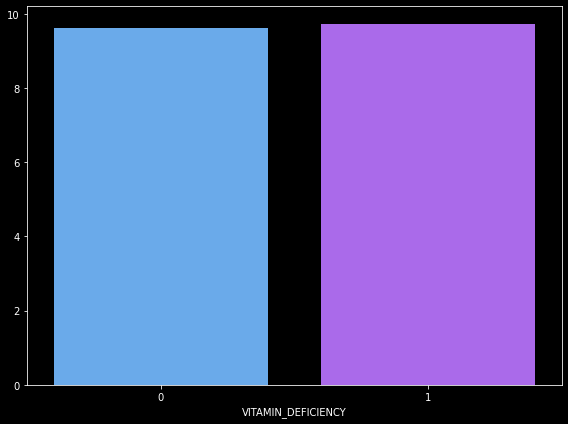

MALNUTRITION


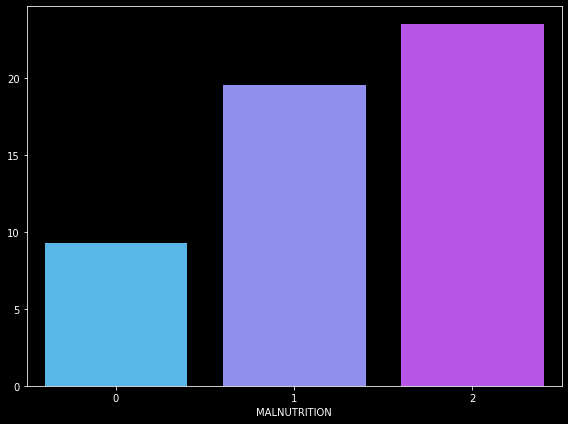

METABOLIC_DX_OTHER


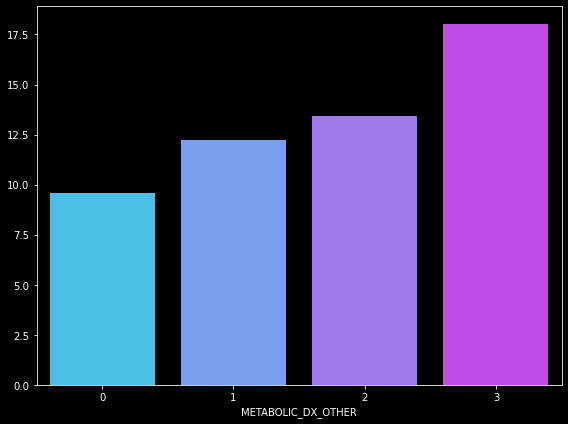

LIPOID_METABOLISM_DX


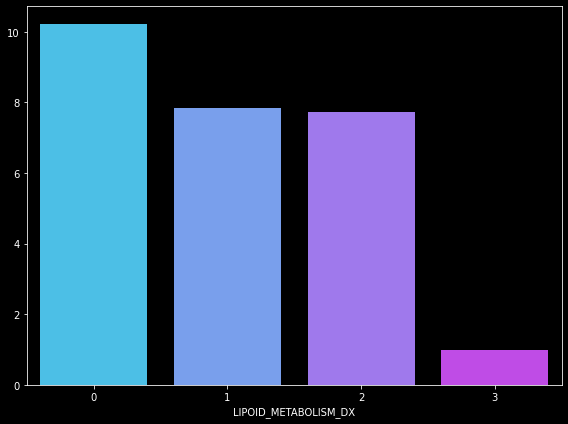

PLAMA_PROTEIN_DX


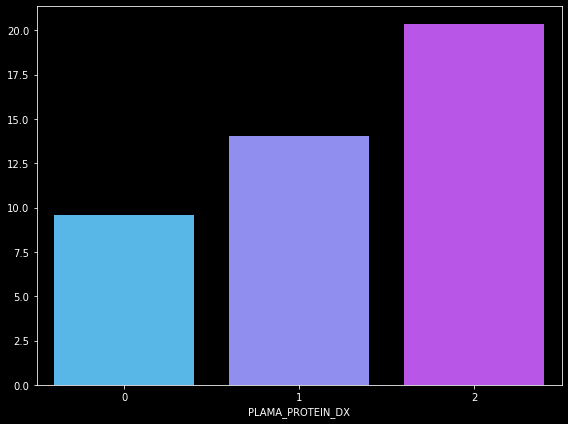

GOUT


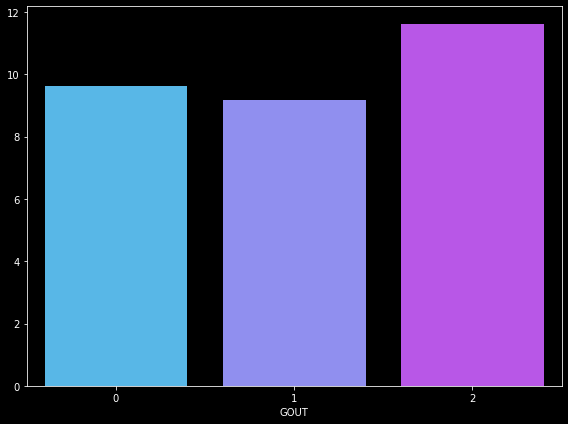

MINERAL_METABOLISM_DX


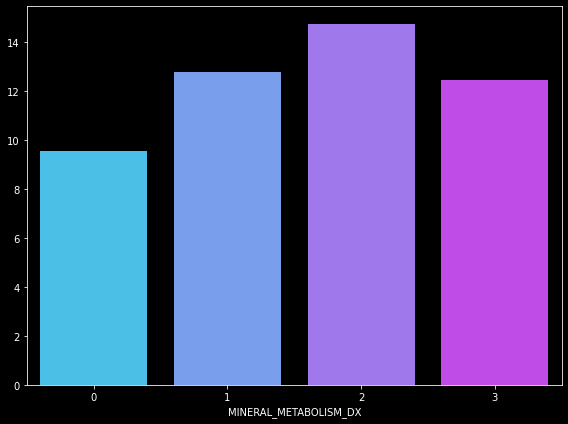

FLUID_ELECTROLYTE_DX


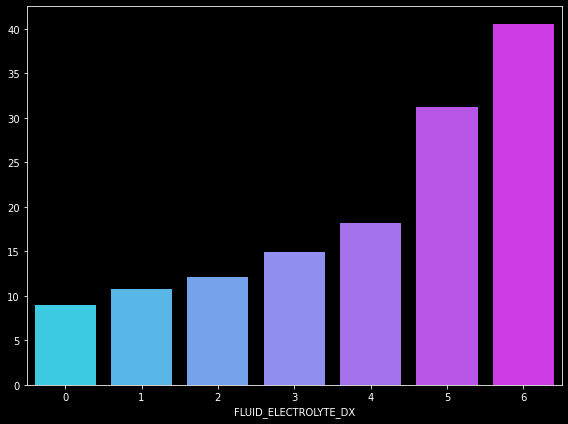

OBESITY


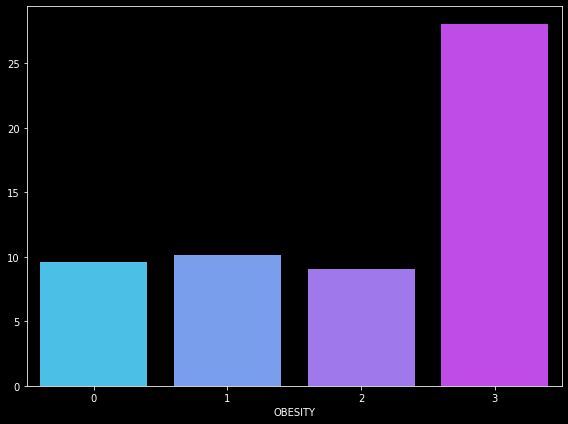

AUTOIMMUNE_DX


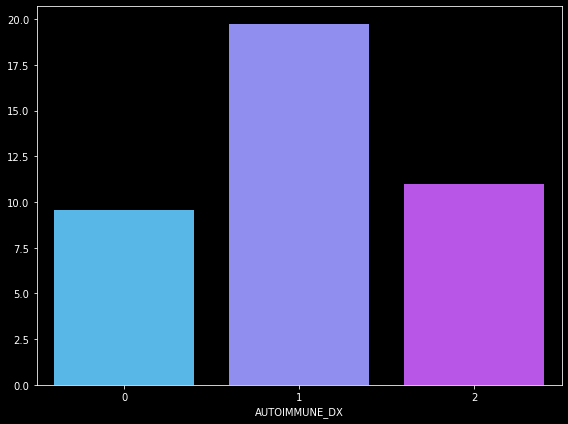

DEFICIENCY_ANEMIA


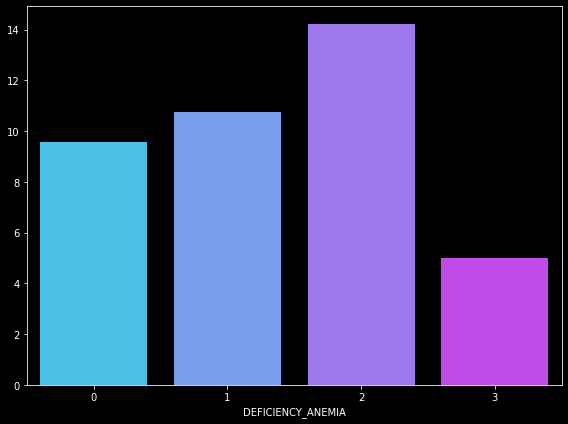

HEMOLYTIC_ANEMIA


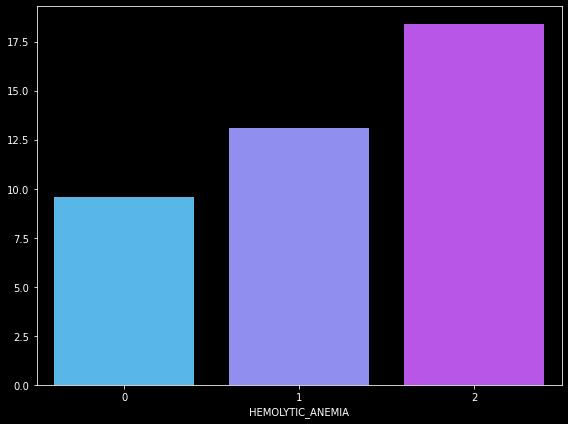

APLASTIC_ANEMIA


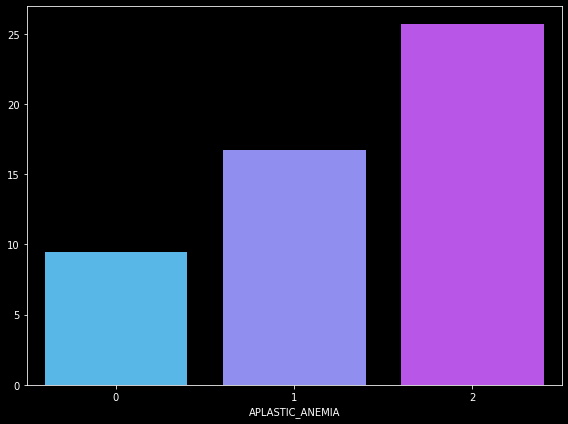

ANEMIA_OTHER


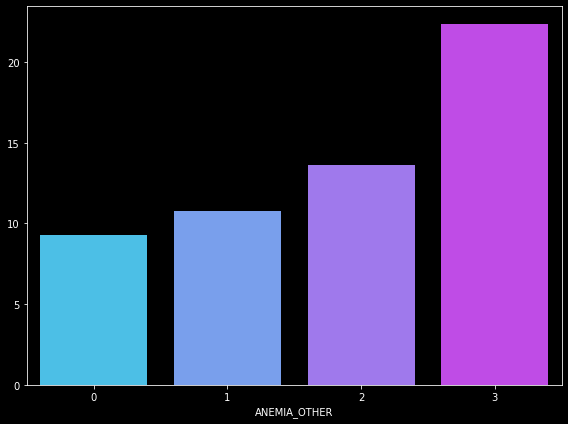

COAGULATION_DX


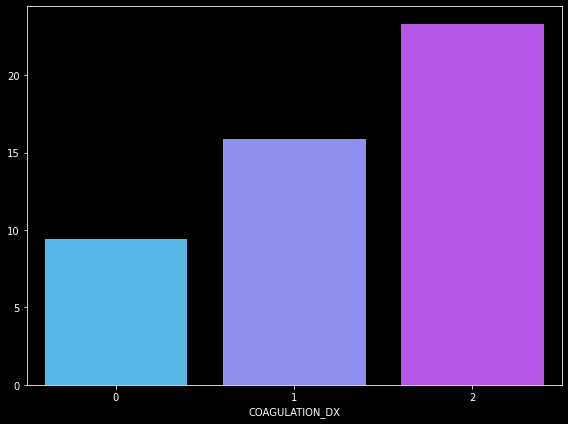

PURPURA_THROMBOCYTOPENIA


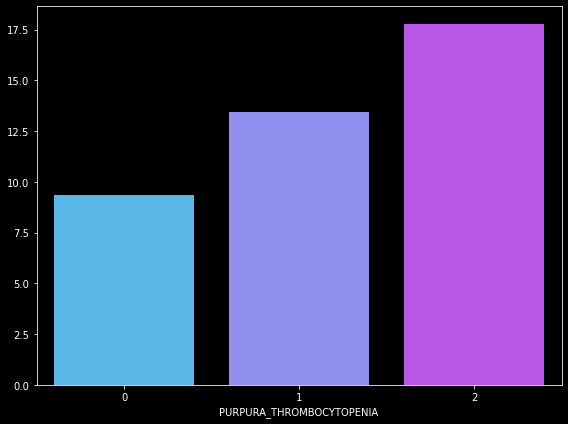

WBC_DX


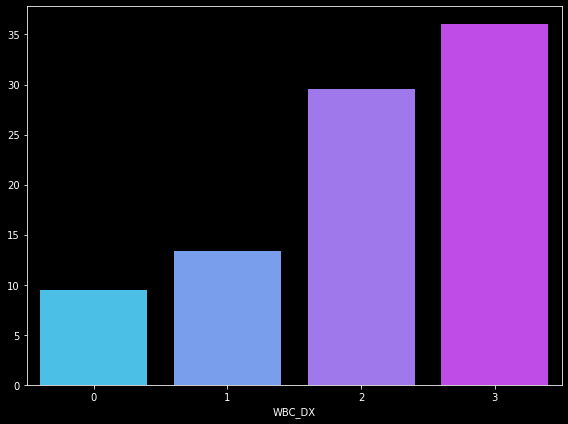

HEME_DX_OTHER


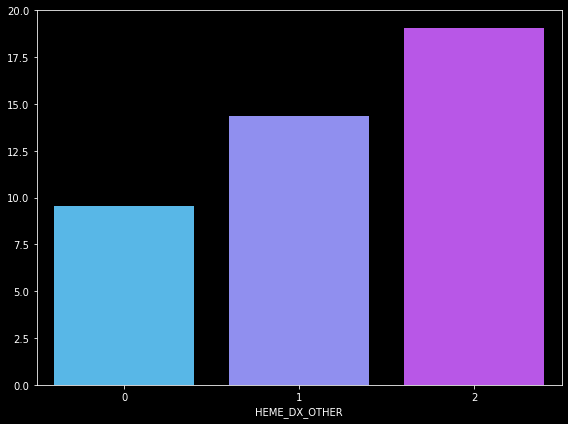

DEMENTIA


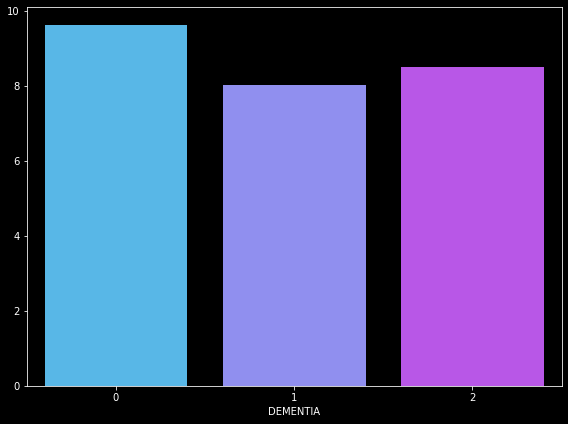

DRUG_INDUCED_PSYCHOSIS


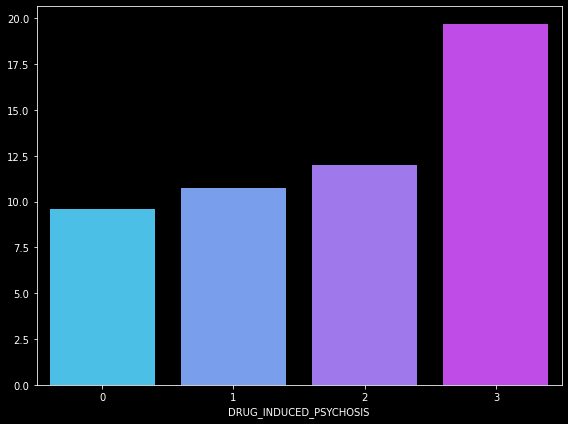

TRANSIENT_PSYCHOSIS_OTHER


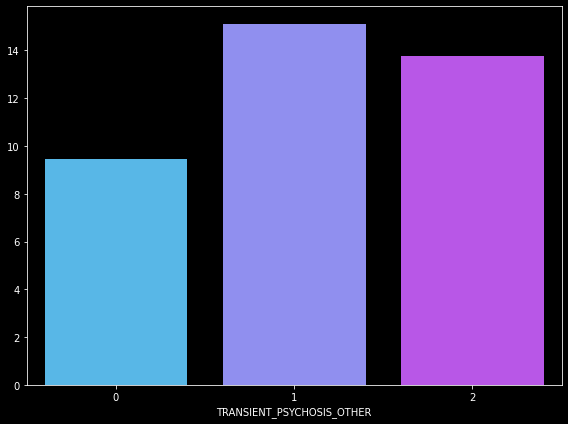

PERSISTENT_PSYCHOSIS_OTHER


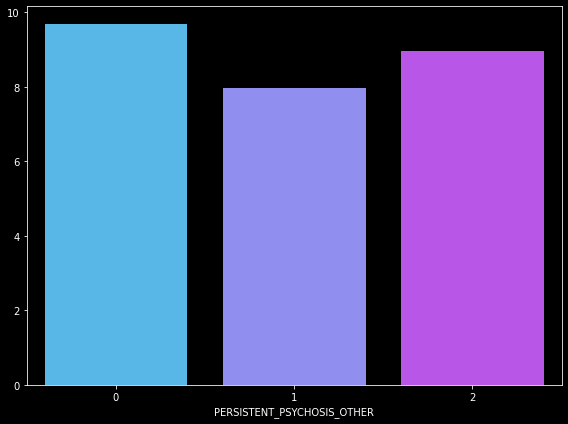

SCHIZOPHRENIA


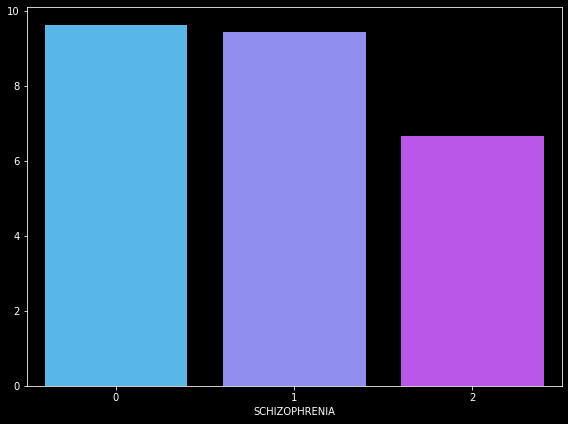

MOOD_DX


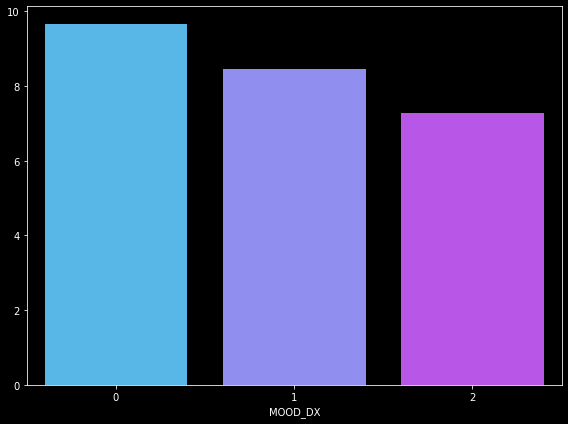

PSYCHOSES_OTHER


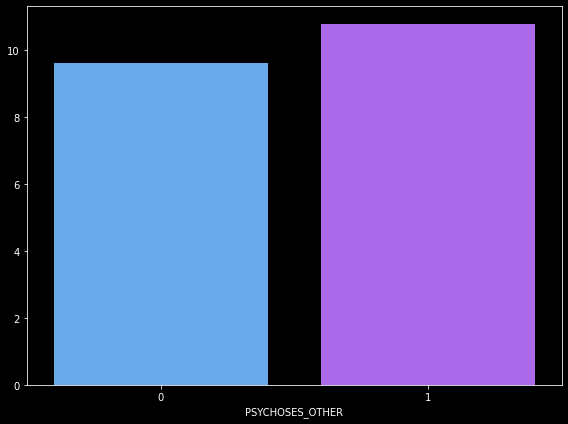

ANXIETY


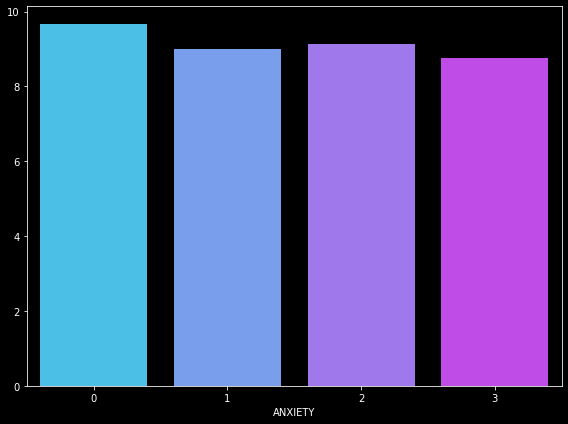

PERSONALITY_DX


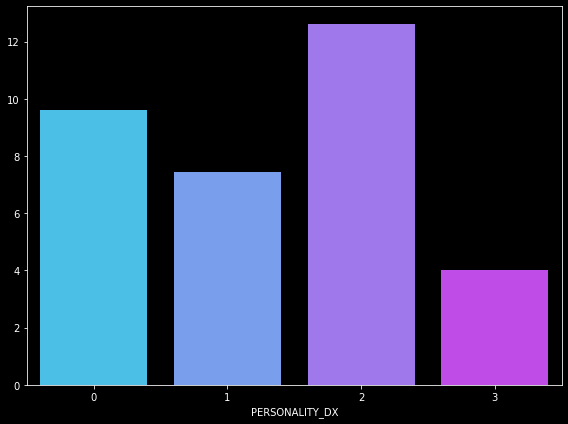

MENTAL_DX_OTHER


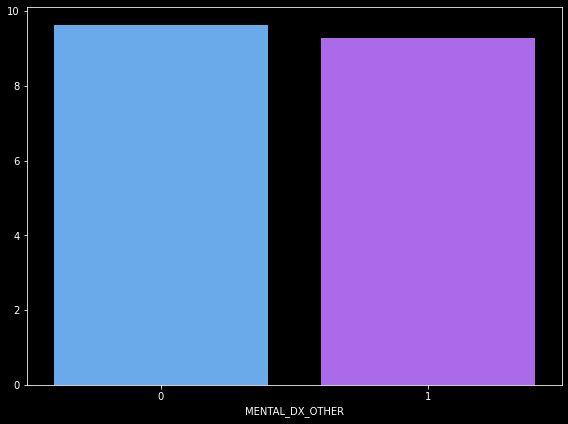

SUBSTANCE_DEPENDENCE


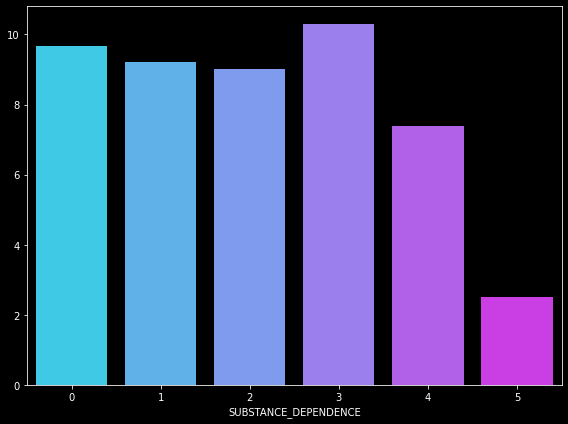

MENTAL_DX_DT_BRAIN_DMG


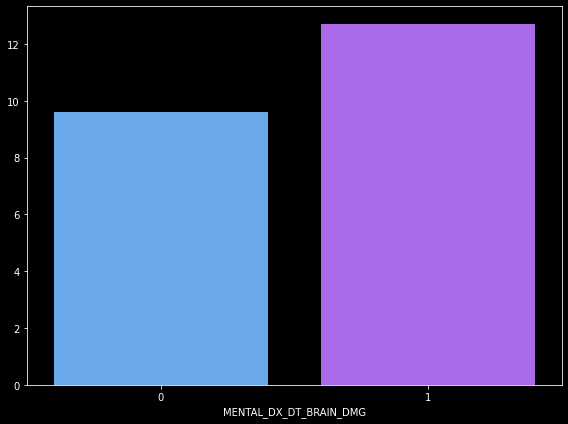

DEPRESSION


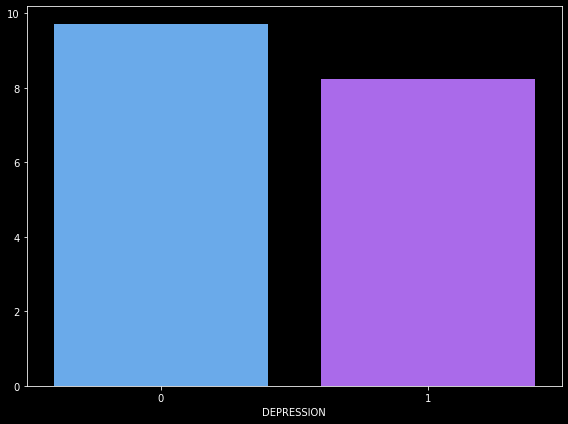

CHILDHOOD_PSYCH_DX


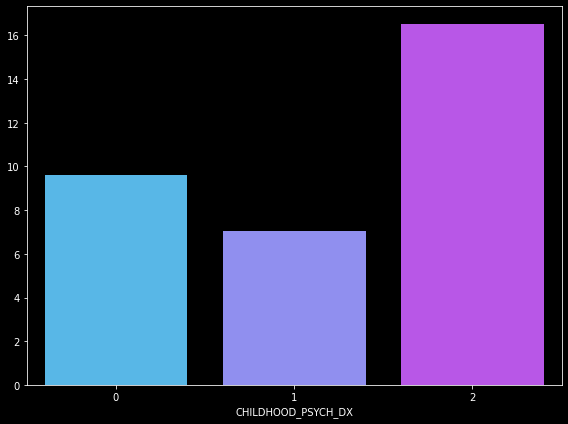

DEVELOPMENT_DX


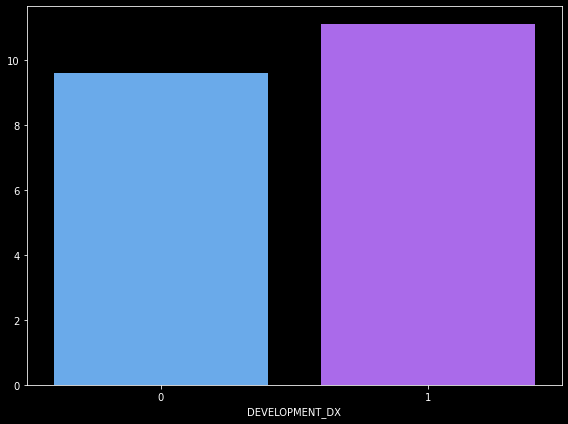

MENINGITIS


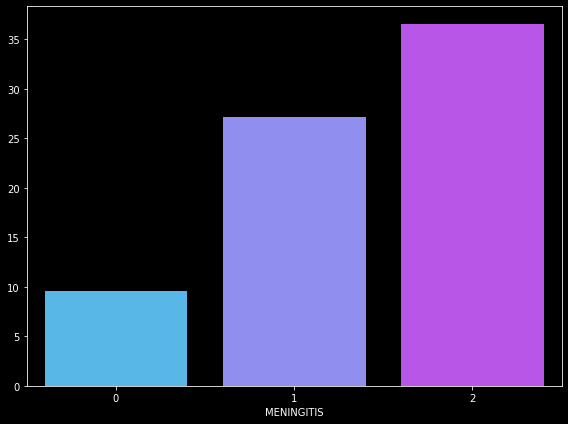

ENCEPHALITIS


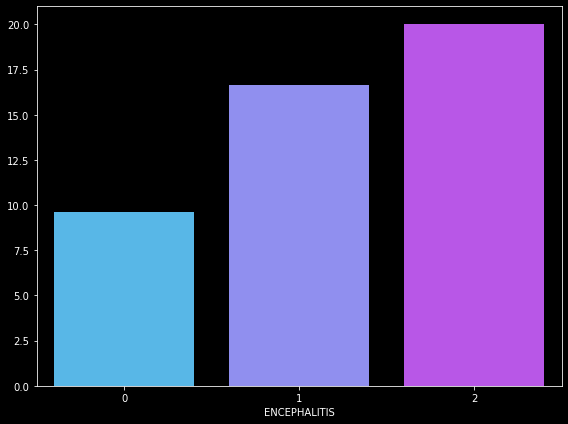

CNS_ABSCESS


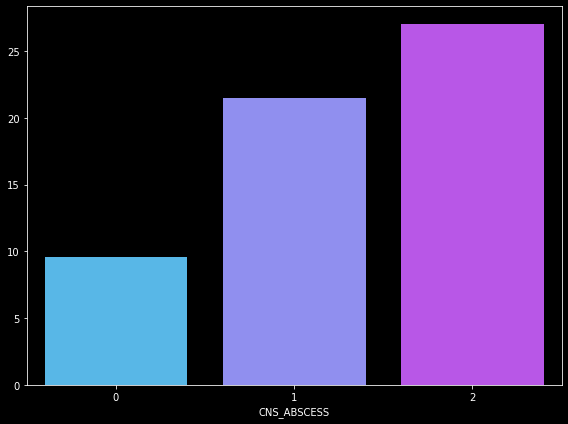

NEURO_INFLAMMATORY_DX_OTHER


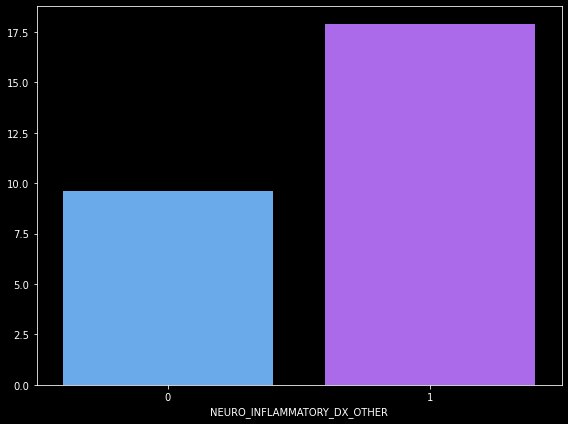

SLEEP_DX


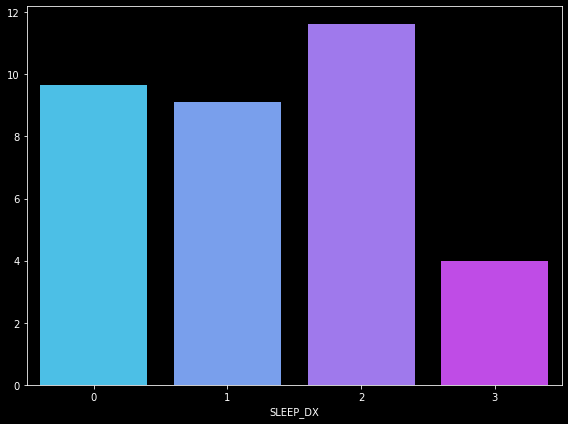

ALZHEIMERS


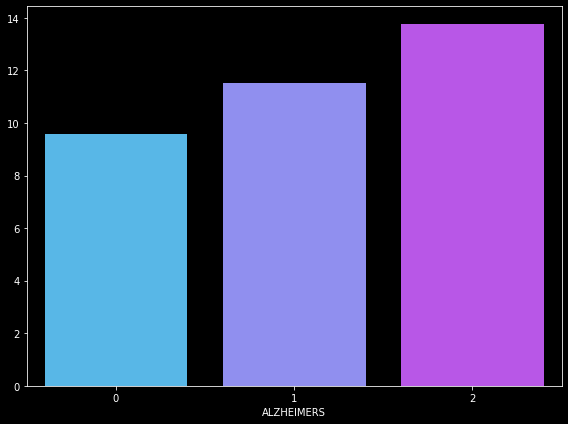

PARKINSONS


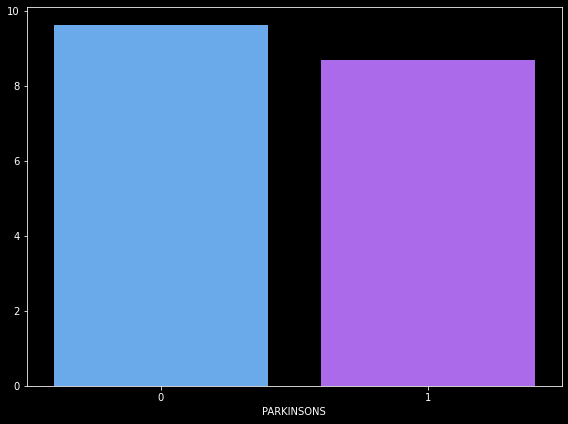

EXTRAPYRAMIDAL_DX


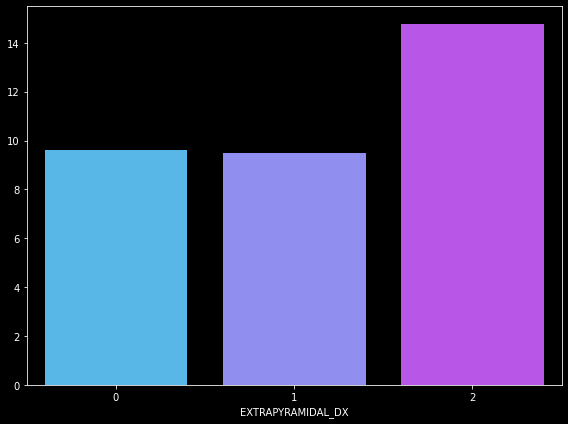

SPINAL_DX


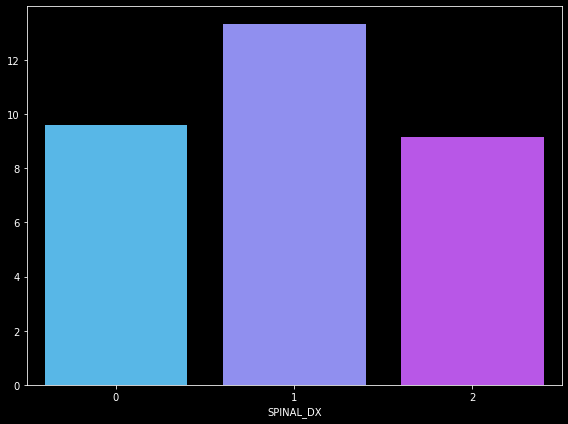

AUTONOMIC_NEURO_DX


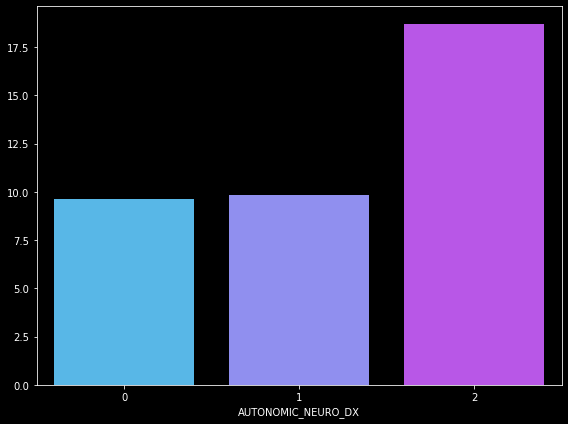

PAIN


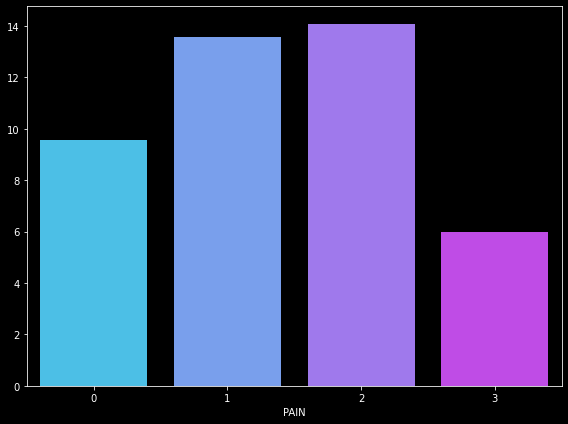

MS_DEMYELENATING


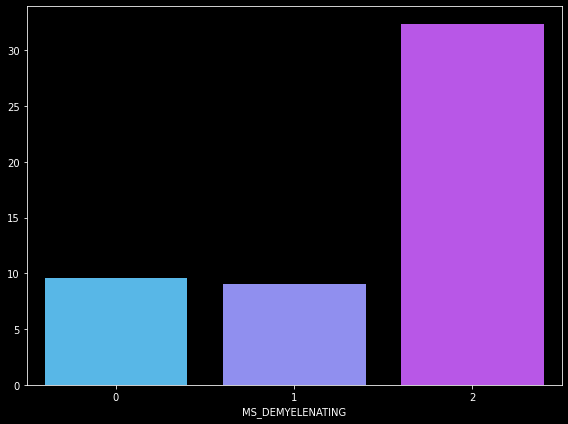

PARALYSIS


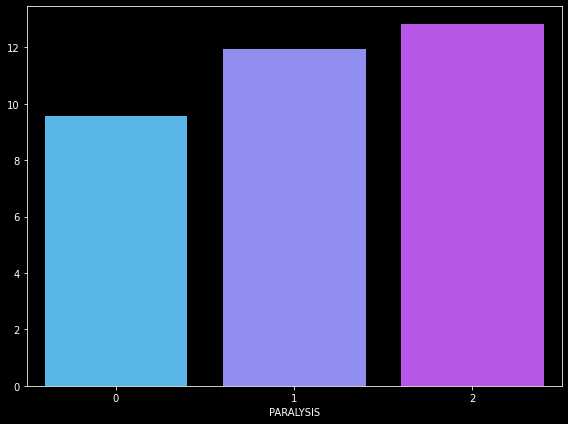

CEREBAL_PALSY


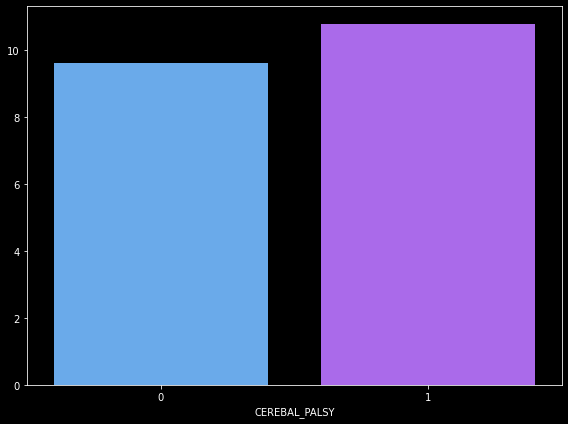

EPILEPSY


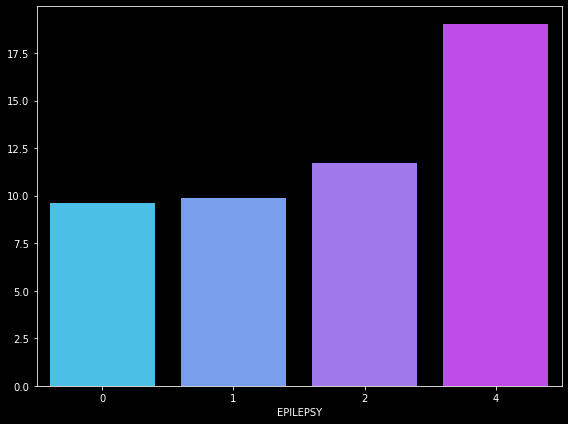

MIGRAINE


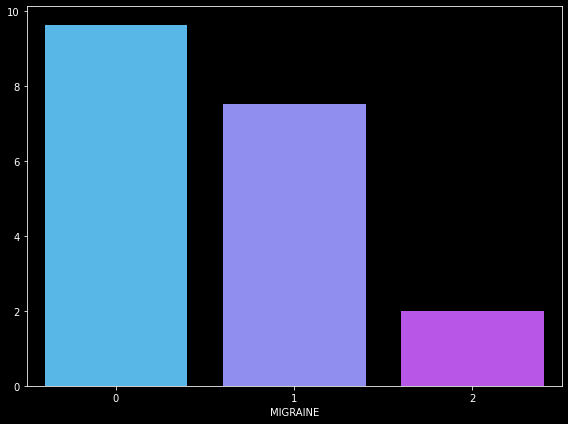

BRAIN_DX_OTHER


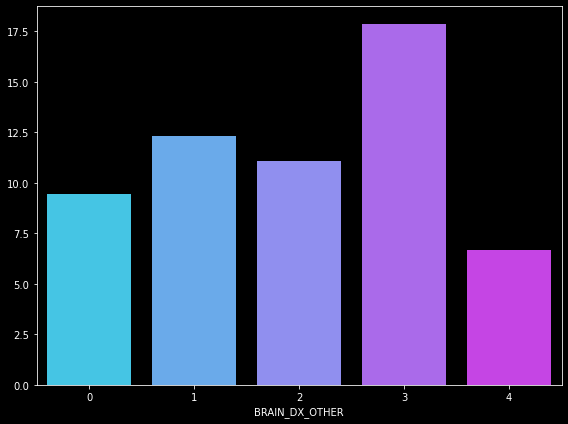

NEURO_DX_OTHER


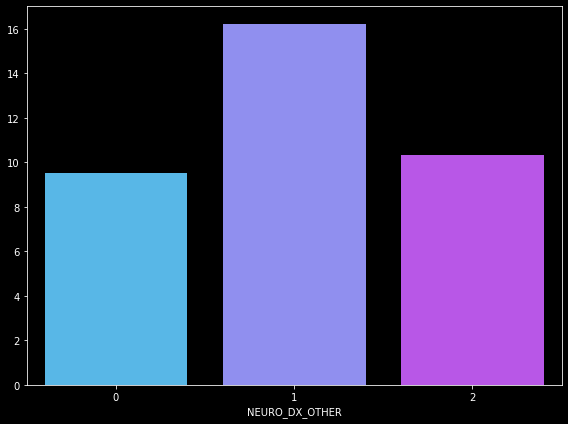

CRANIAL_NERVE_DX


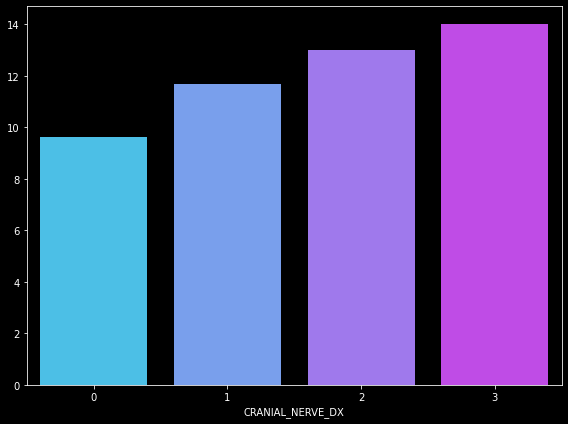

MONONEURITIS


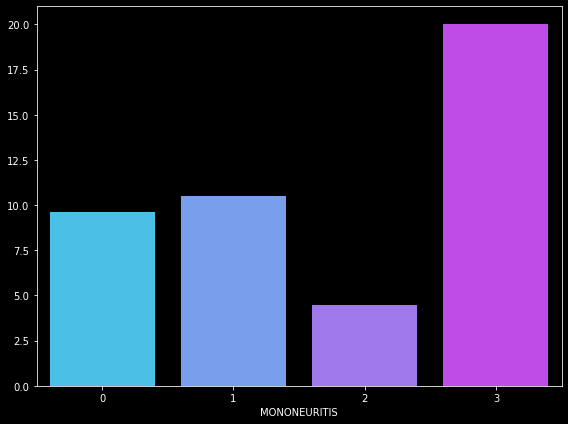

HEREDITARY_PERIPHERAL_NEUROPATHY


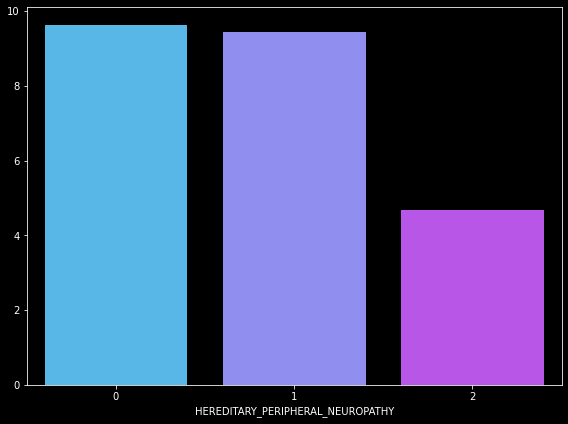

INFLAMMATORY_NEUROPATHY


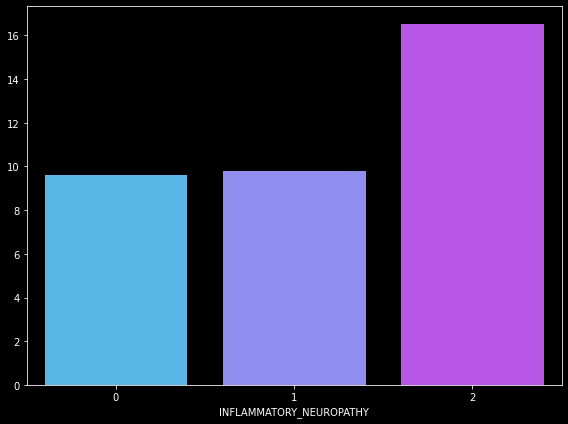

MYNEURAL_DX


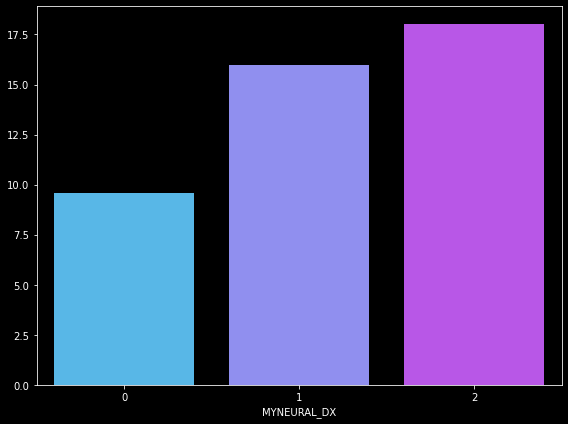

EYE_DX


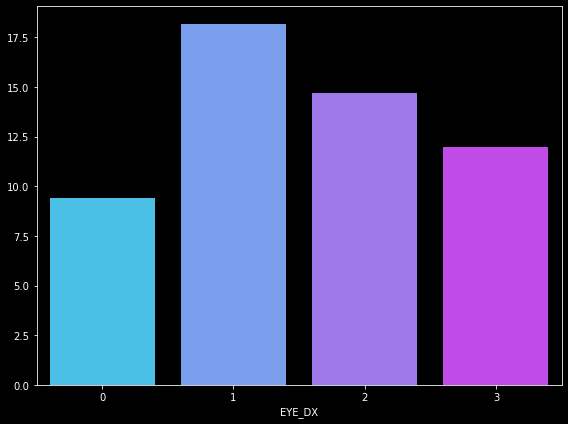

HEARING_LOSS


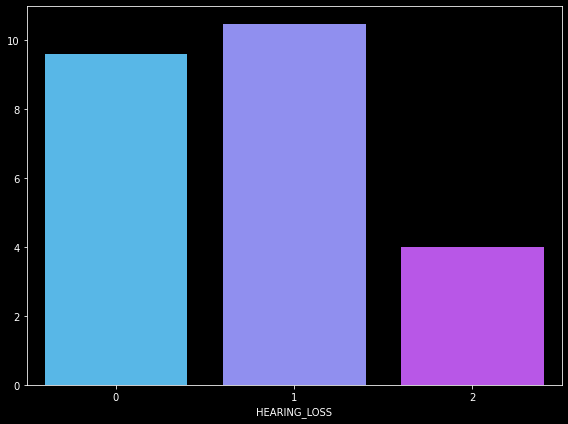

RHEUMATIC_HEART_DX


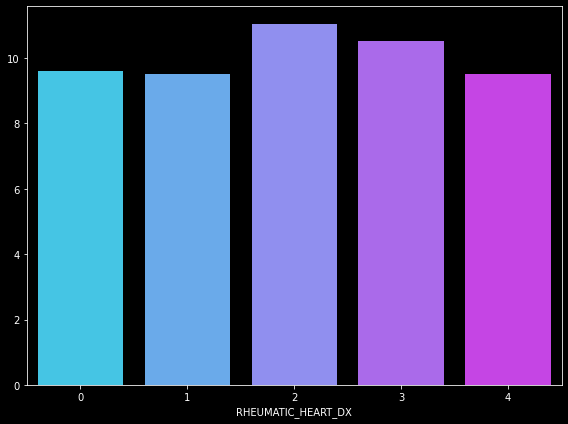

ACUTE_MI


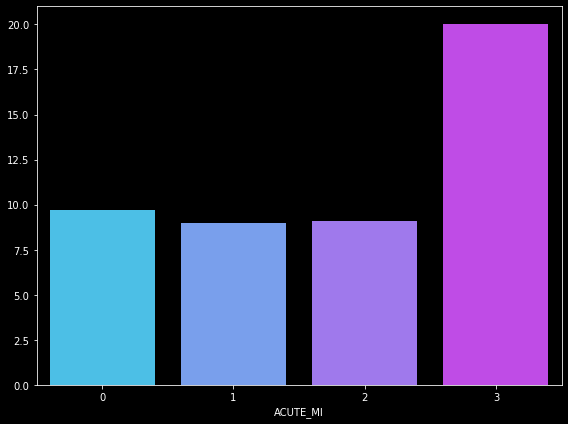

OLD_MI


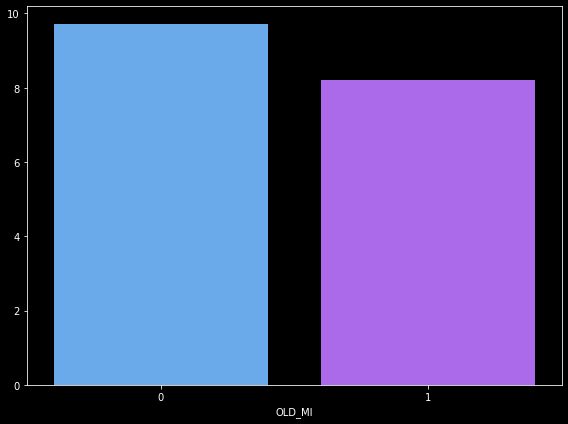

ANGINA_PECTORIS


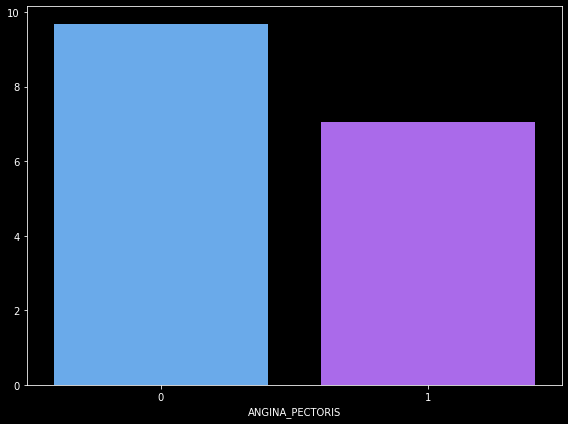

ISCHEMIC_HEART_DX_OTHER


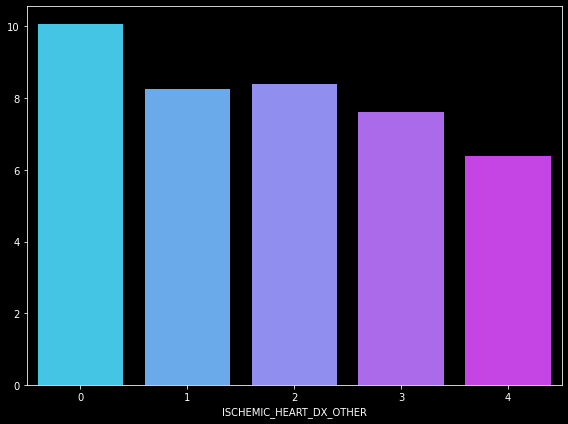

ACUTE_PULMONARY_HEART_DX


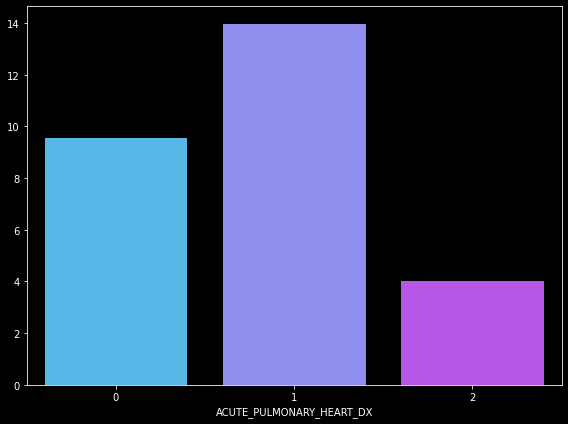

CHRONIC_PULMONARY_HEART_DX


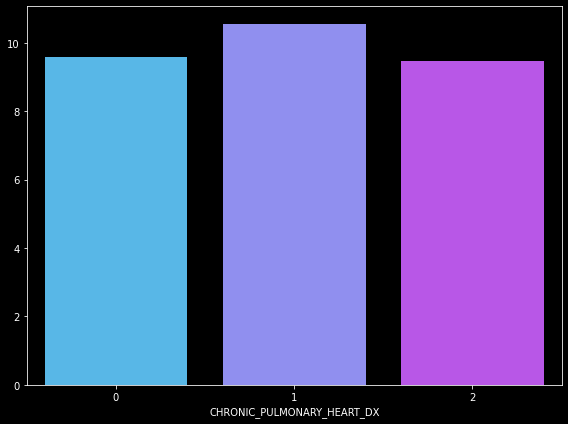

PERI_ENDO_MYO_CARDITIS


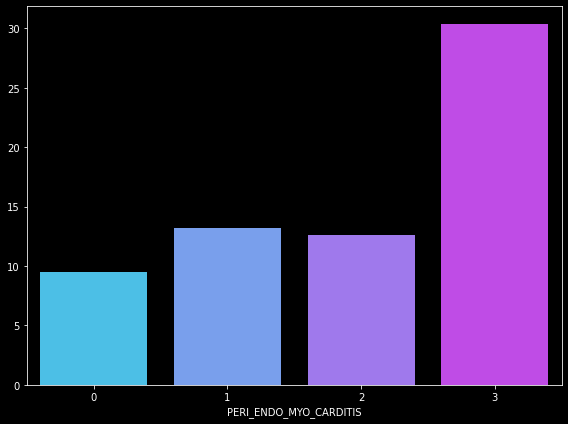

VALVE_DX


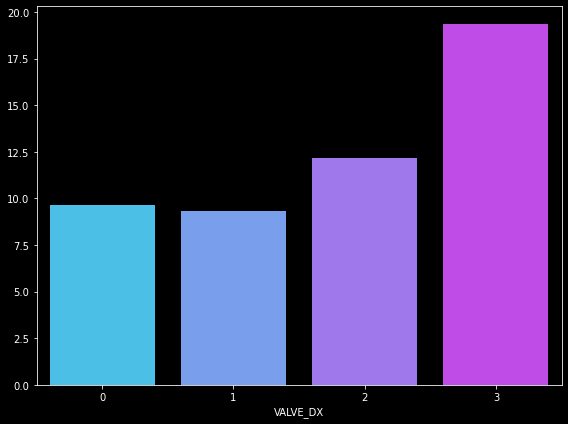

CARDIOMYOPATHY


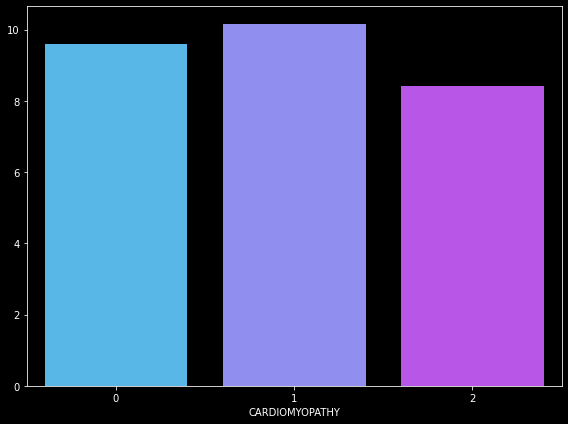

HEART_BLOCK


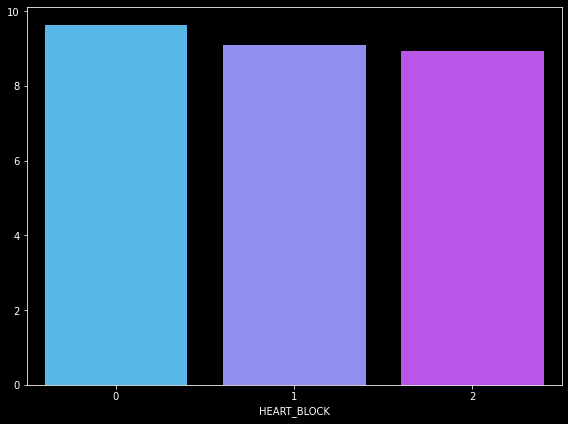

DYSRHYTHMIAS


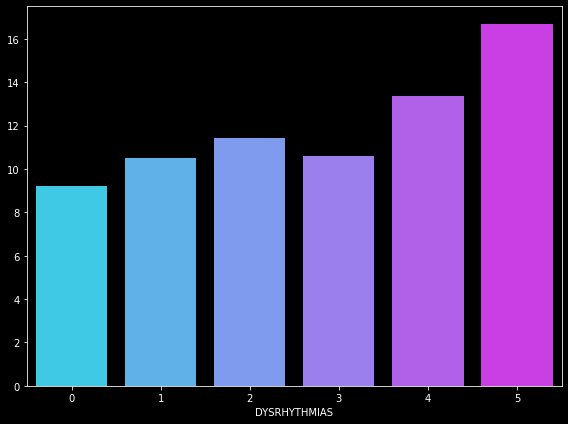

HEART_FAILURE


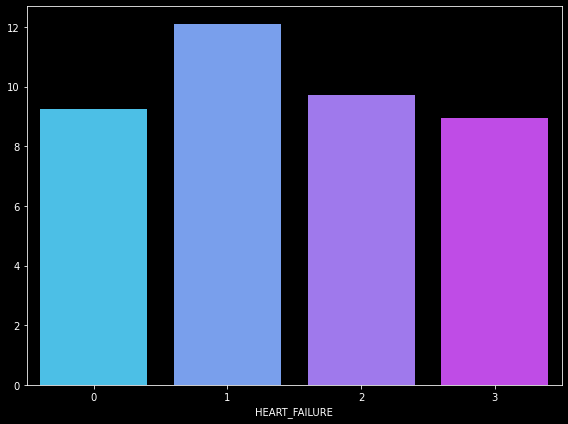

INTRACRANIAL_HEMORRHAGE


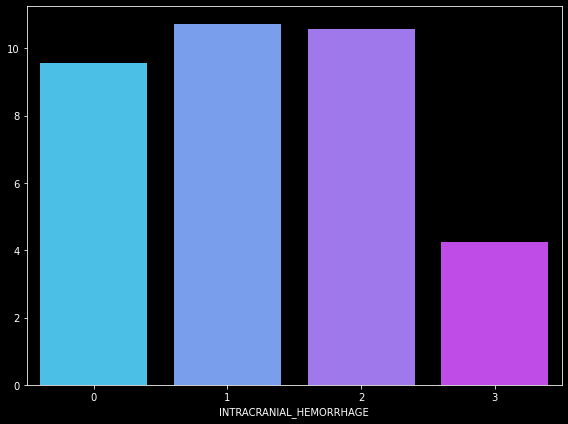

PRECEREBRAL_OCCLUSION


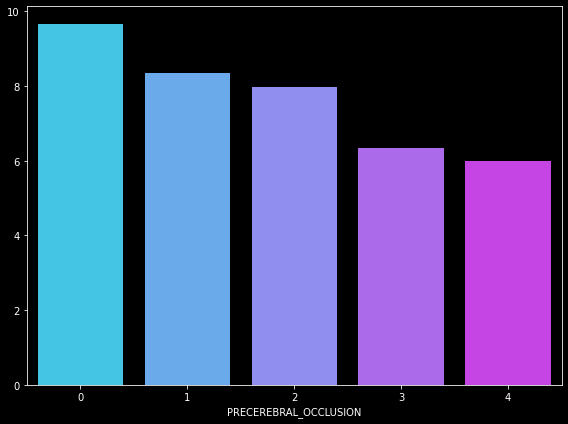

OCCLUSIVE_STROKE


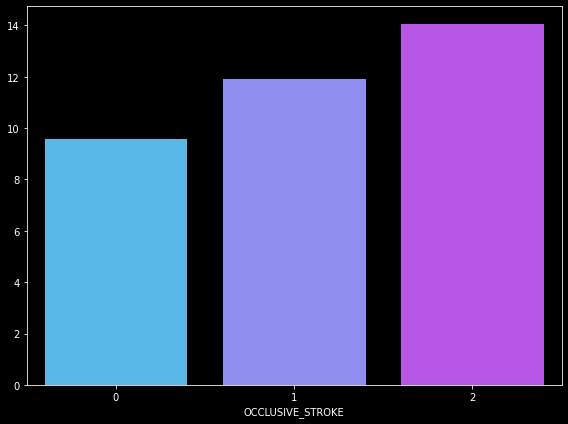

CEREBROVASCULAR_DX_OTHER


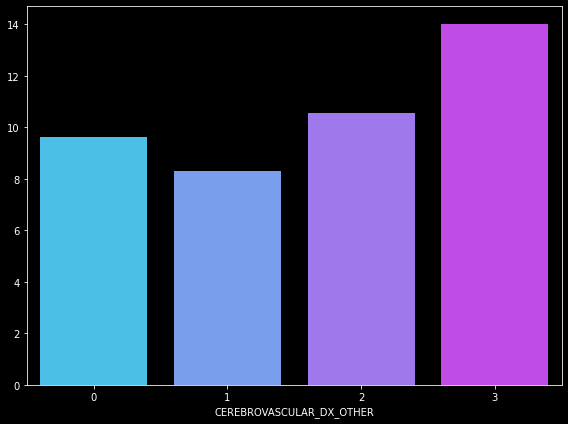

CEREBROVASCULAR_DX_LATE_EFFECTS


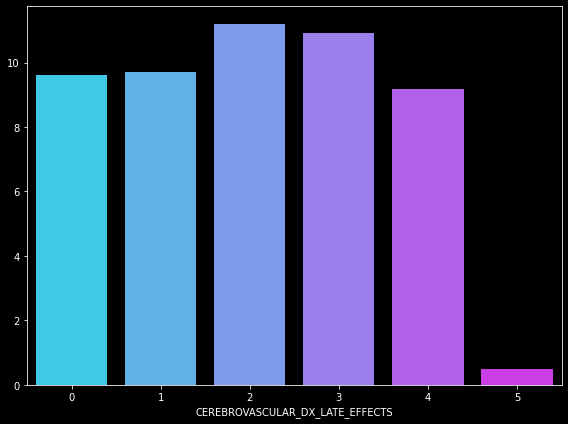

ATHEROSCLEROSIS


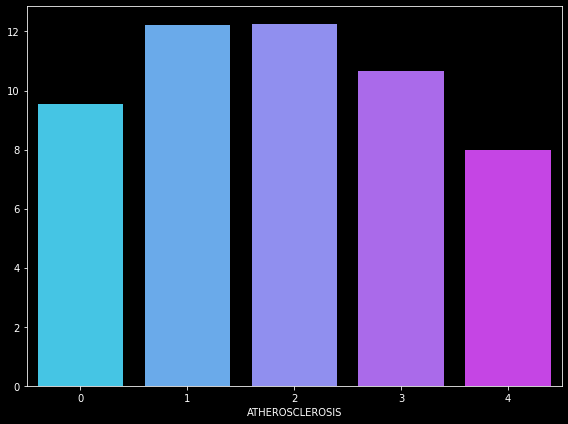

AAA


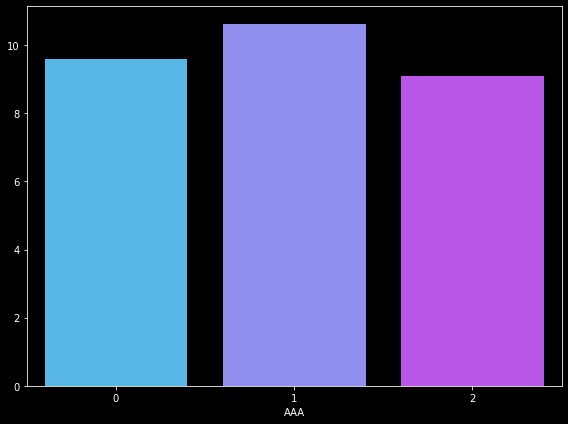

ANEURYSM_OTHER


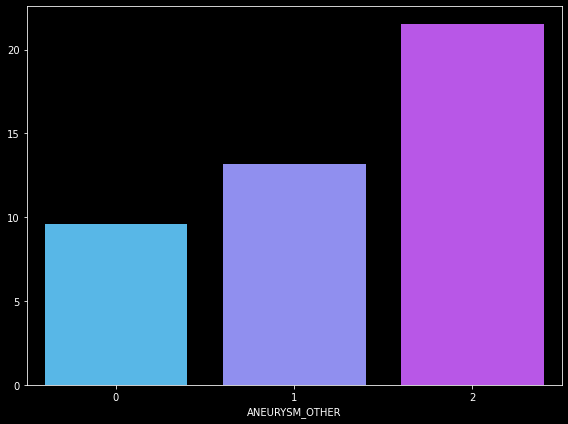

PVD_OTHER


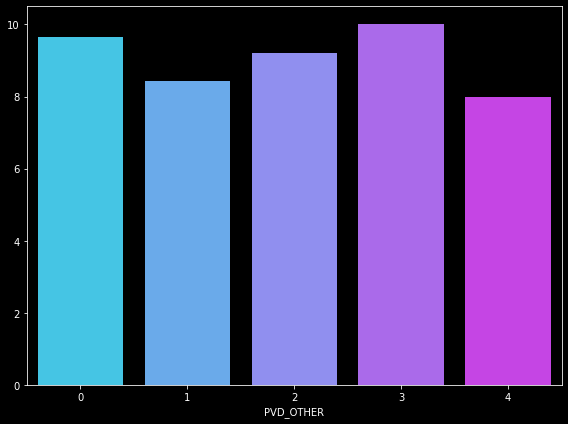

EMBOLISM_THROMBOSIS


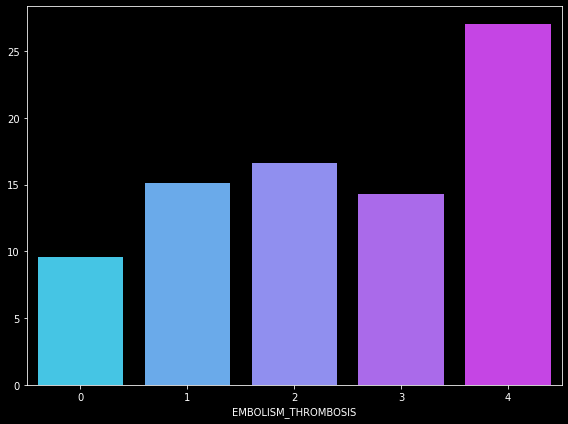

ARTERIAL_DX_OTHER


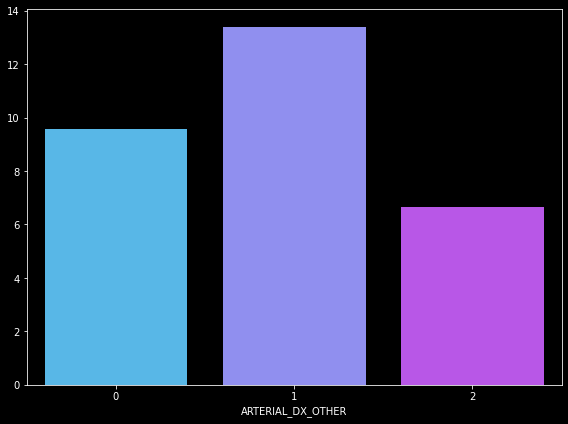

PHLEBITIS


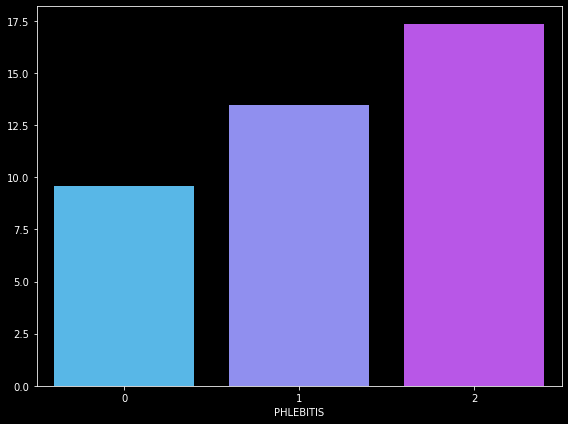

VENOUS_THROMBOSIS


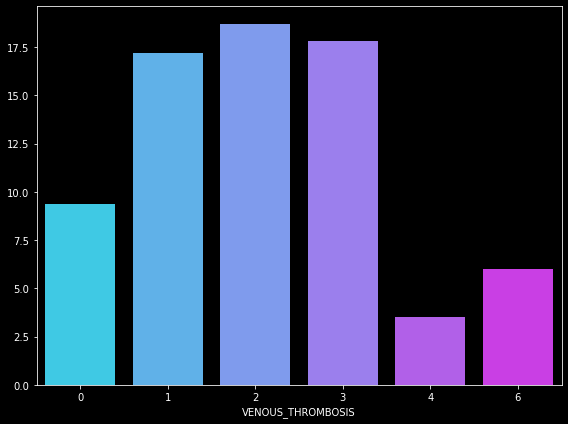

VERICOSE_VEINS


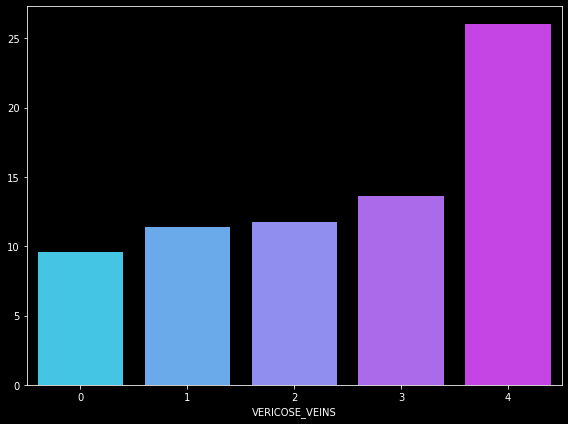

HYPOTENSION


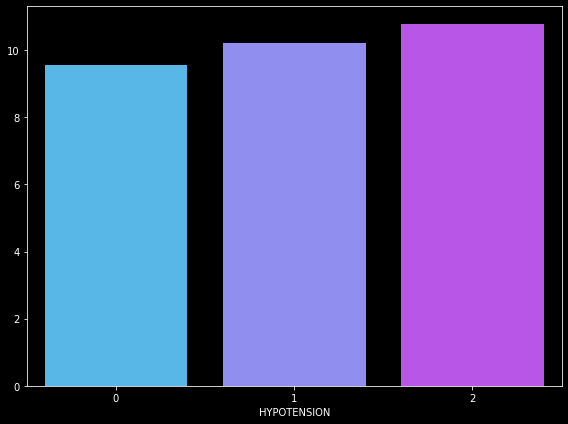

UPPER_RESPIRATORY_INFECTION


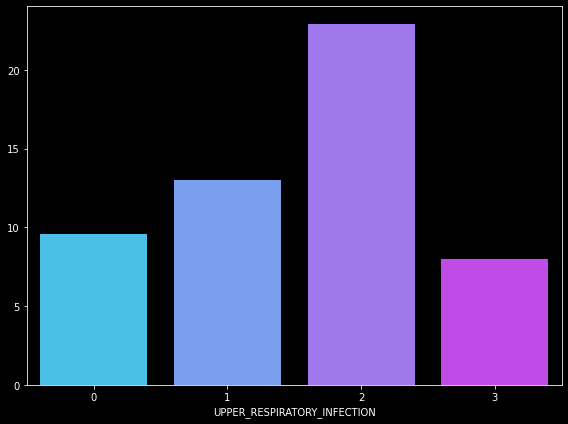

UPPER_RESPIRATORY_DX


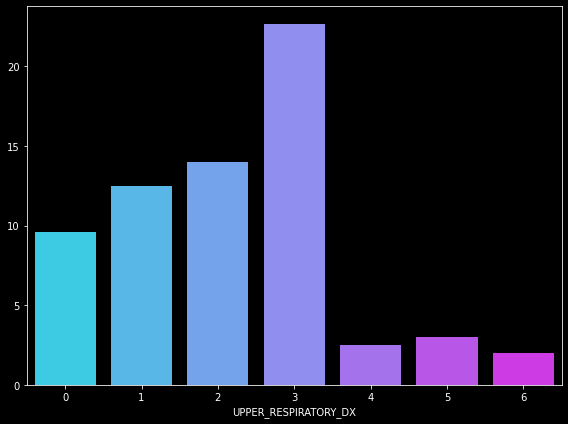

PNA


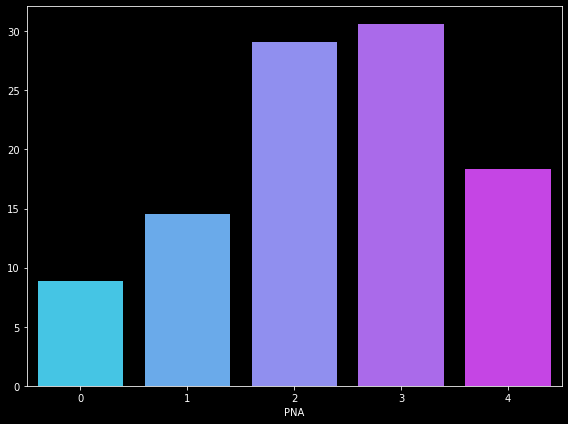

INFLUENZA


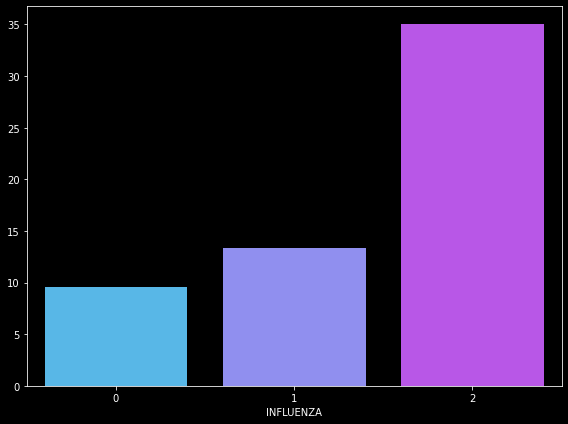

BRONCHITIS


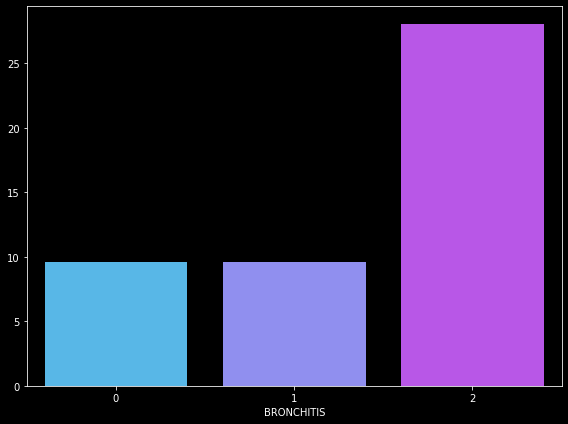

EMPHYSEMA


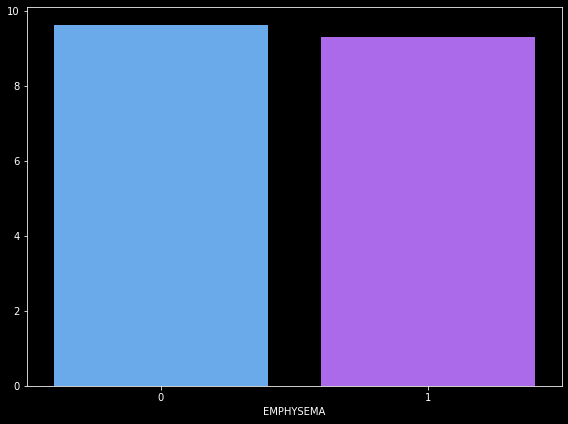

ASTHMA


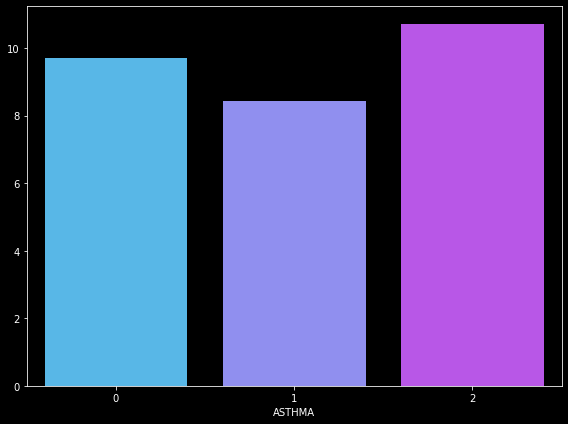

OBSTRUCTIVE_PULMONARY_DX_OTHER


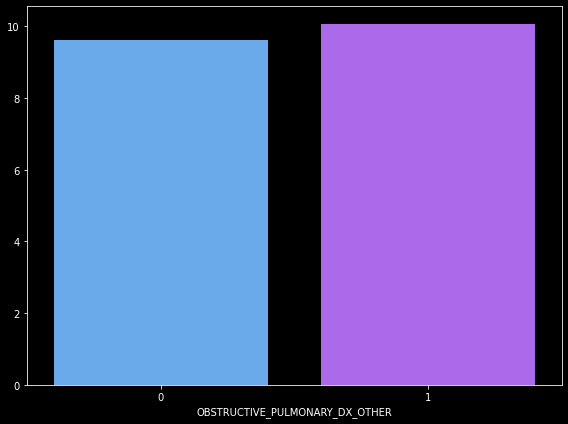

COPD


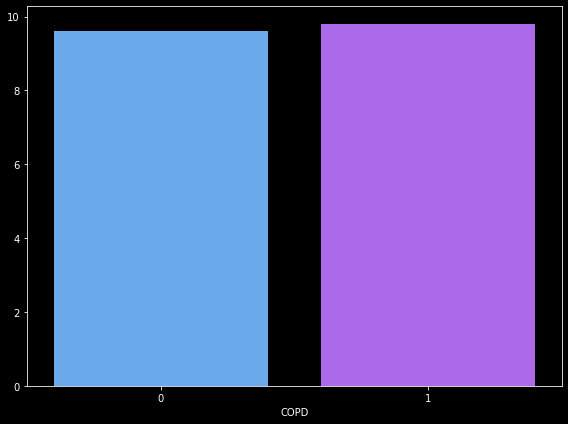

RESPIRATORY_DX_DT_EXTERNAL_AGENT


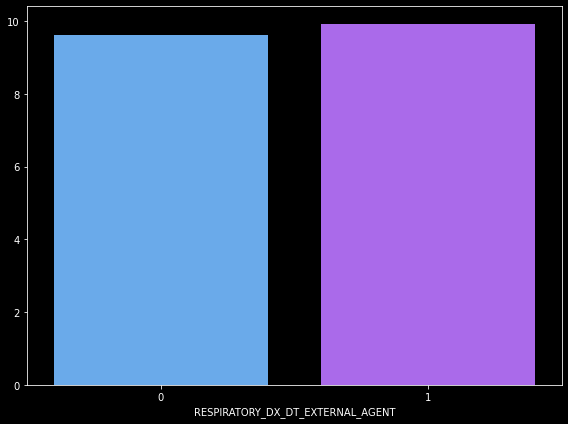

ASPIRATION


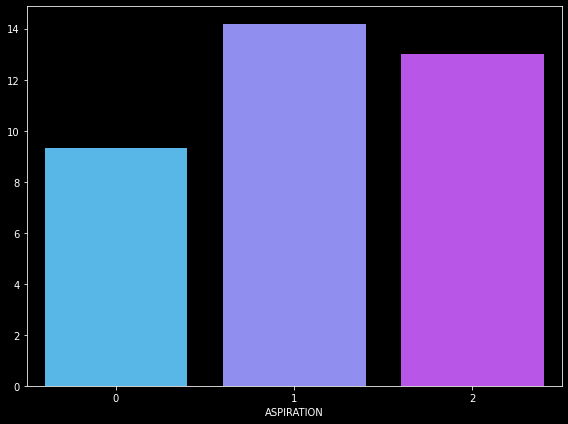

EMPYEMA_PLEURISY


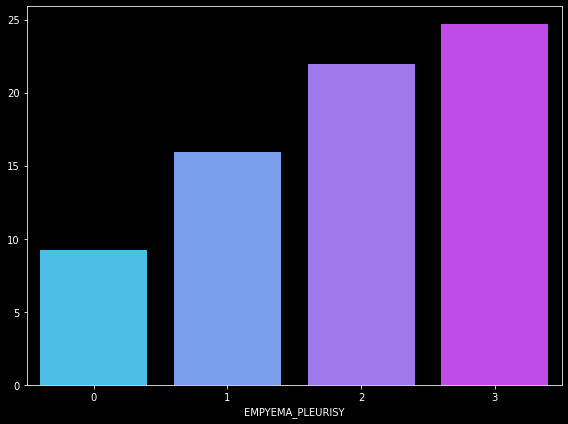

PNEUMOTHORAX


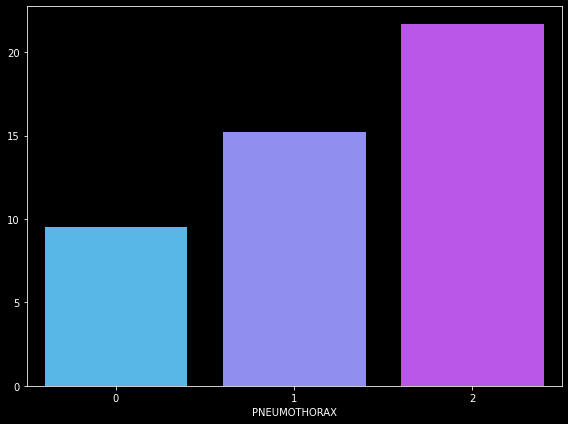

LUNG_ABSCESS


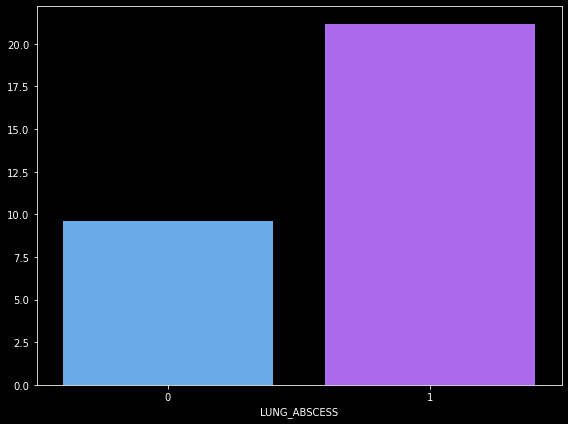

PULMONARY_CONGESTION


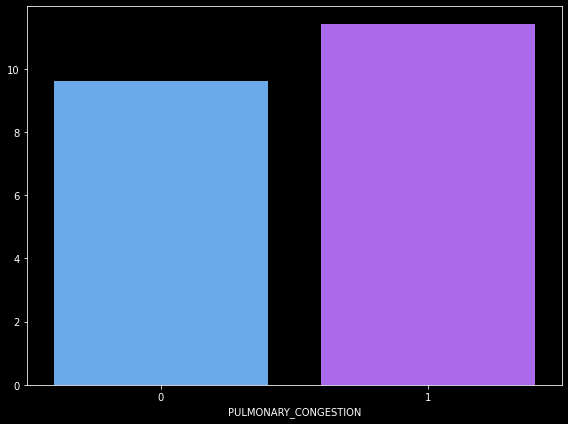

PULMONARY_FIBROSIS


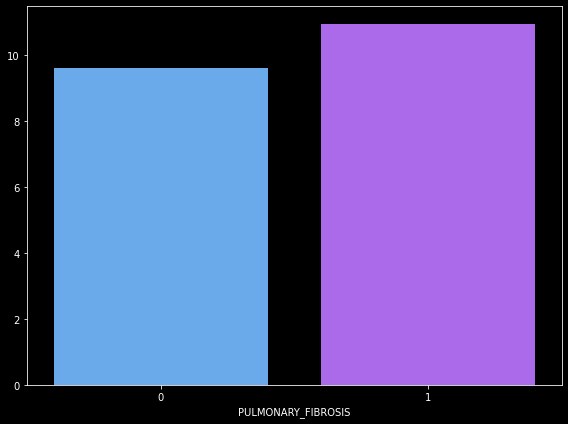

PNEUMOPATHY


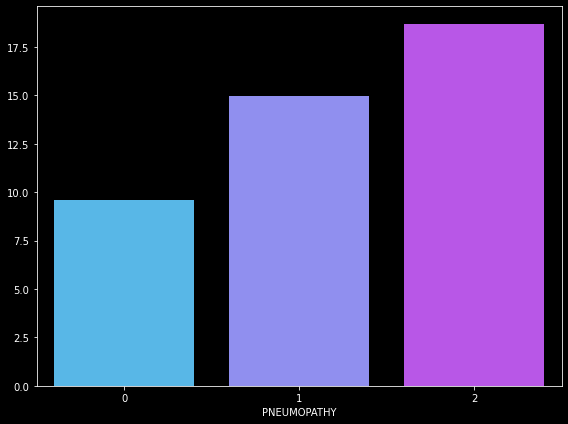

LUNG_DX_DT_OTHER_DX


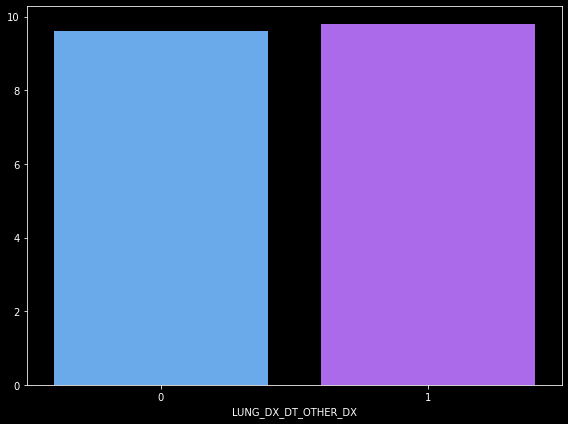

LUNG_COLLAPSE_FAILURE


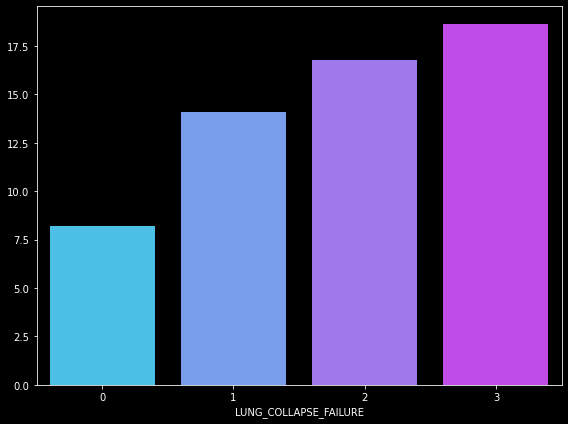

RESPIRATORY_DX_OTHER


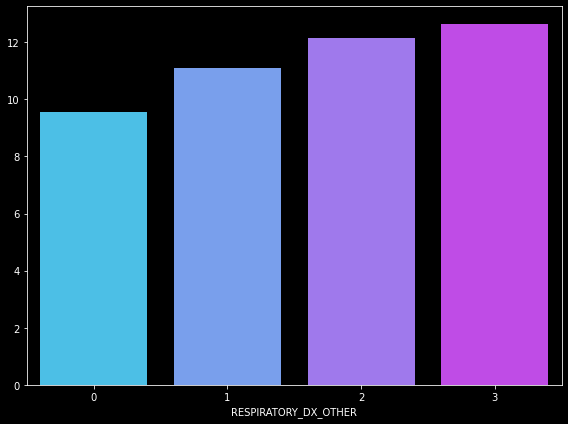

ORAL_CAVITY_DX


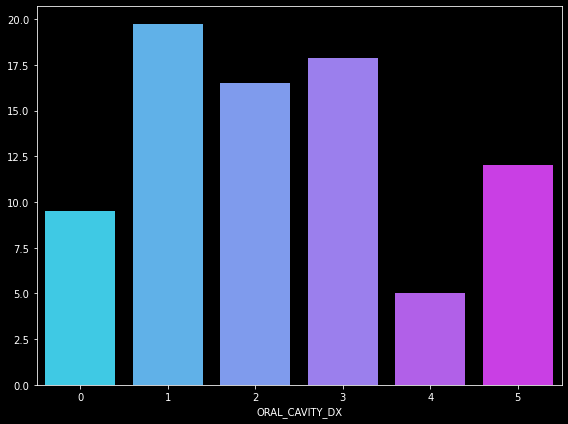

ESOPHAGEAL_DX


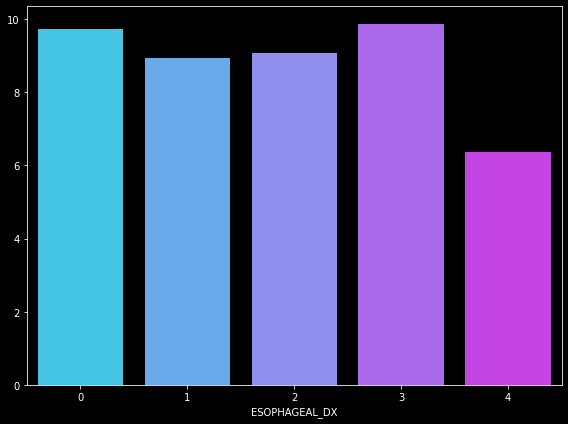

GI_ULCER


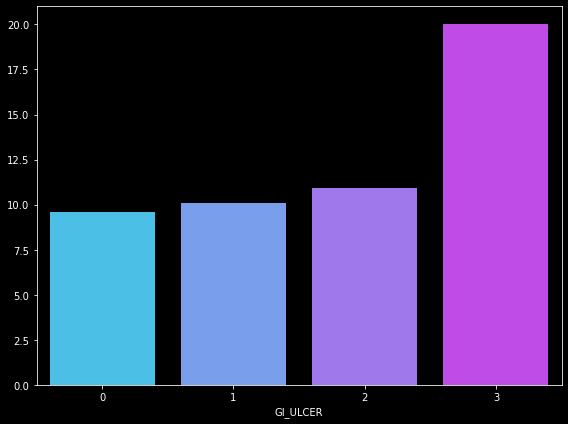

GASTRITIS_DUODENITIS


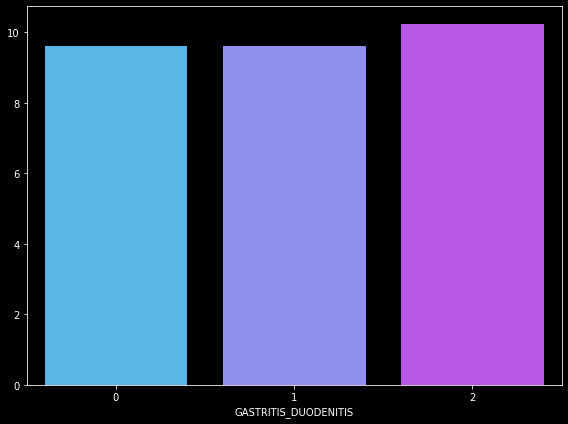

GI_FX_DX


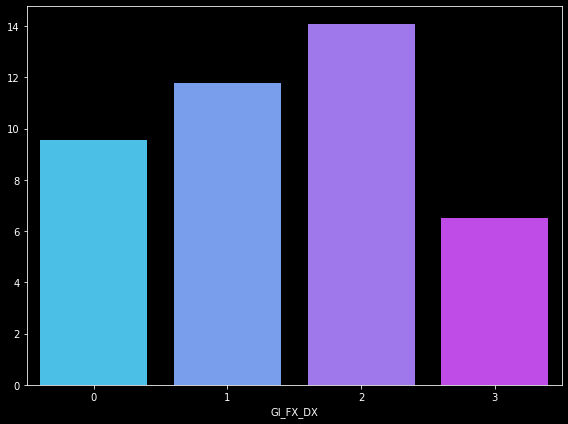

STOMACH_DUODENAL_DX_OTHER


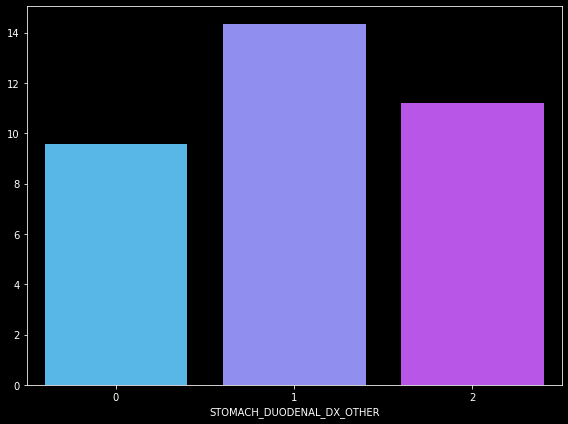

APPENDICITIS


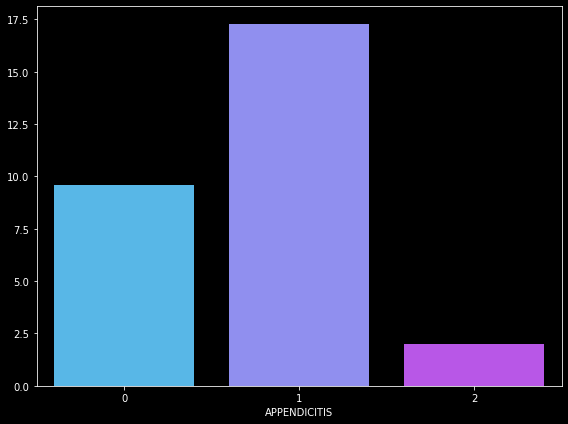

HERNIA


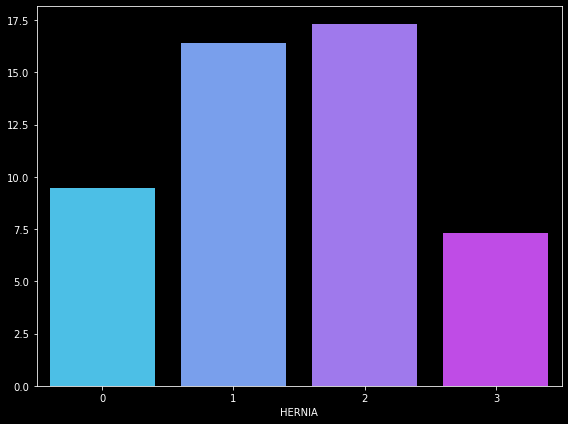

INFLAMMATORY_BOWEL_DX


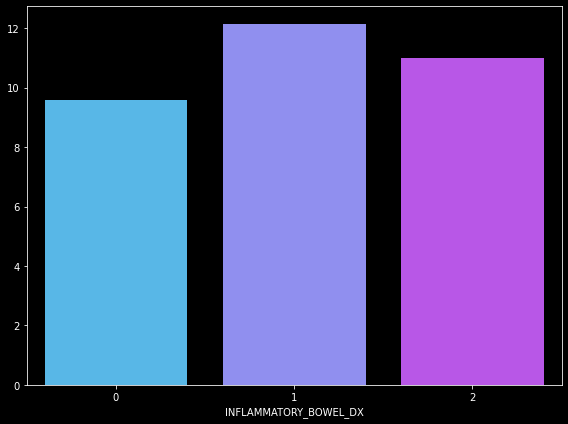

GI_VASCULAR_INSUFFICIENCY


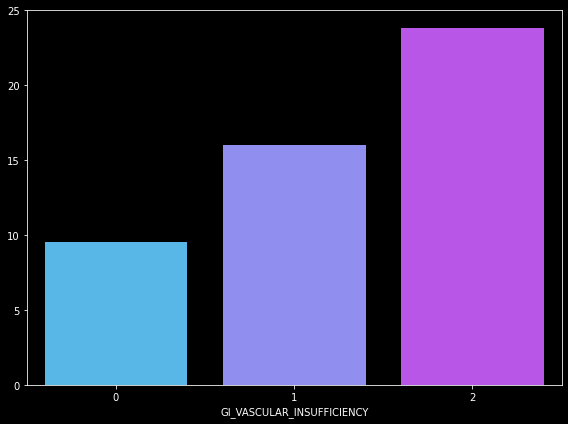

GI_INFLAMMATION_OTHER


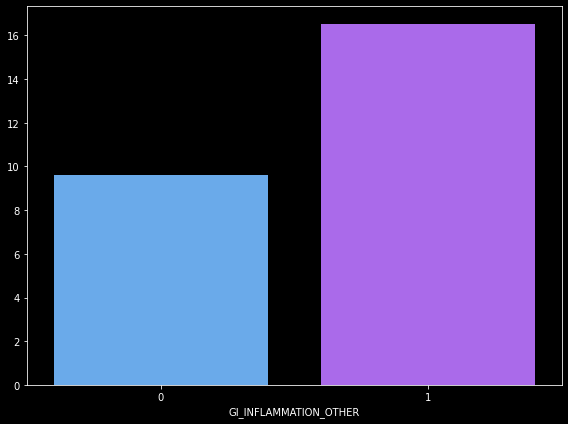

GI_OBSTRUCTION


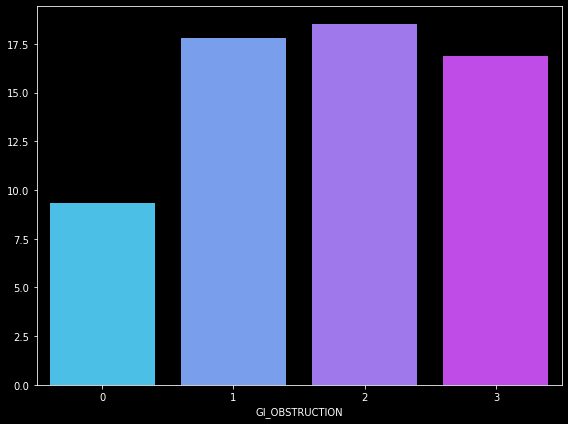

DIVERTICULA


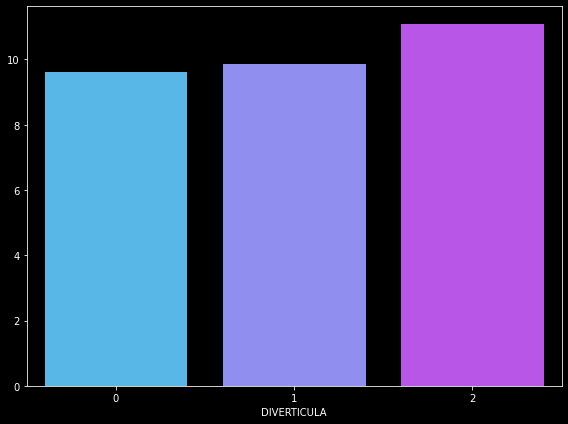

INTESTINAL_DX_OTHER


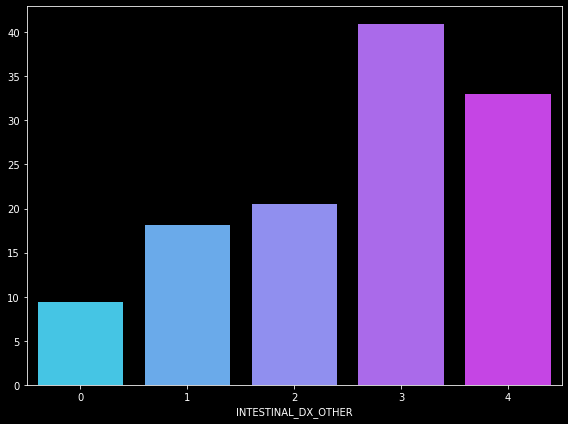

PERITONAL_INFECTION


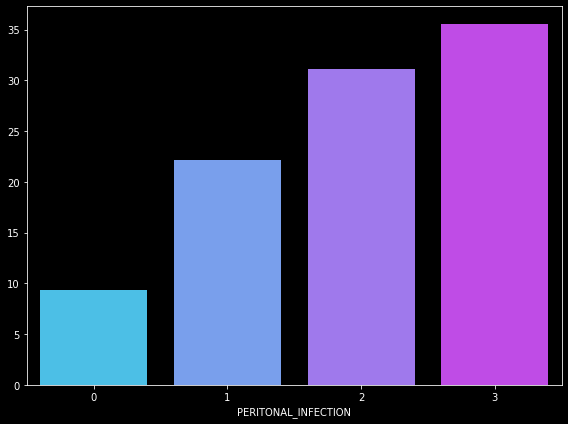

PERITONAL_DX


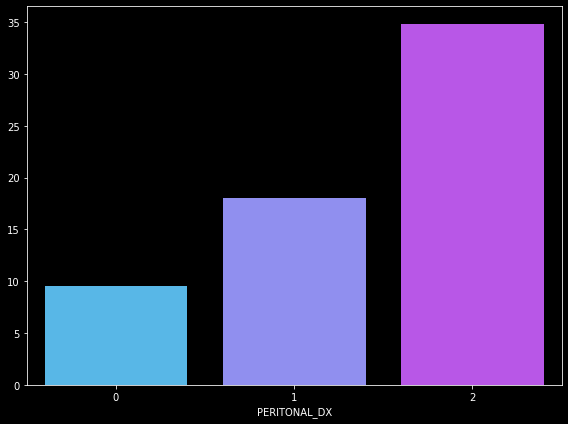

LIVER_NECROSIS


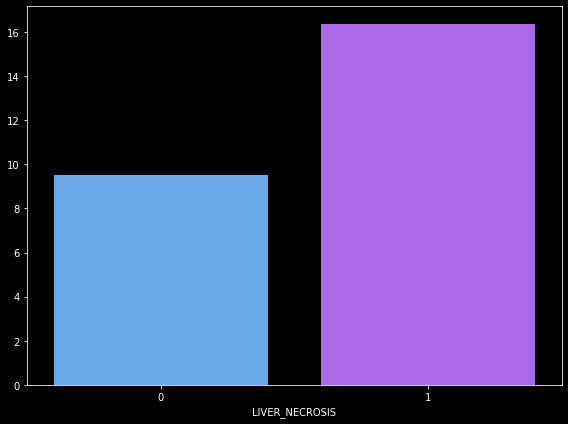

CHRONIC_LIVER_DX


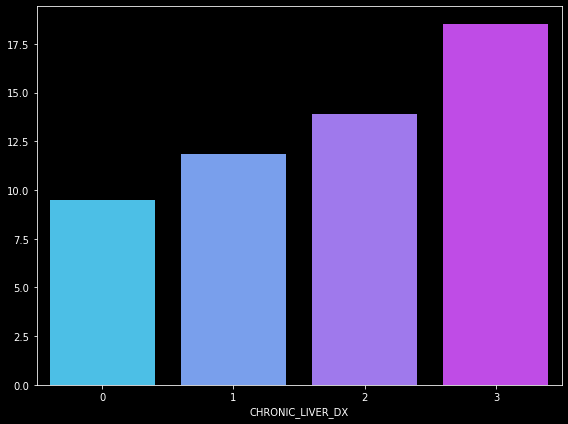

LIVER_DX_SEQUELAE


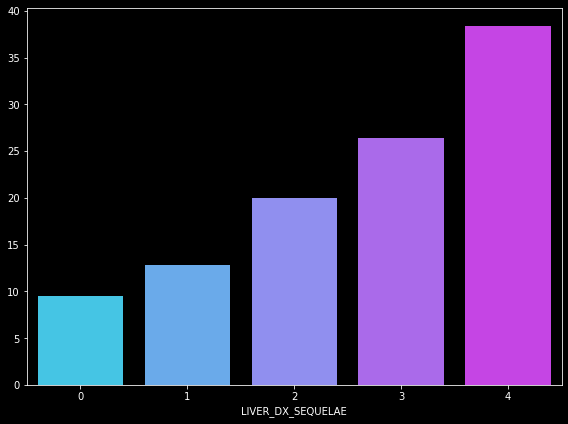

LIVER_DX_OTHER


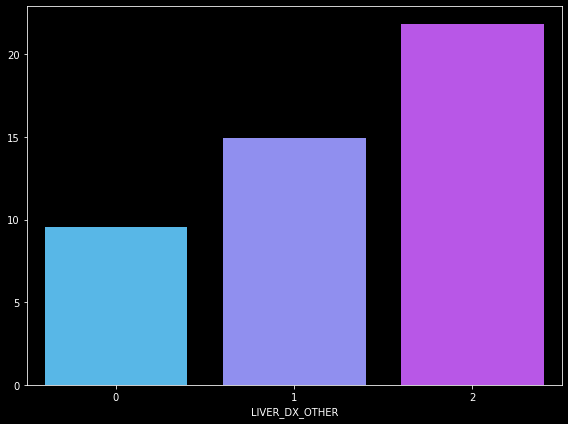

CHOLELITHIASIS


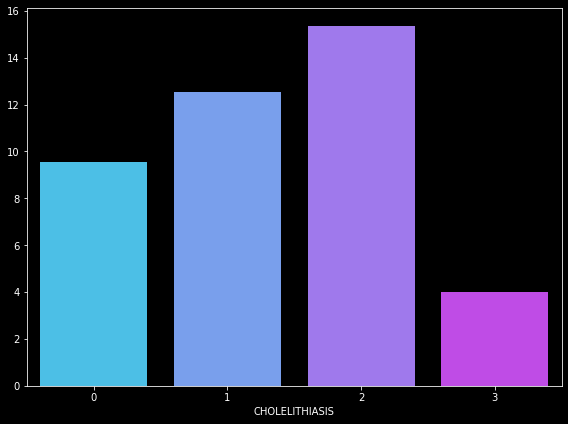

GALLBLADDER_DX


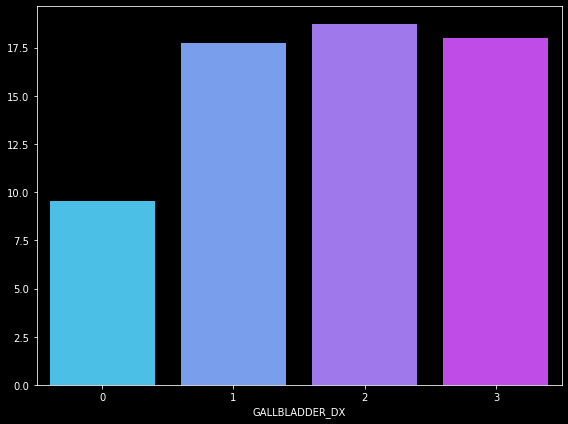

BILLIARY_DX_OTHER


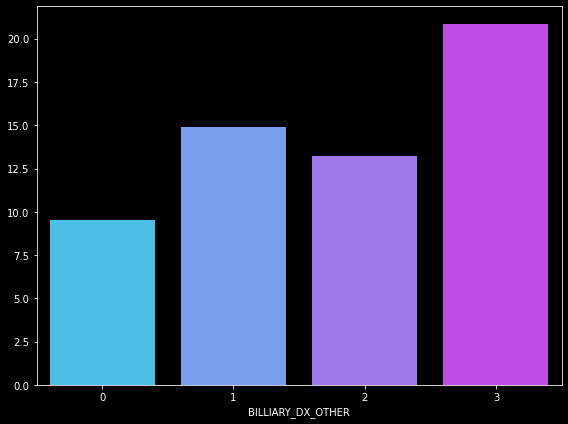

PANCREATIC_DX


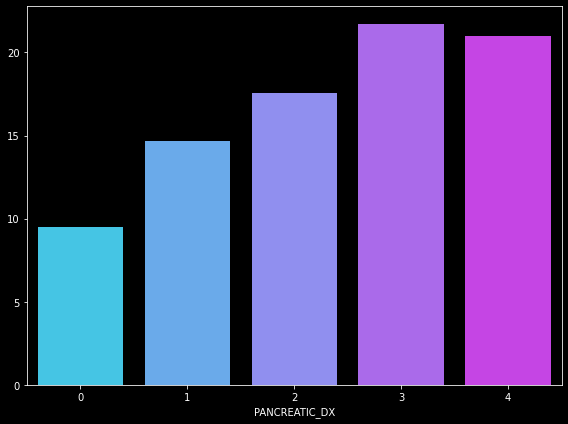

GIB


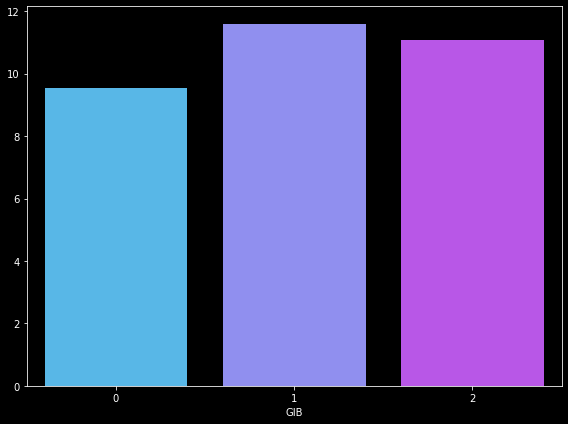

MALABSORBTION


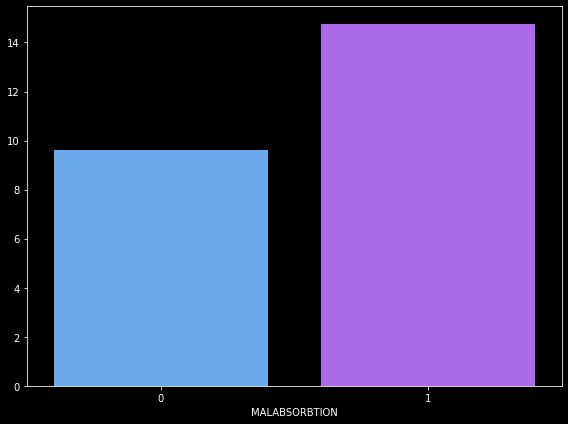

NEPHRITIS


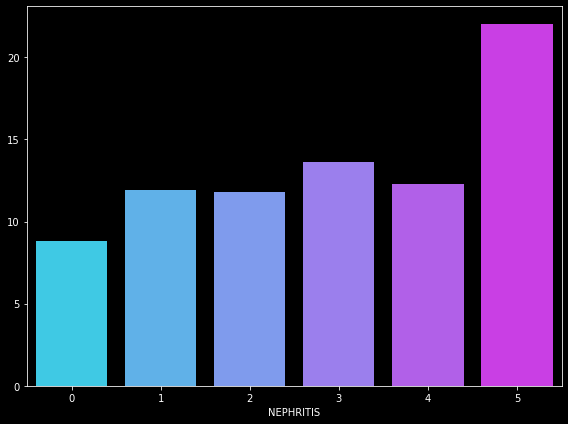

RENAL_FAILURE


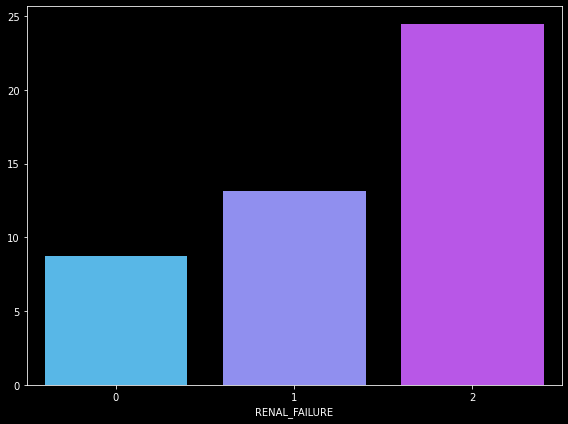

CKD


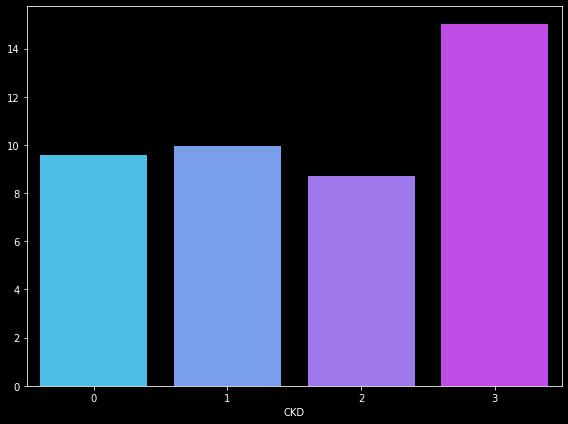

DX_DT_IMPAIRED_RENAL_FX


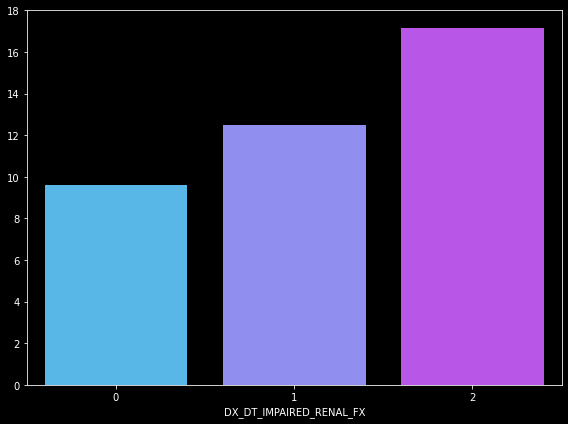

KIDNEY_INFECTION


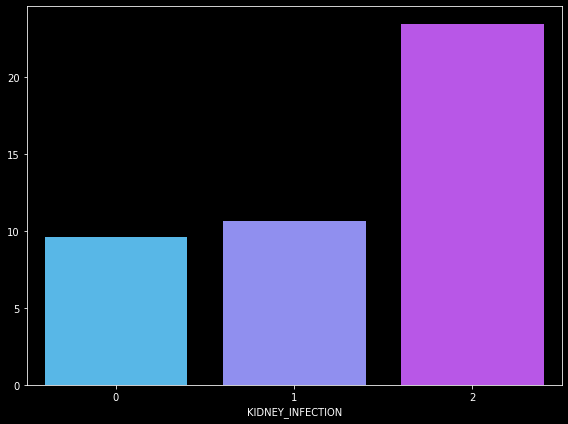

HYDRONEPHRITIS


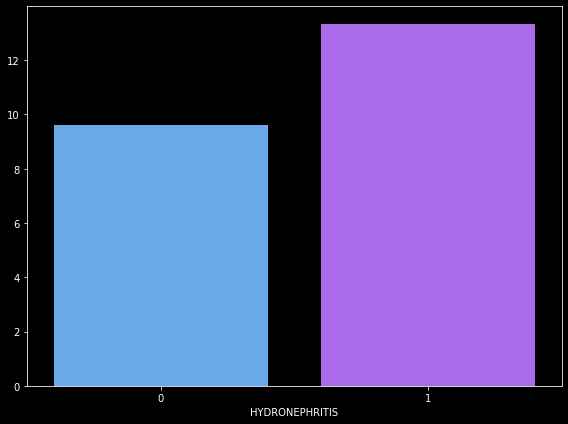

RENAL_STONES


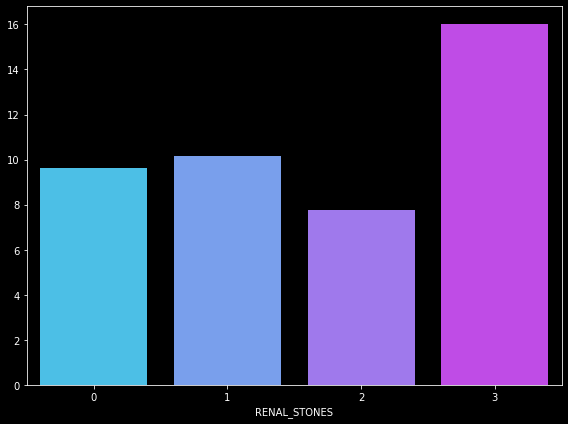

RENAL_DX_OTHER


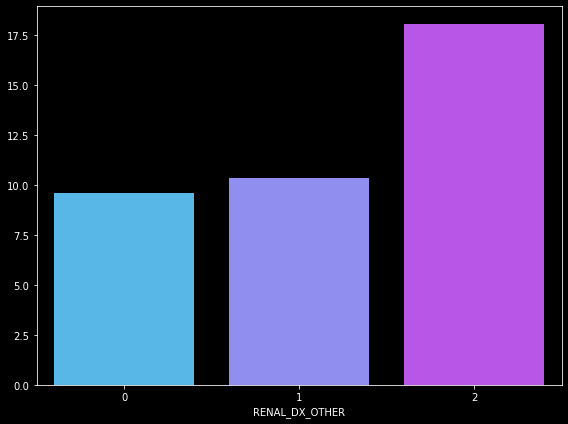

BLADDER_DX


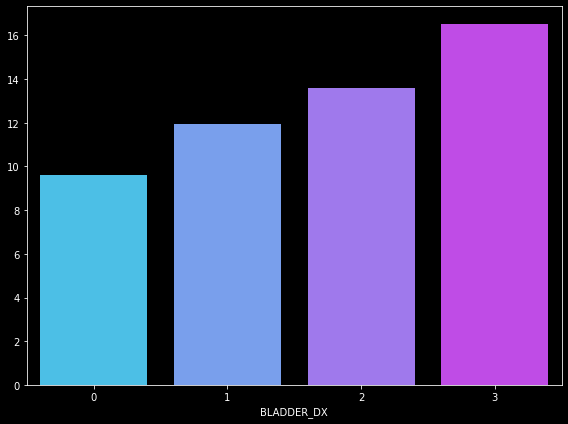

URINARY_TRACT_DX


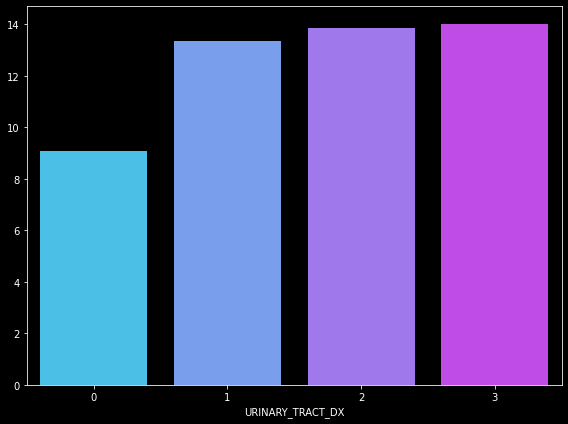

PROSTATE_DX


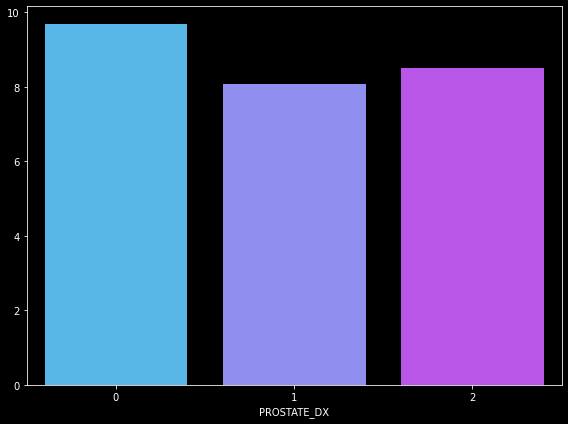

MALE_GENITAL_DX_OTHER


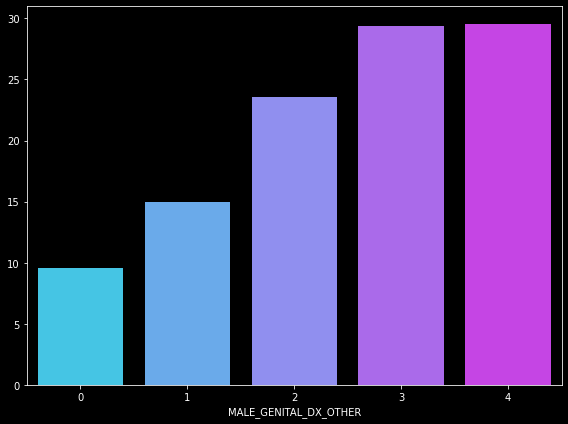

BREAST_DX


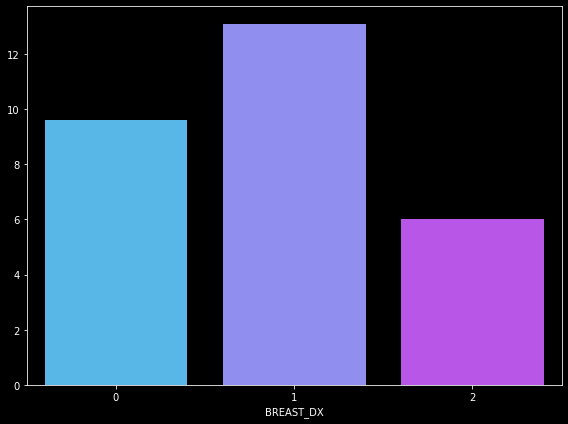

FEMALE_PELVIC_ORGAN_INFLAMMATION


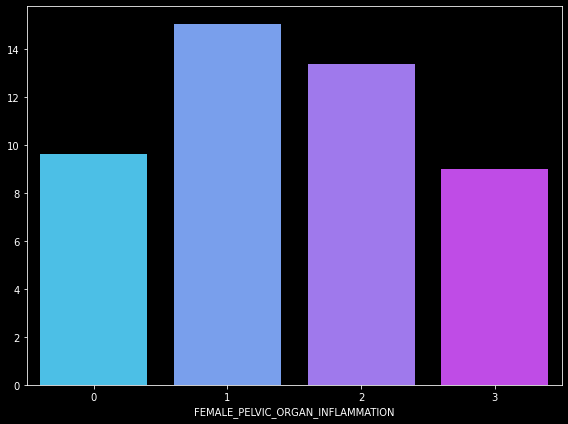

FEMALE_GENITAL_DX_OTHER


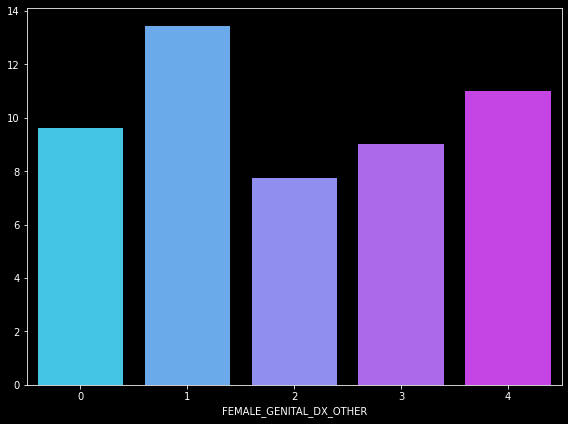

ABORTIVE_PREGNANCY


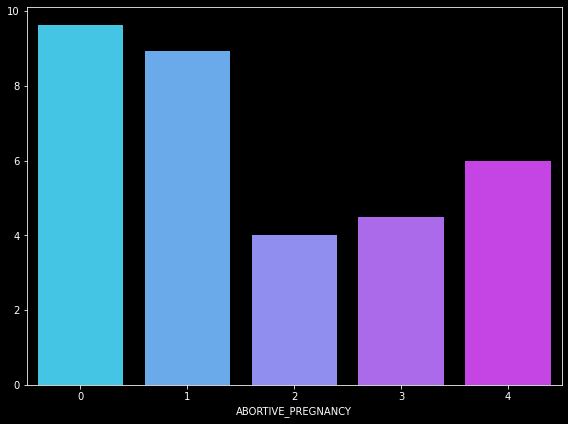

COMPLICATIONS_DT_PREGNANCY


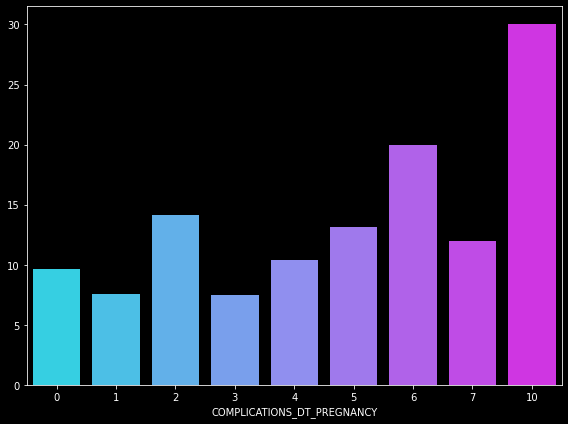

NORMAL_PREGNANCY


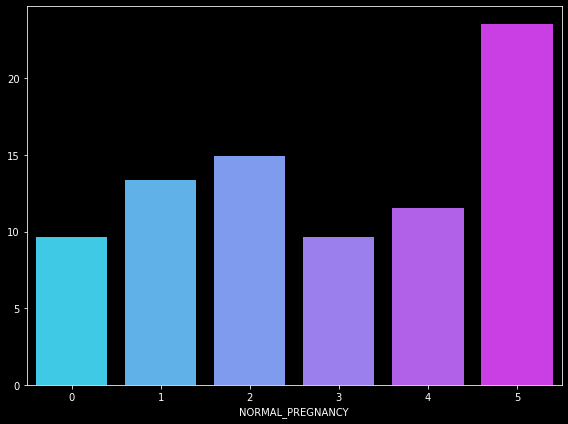

LABOR_DELIVERY_COMPLICATIONS


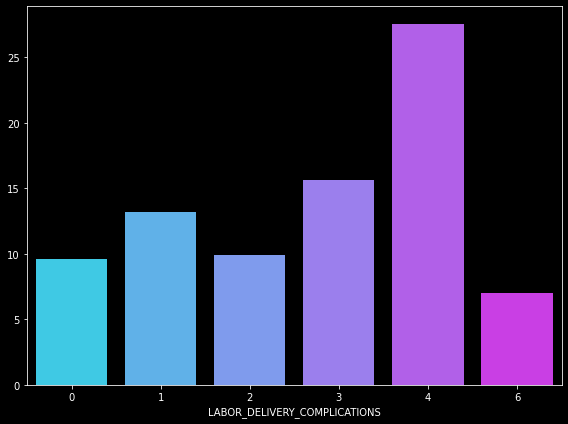

PUERPERIUM_COMPLICATION


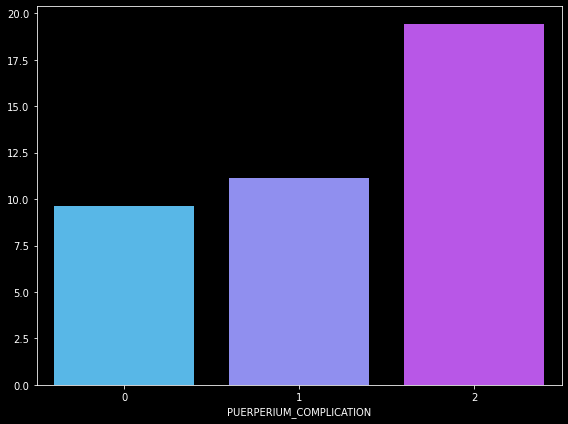

SKIN_INFECTION


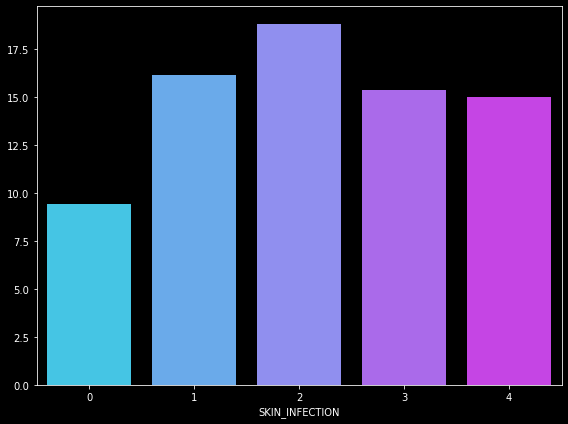

SKIN_INFLAMMITORY_DX


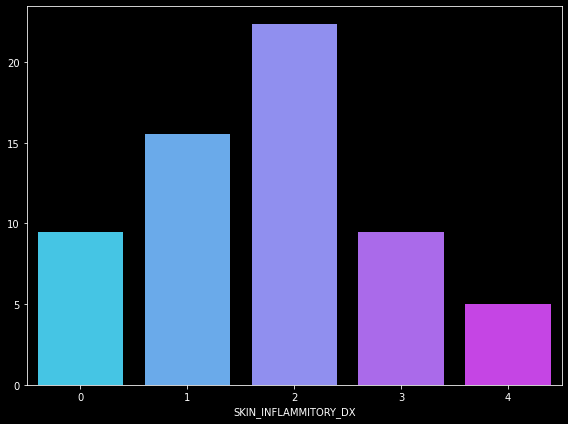

SKIN_DX_OTHER


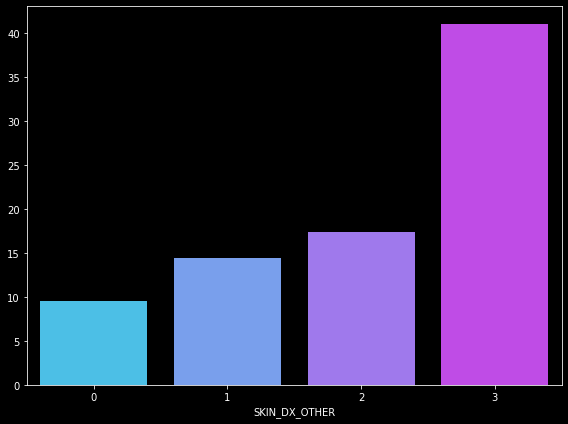

CHRONIC_SKIN_ULCER


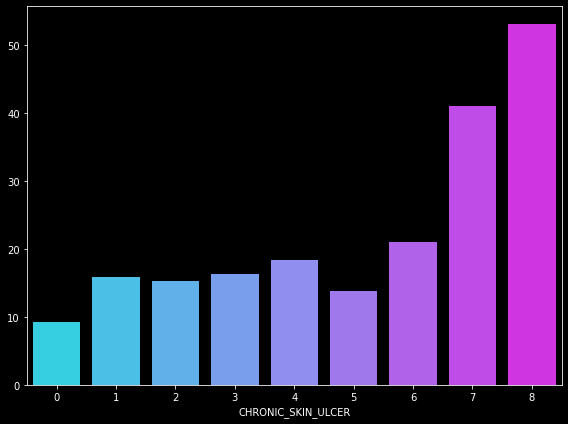

DIFFUSE_CONNECTIVE_TISSUE_DX


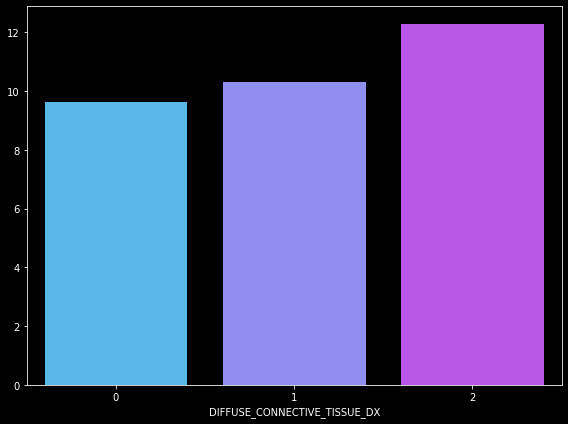

JOINT_INFECTION


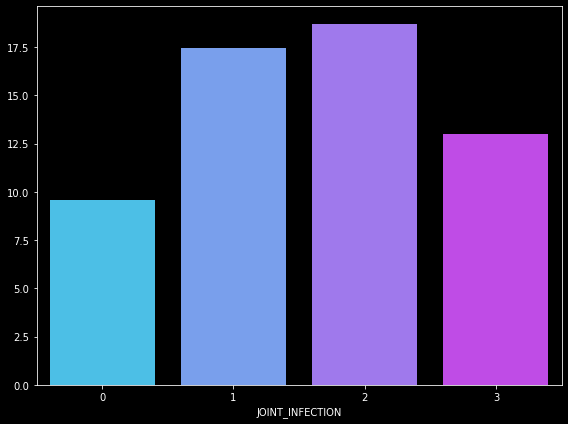

ARTHROPATHY_OTHER


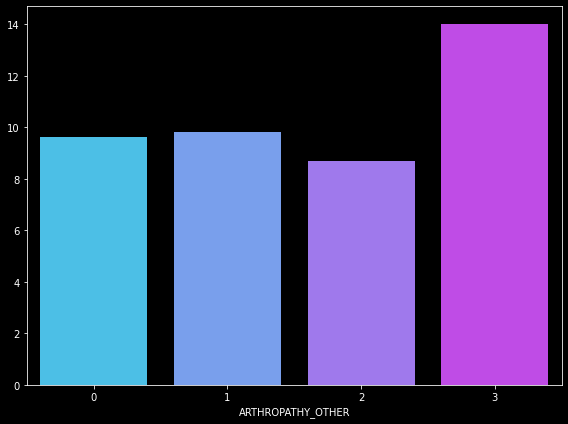

RA


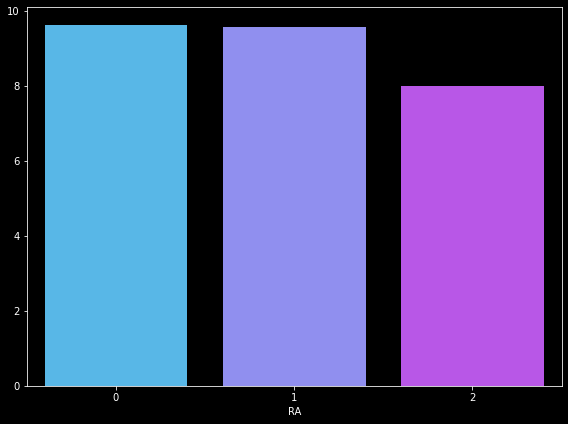

OA


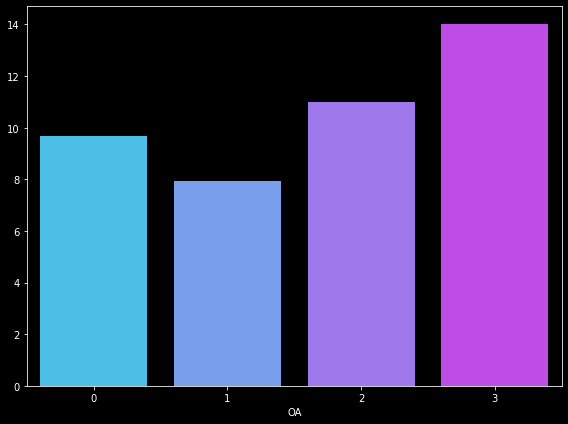

DORSOPATHY


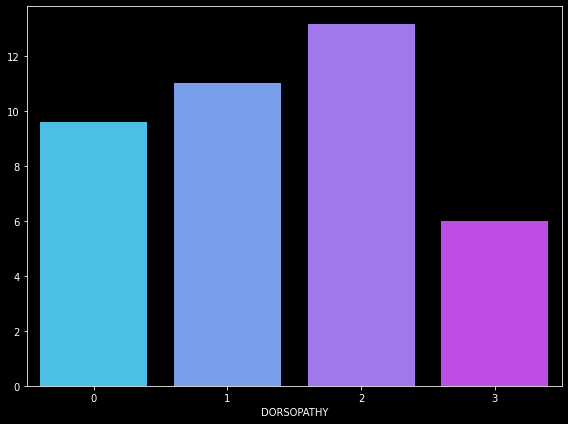

DISC_DX


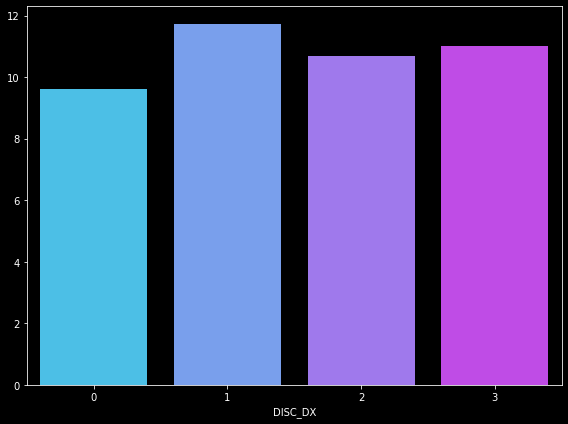

BACK_NECK_DX_OTHER


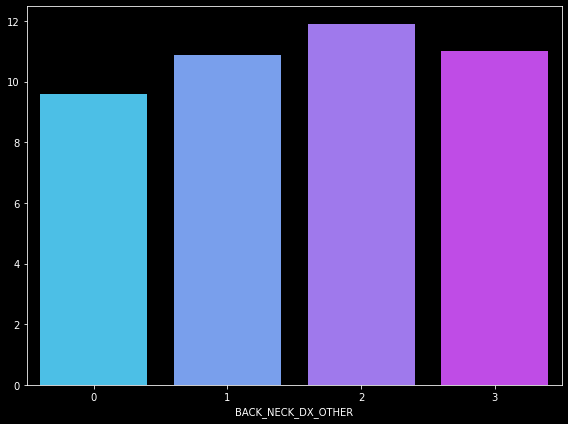

MYALGIA


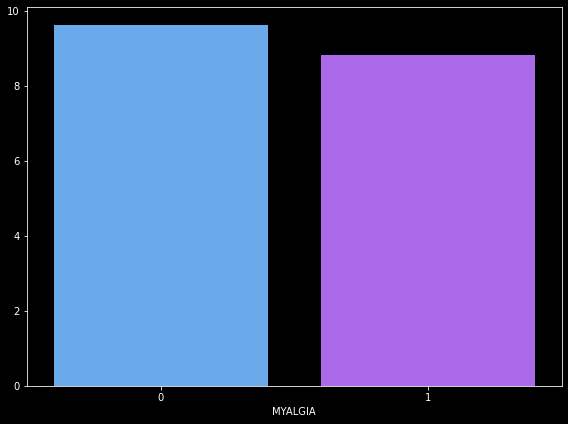

CONNECTIVE_TISSUE_DX


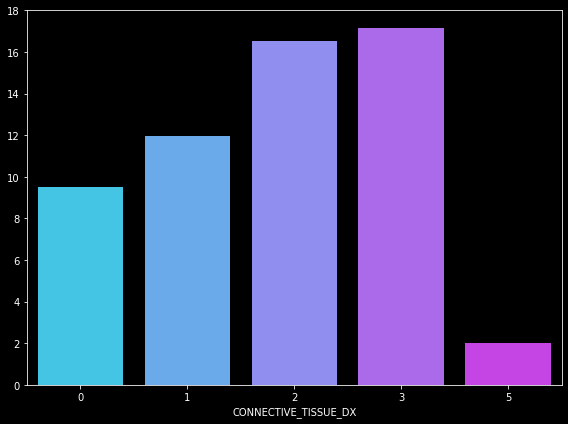

BONE_INFECTION


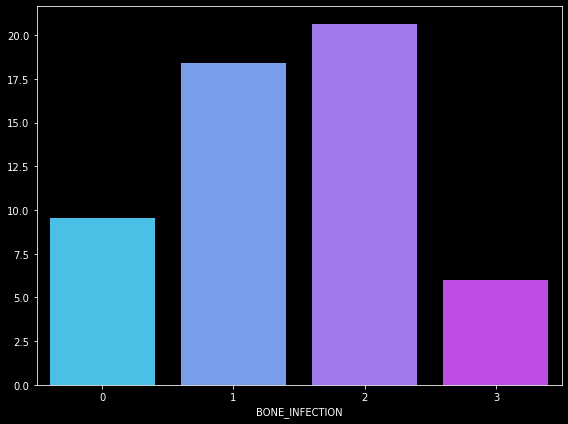

OSTEOPATHY


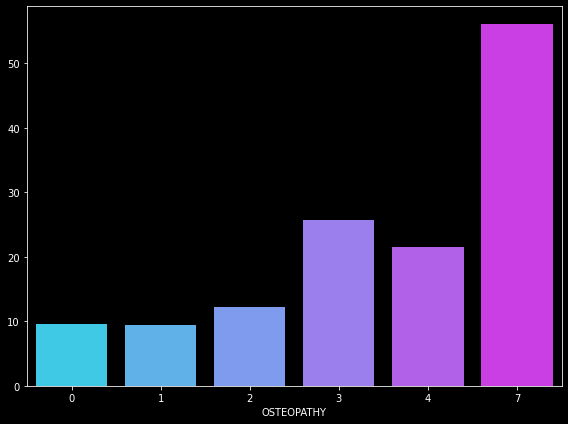

MUSCULOSKELETAL_DEFORMITY


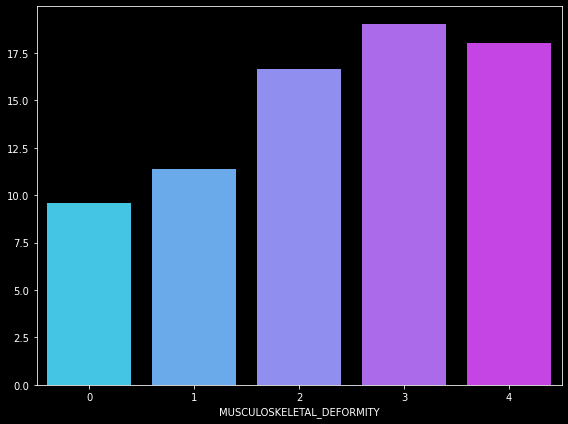

SPINAL_CURVE


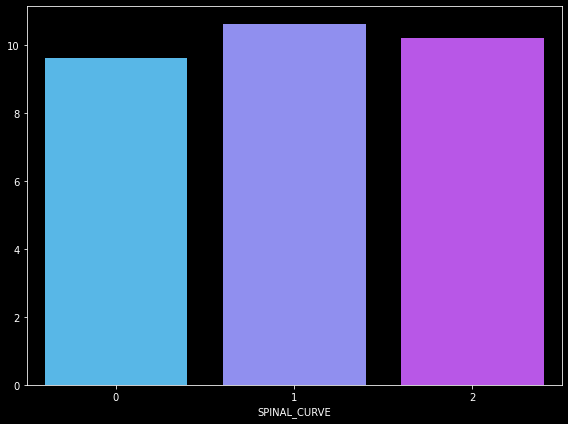

CONGENITAL_NEURO_ANOMALY


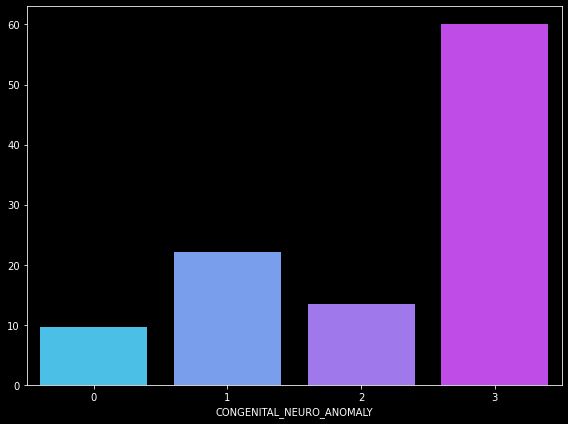

CONGENITAL_ANOMALY_OTHER


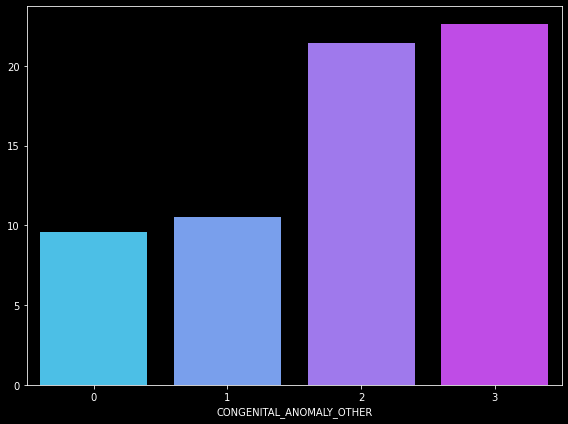

CIRCULATORY_CONGENITAL_ANOMALY


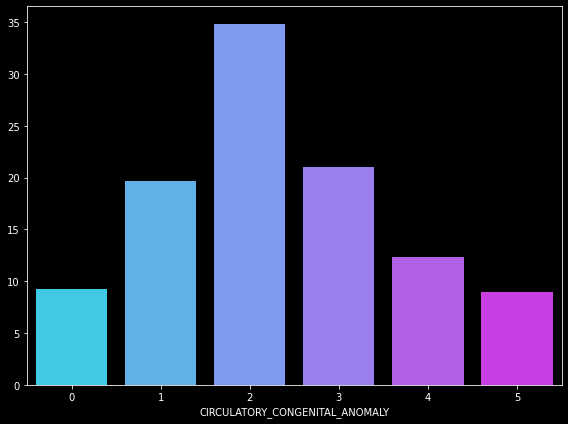

RESPIRATORY_CONGENITAL_ANOMALY


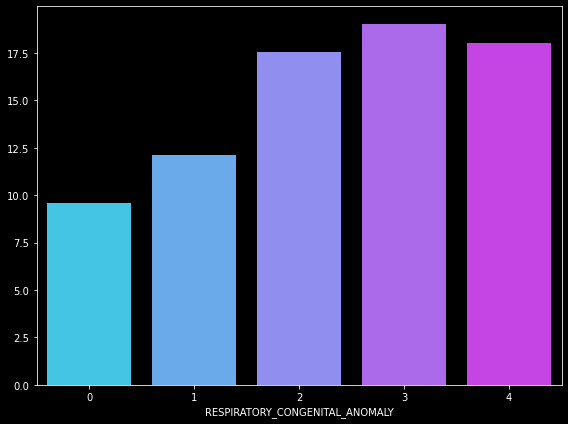

GI_CONGENITAL_ANOMALY


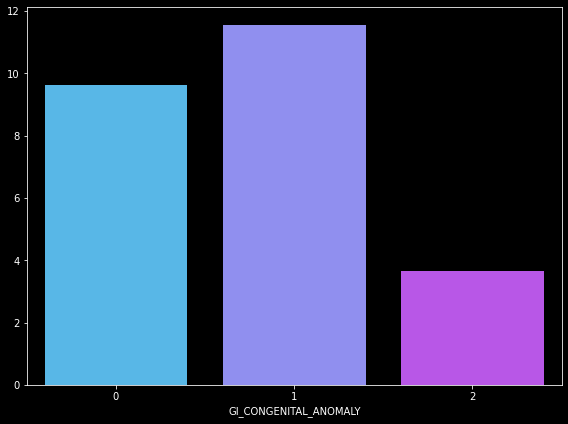

GU_CONGENITAL_ANOMALY


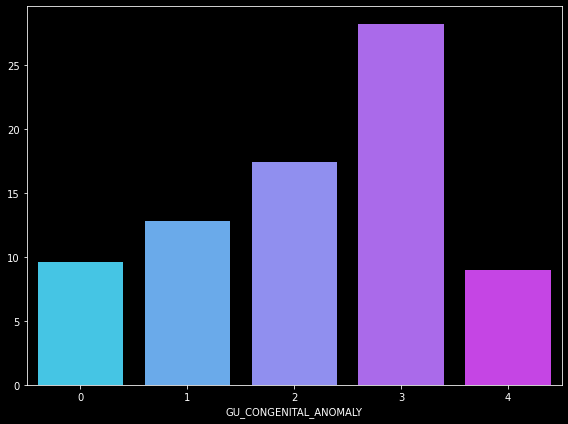

CHROMOSOMAL_ANOMALY


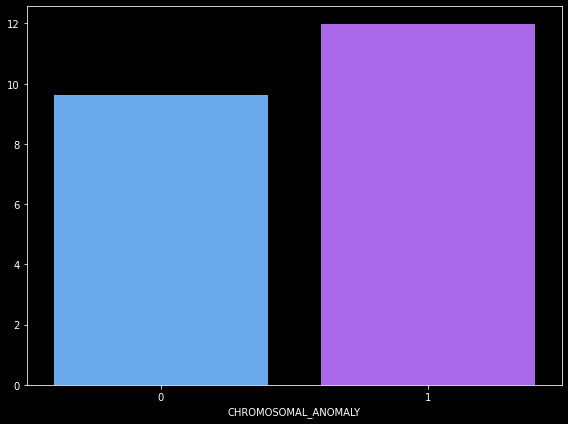

PERINATAL_MORTALITY_DT_MATERNAL


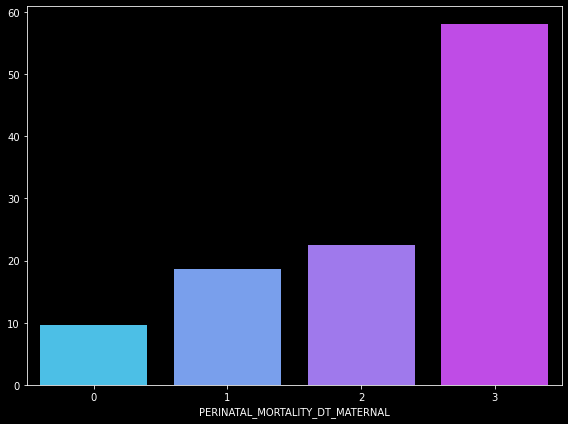

SHORT_GESTATION_LOW_BIRTH_WT


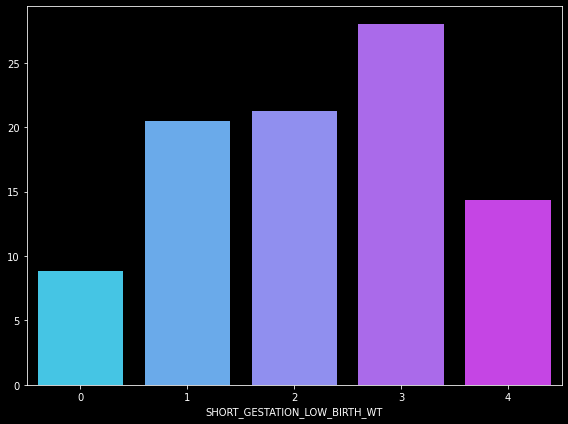

LONG_GESTATION_HIGH_BIRTH_WT


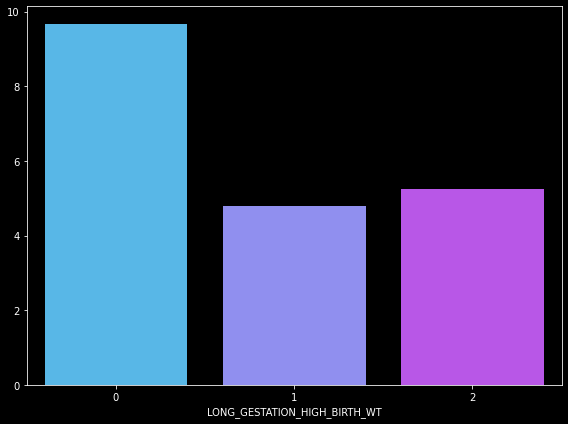

NEONATE_RESPIRATORY_ISSUES


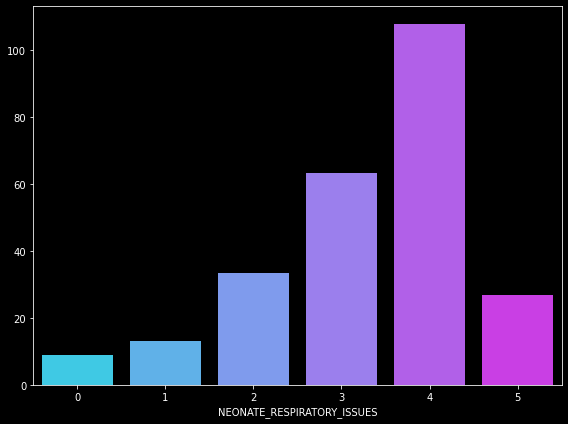

PERINATAL_INFECTION


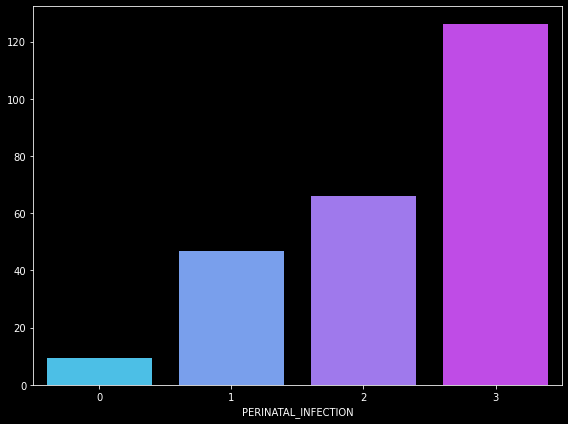

NEONATE_HEMORRHAGE


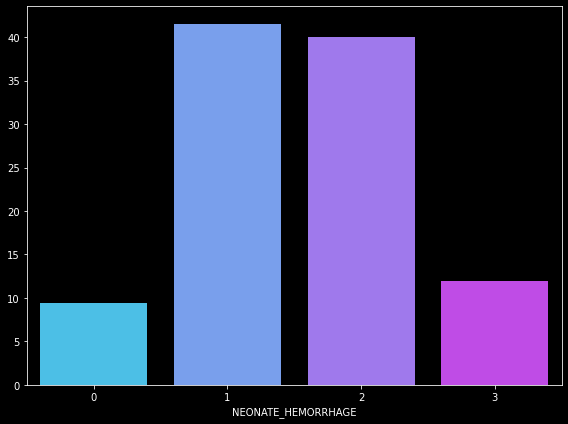

NEONATE_HEMOLYTIC_DX


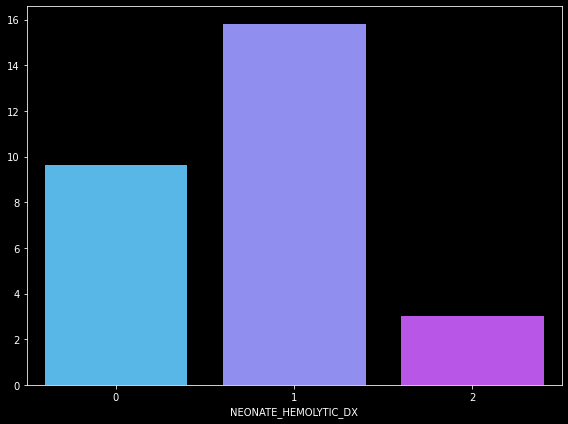

NEONATE_JAUNDICE


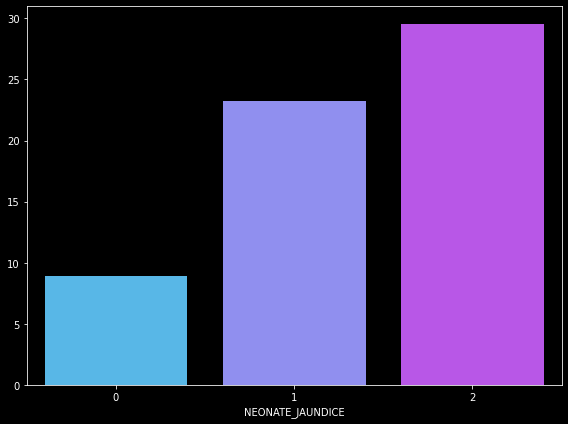

NEONATE_ENDOCRINE_DX


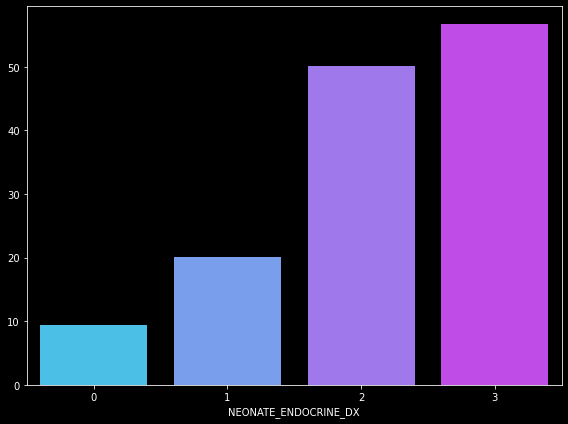

NEONATE_HEME_DX


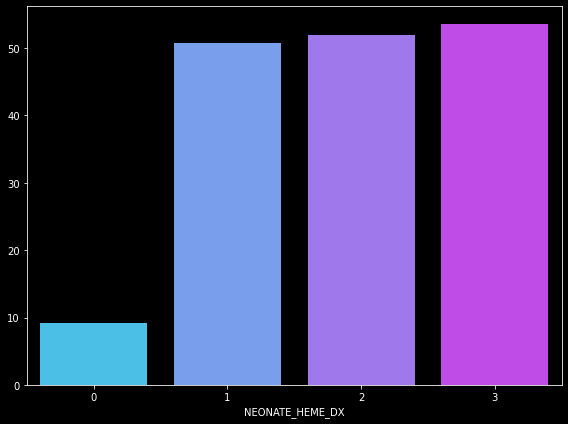

NEONATE_GI_DX


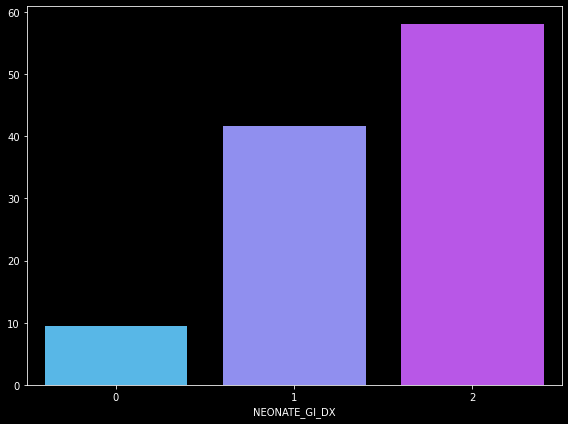

NEONATE_SKIN_DX_TEMP_REGULATION


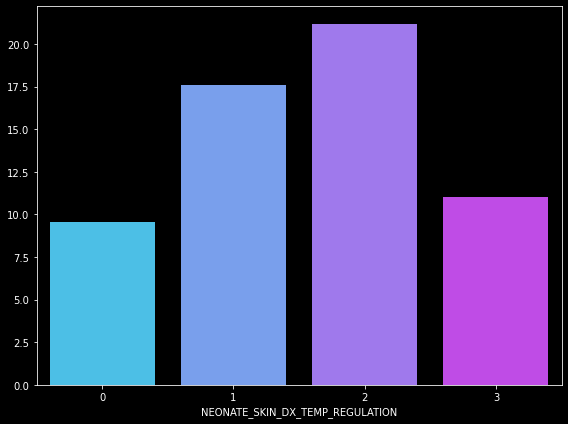

PERNATAL_ISSUES_OTHER


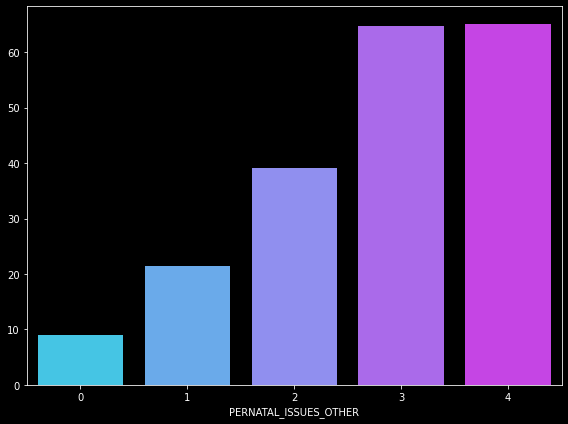

SEIZURES


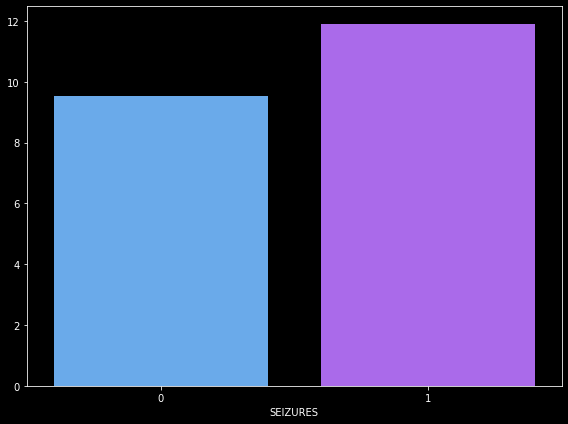

AMS


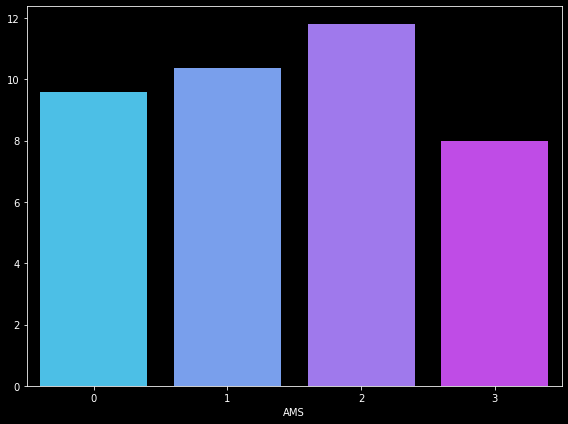

SYNCOPE


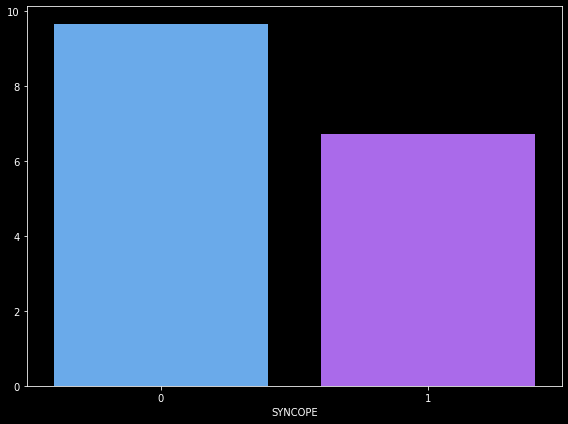

FEVER


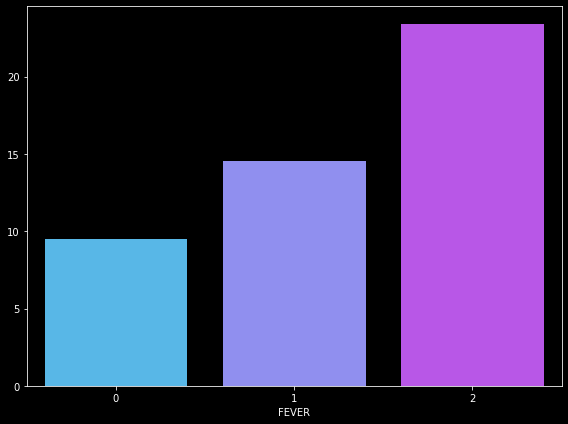

FATIGUE


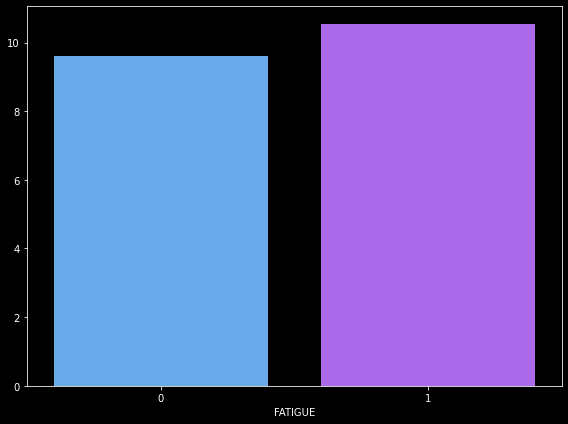

DIZZINESS


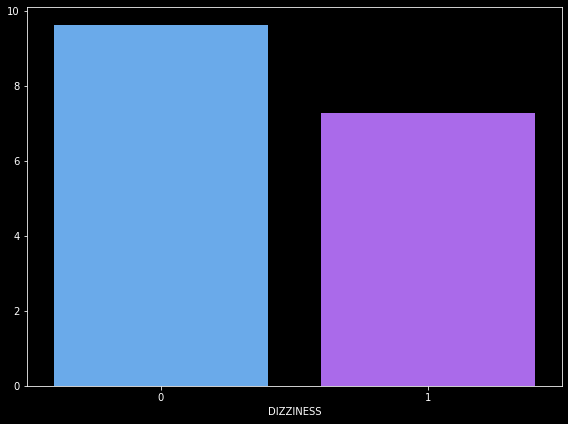

NEUROMUSCULAR_SYMPTOMS


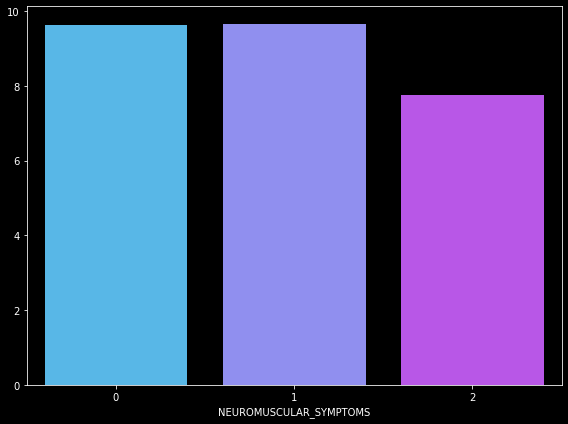

EPISTAXIS


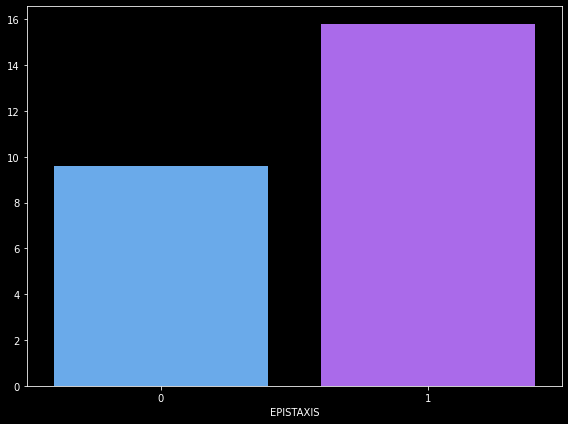

SHOCK


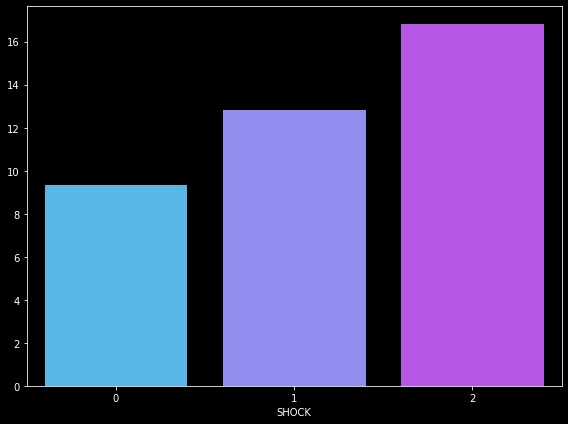

TACHYCARDIA_PALPITATIONS


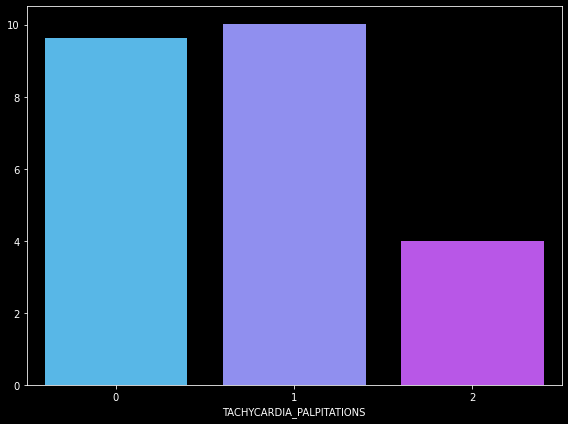

HEART_MURMUR


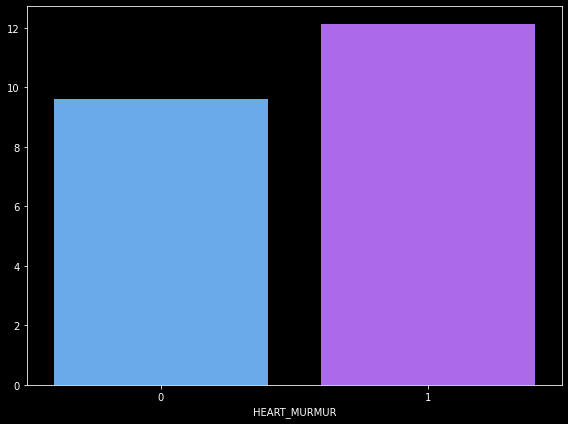

GANGRENE


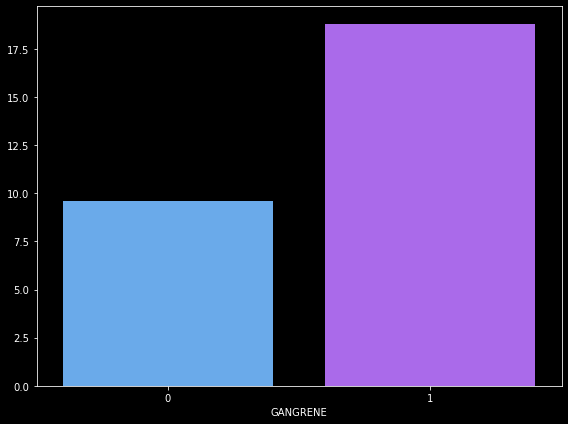

CARDIAC_SYMPTOMS_OTHER


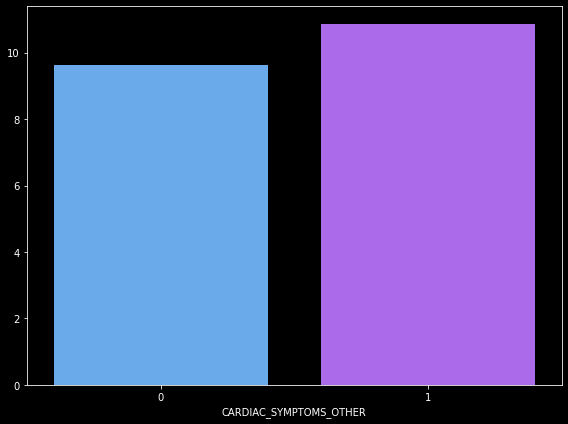

RESPIRATORY_SYMPTOMS


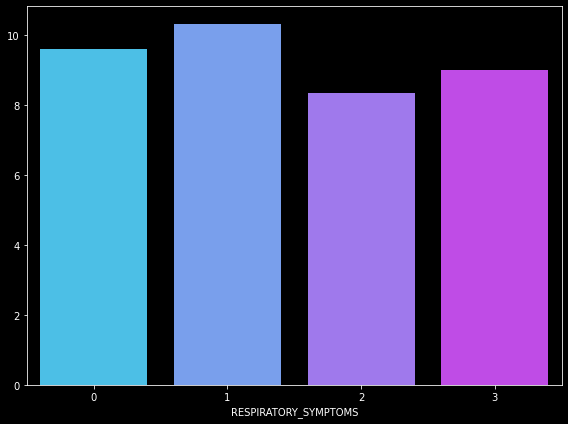

NV


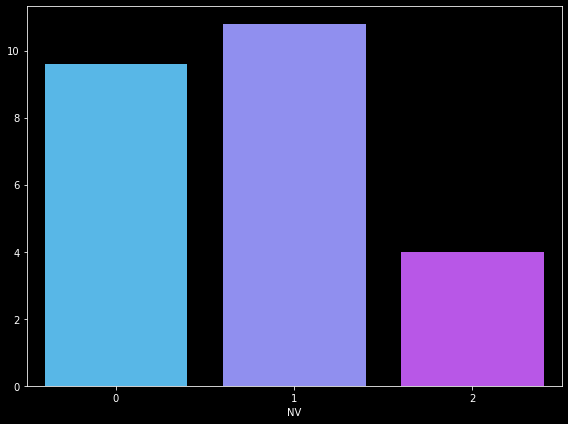

DYSPHAGIA


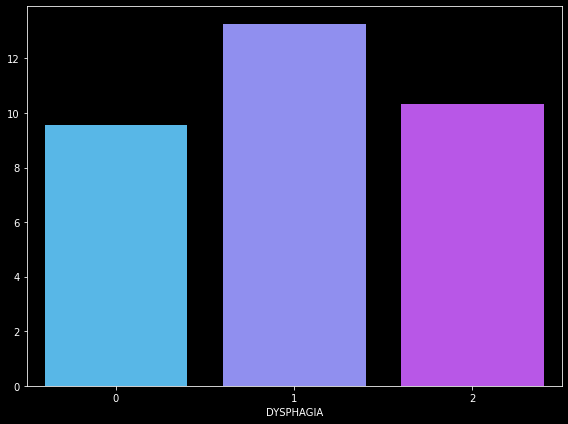

GI_SYMPTOMS_OTHER


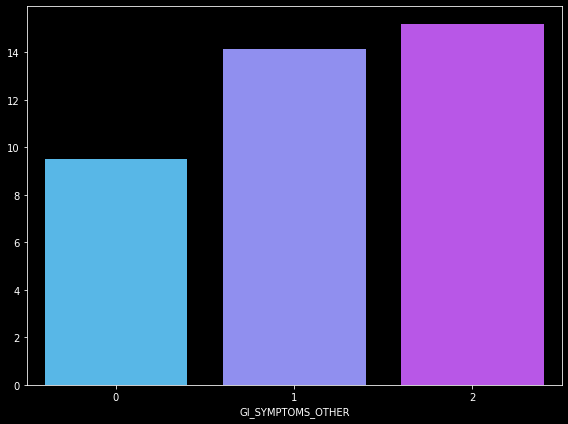

GU_SYMPTOMS_OTHER


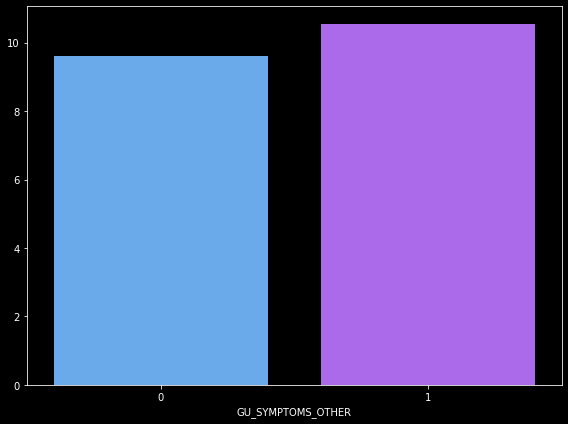

URINARY_INCONTINENCE_FREQUENCY


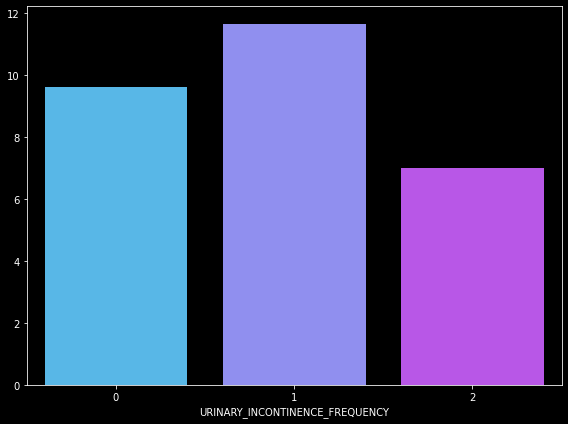

OLIGURIA_ANURIA


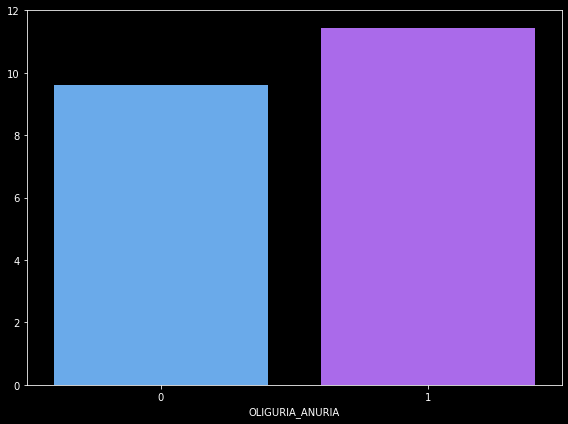

ABDOMINAL_PAIN


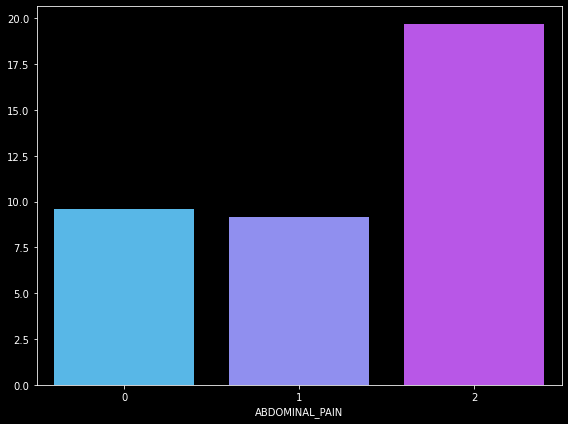

ASCITES


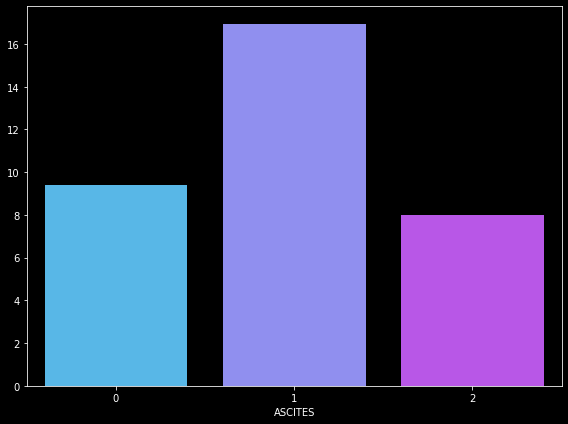

ABNORMAL_RBC


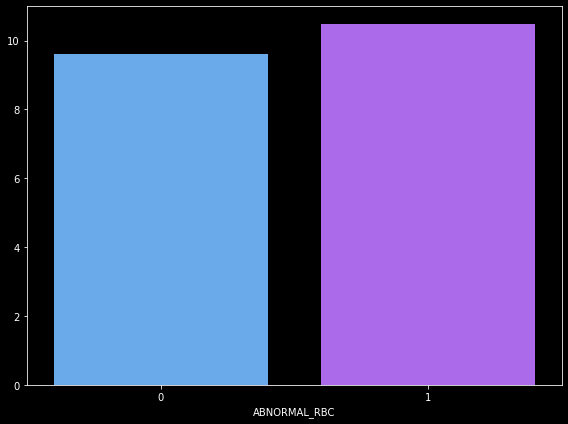

ABNORMAL_GLUCOSE


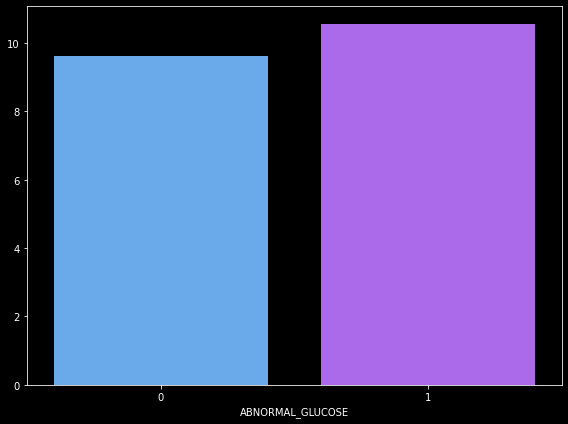

ABNORMAL_BLOOD_OTHER


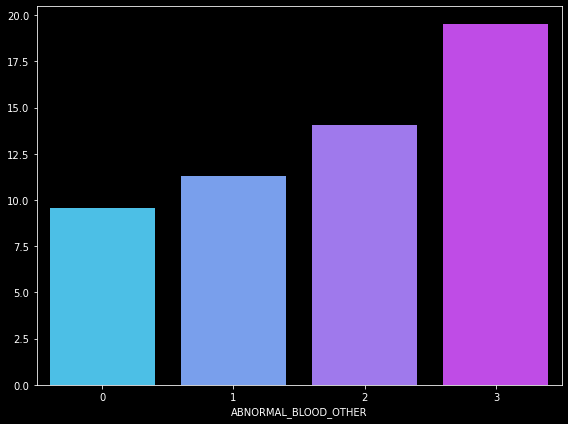

VIREMIA_BACTEREMIA


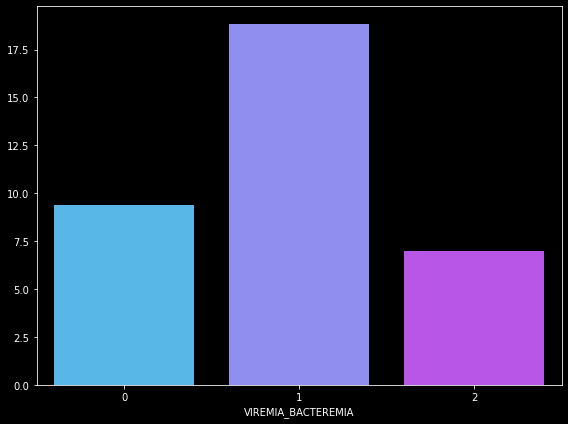

ABNORMAL_URINE


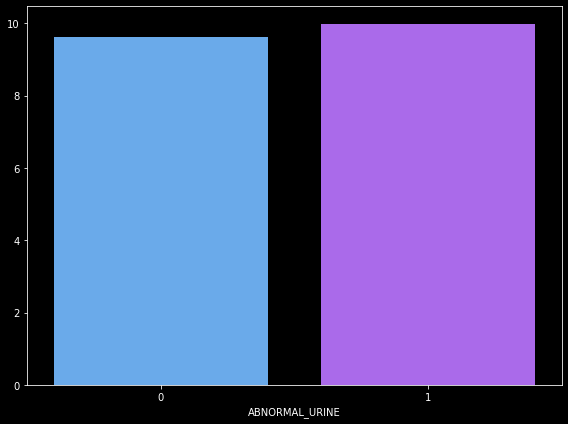

ABNORMAL_FLUID_OTHER


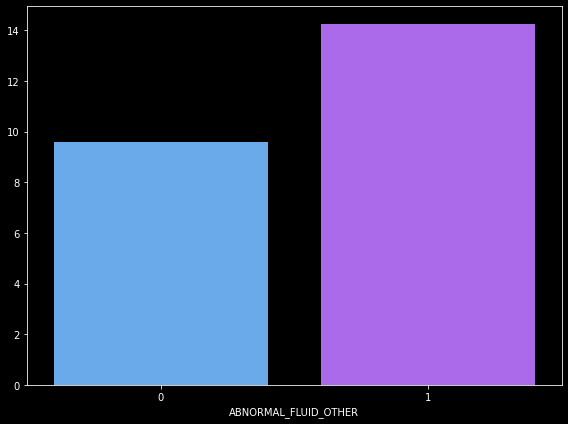

ABNORMAL_RADIOLOGY


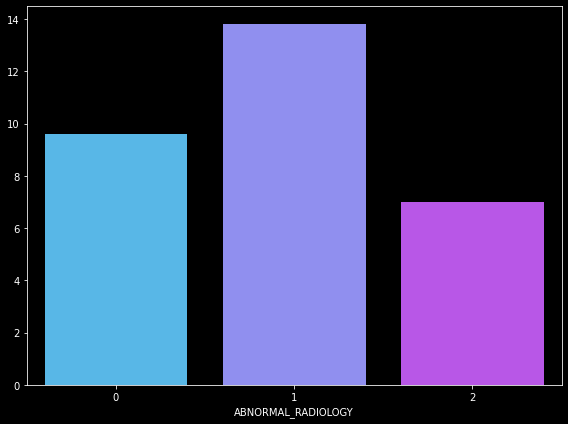

SKULL_FX


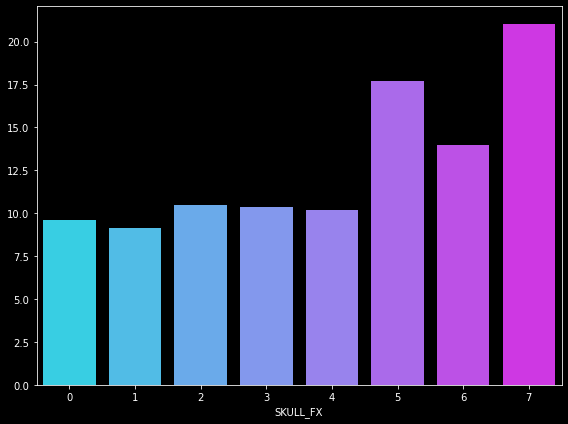

SPINE_FX


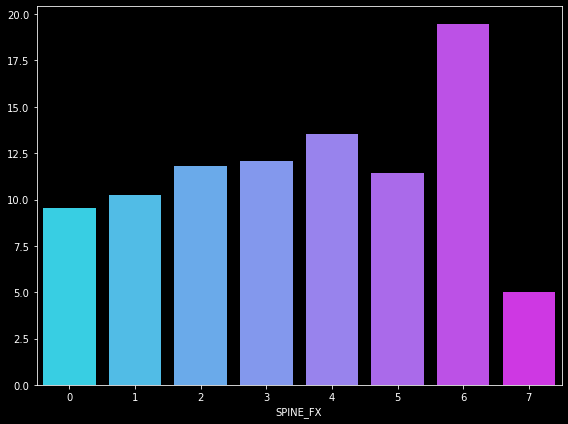

UPPER_EXTREMITY_FX


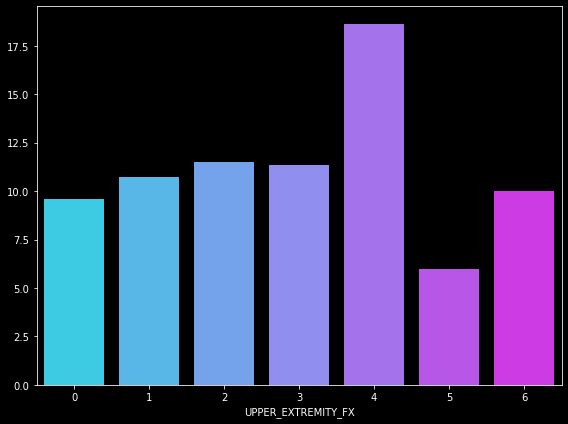

LOWER_EXTREMITY_FX


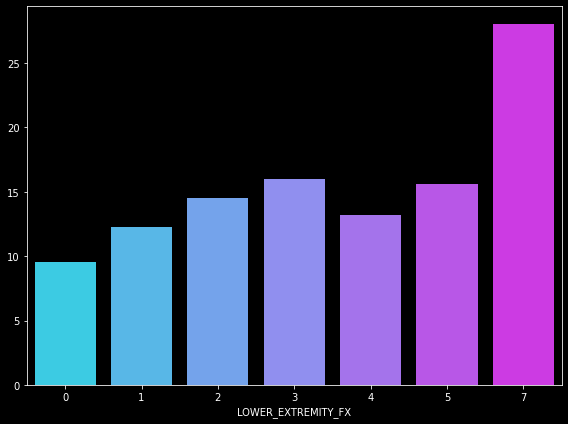

DISLOCATION_SPRAIN


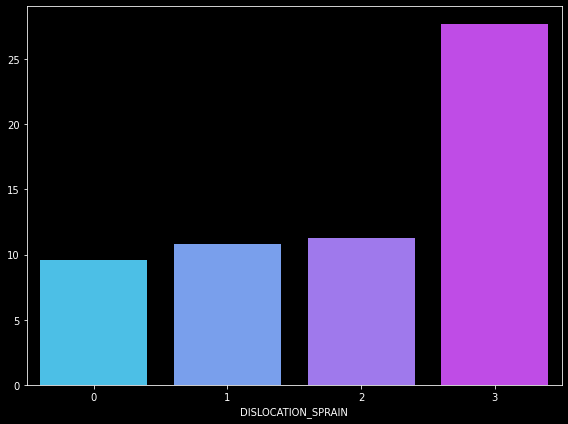

INTRACRANIAL_INJURY


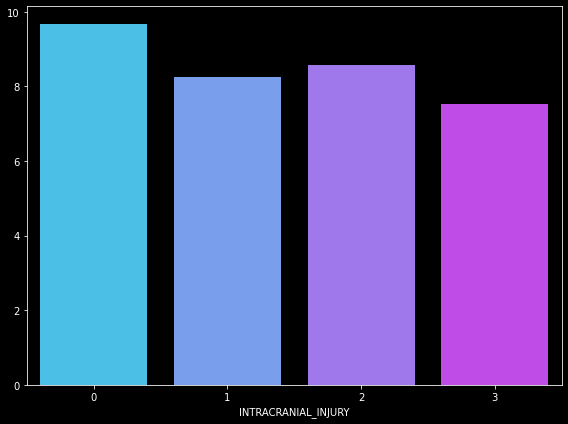

INTERNAL_INJURY


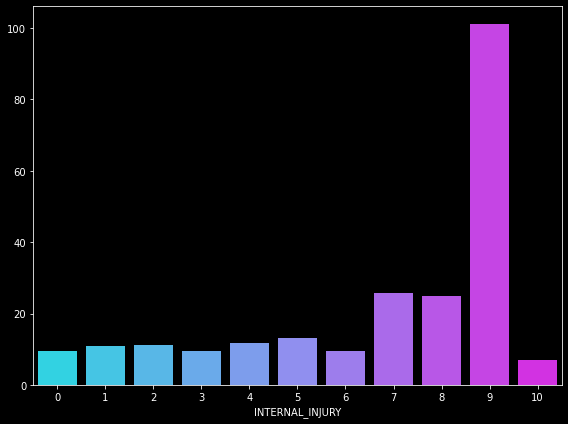

OPEN_INJURY_OTHER


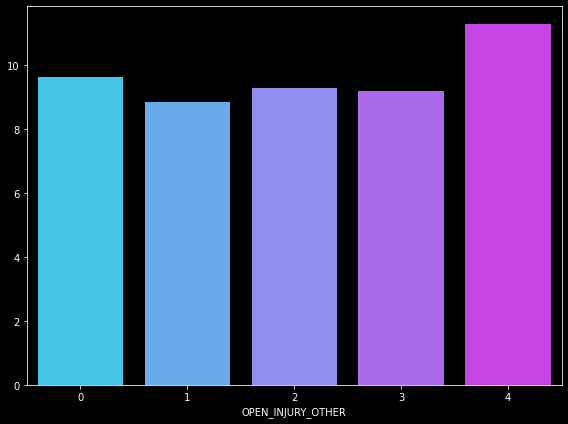

OPEN_EXTREMITY_INJURY


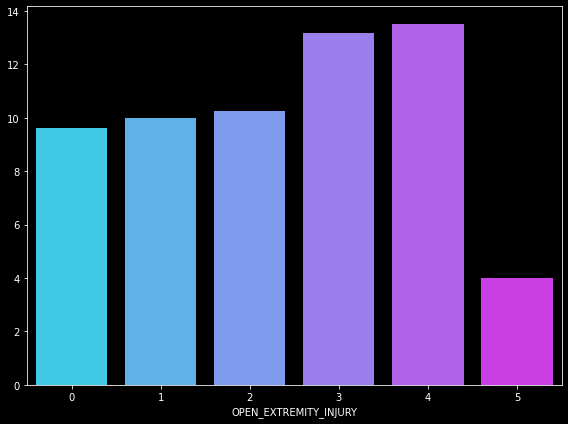

BLOOD_VESSEL_INJURY


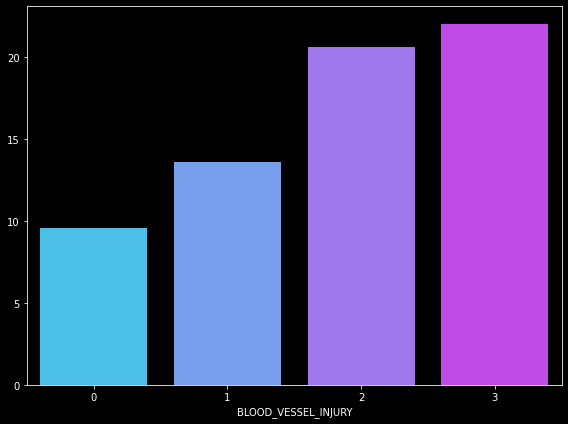

LATE_EFFECTS_DT_INJURY_TOXICITY


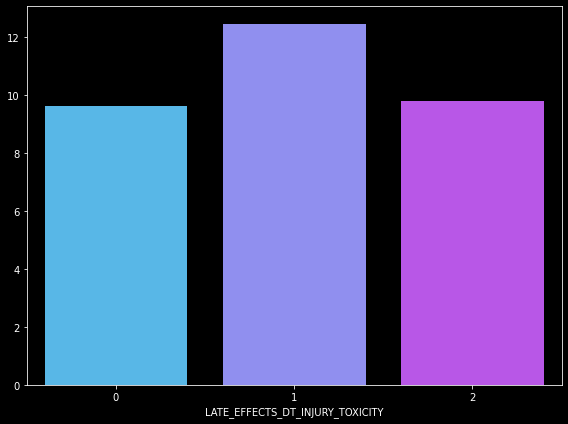

SUPERFICIAL_INJURY_CONTUSION


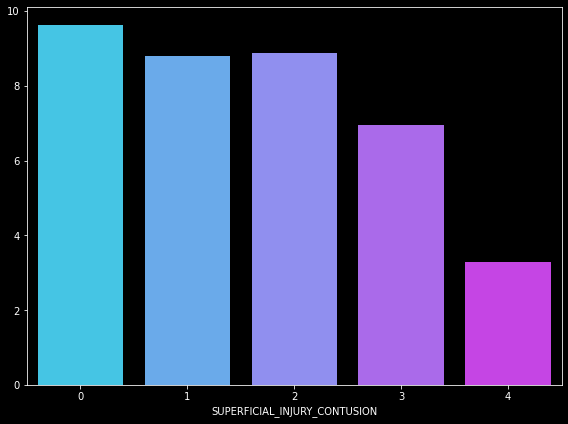

IMPALATION


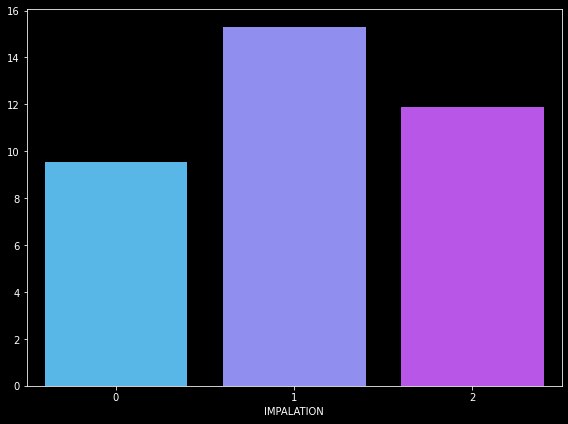

BURN


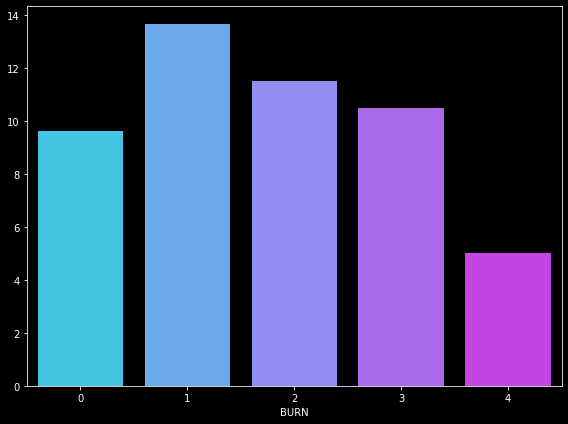

SPINAL_CORD_INJURY


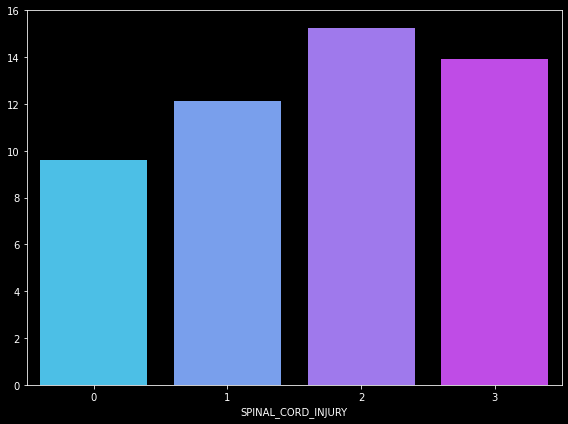

TRAUMA_OTHER


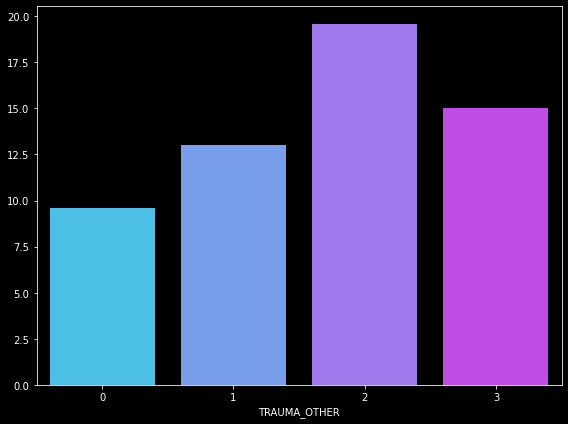

POISONING_TOXICITY


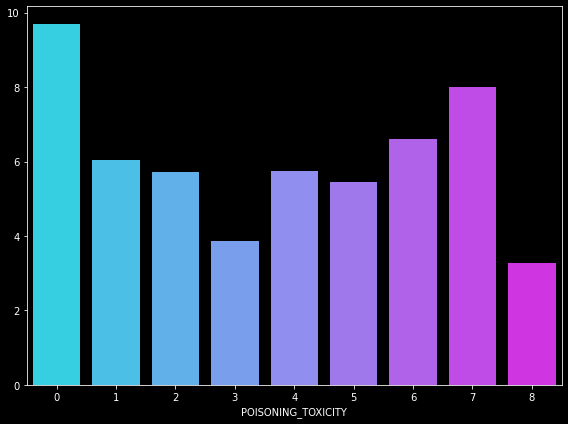

INJURY_DT_EXTERNAL_CAUSE_OTHER


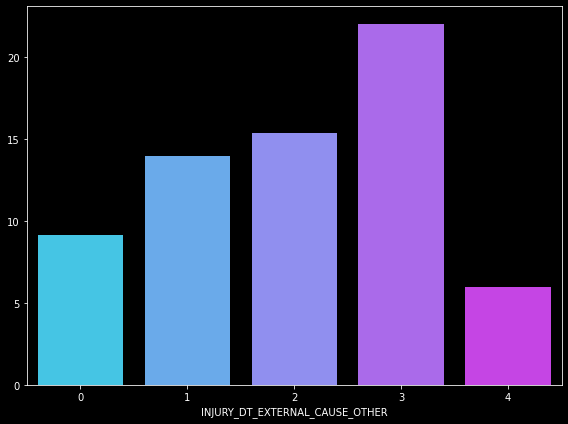

COMPLICATIONS_DT_MEDICAL_CARE


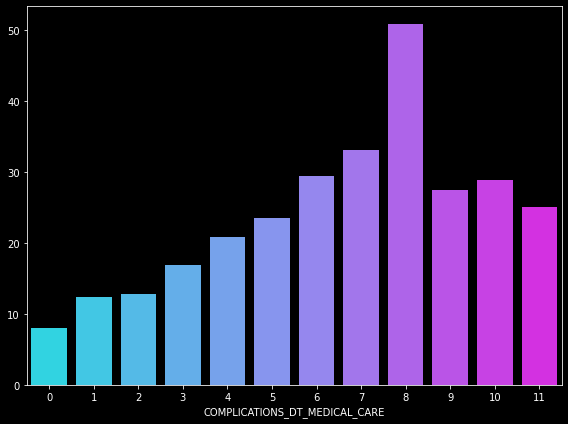

POTENTIAL_HEALTH_HAZARD


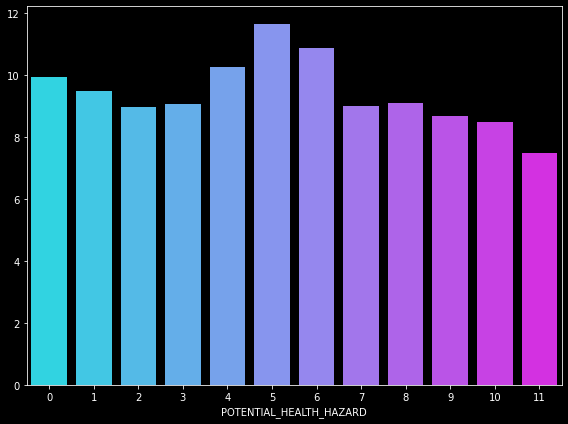

AFTERCARE_PROCEDURE


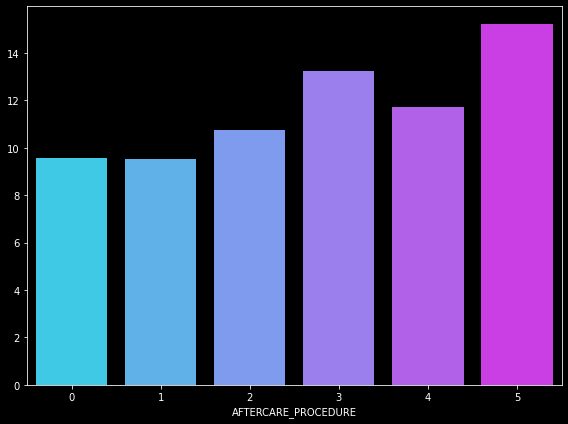

SINGLE_LIVEBORN


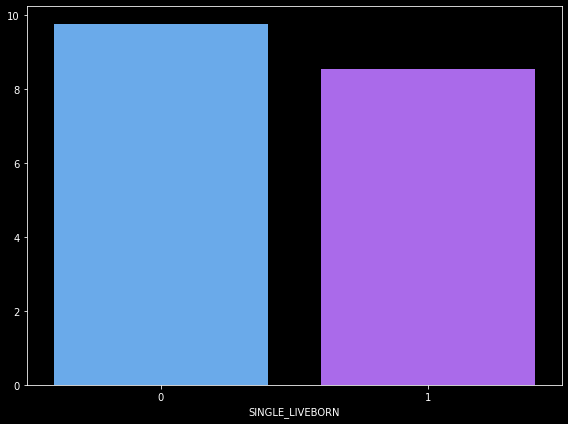

MULTIPLE_LIVEBORN


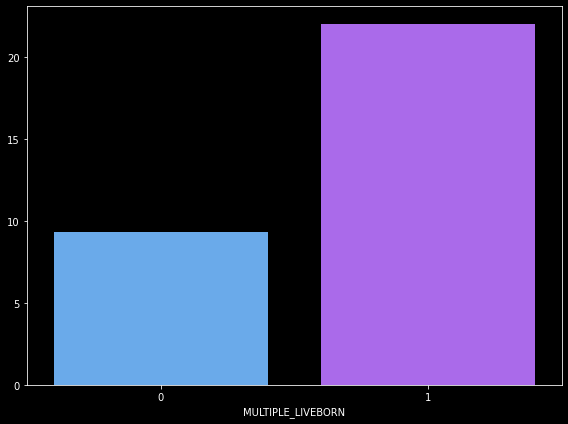

VEHICLE_ACCIDENT


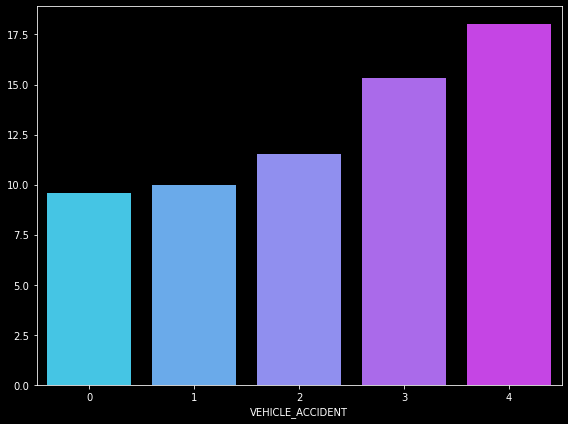

FALL


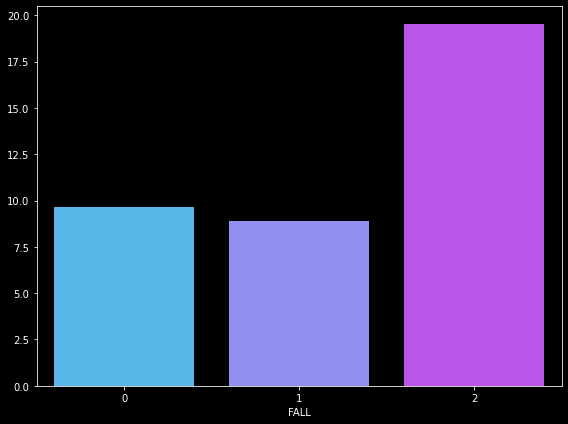

INJURY_OTHER


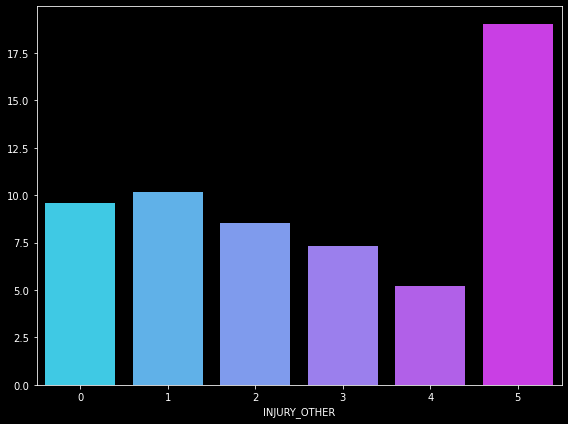

ABNORMAL_FINDING_OTHER


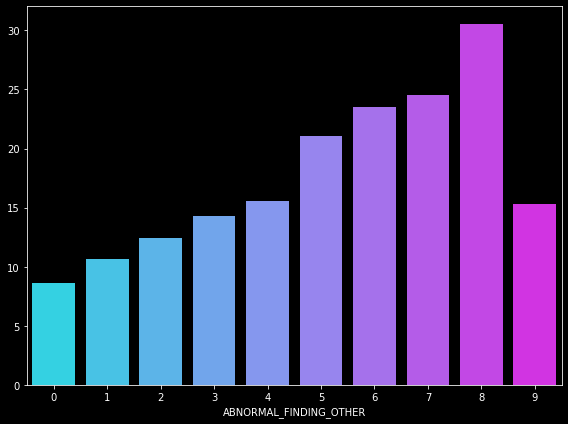

TAG_COMA


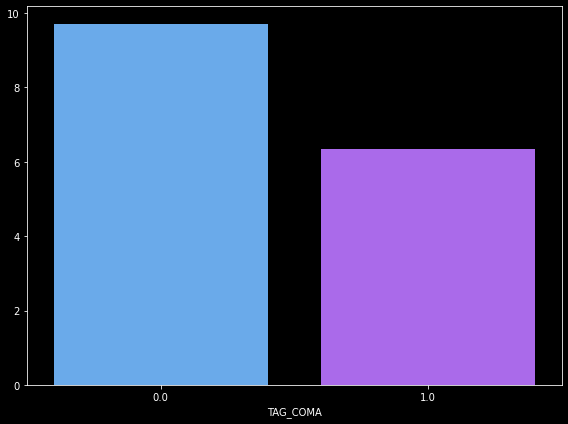

TAG_SEVERE


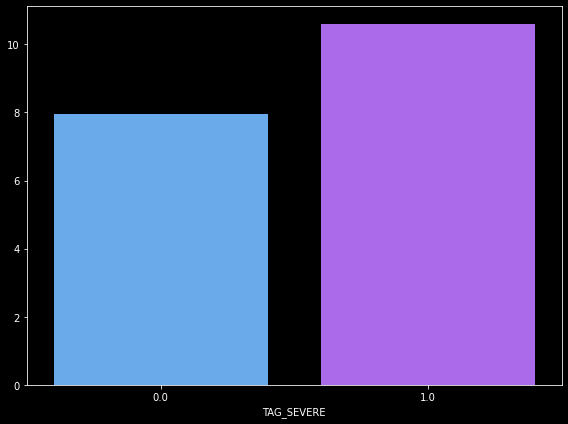

TAG_VENTILATED


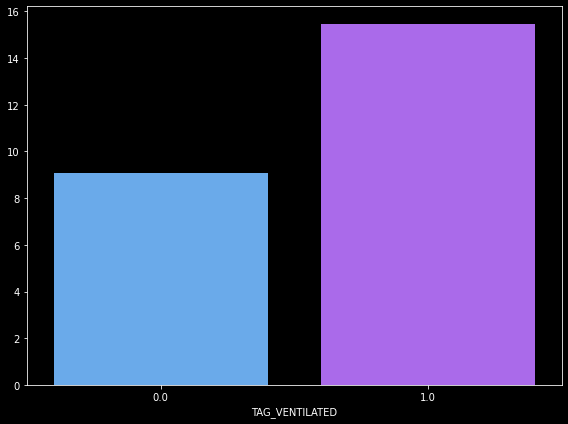

TAG_SX


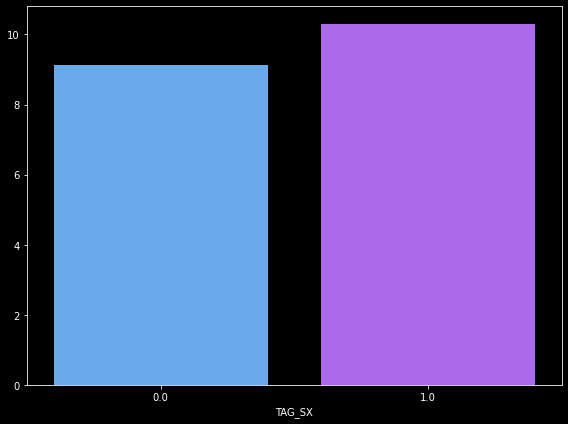

TAG_TRANSPLANT


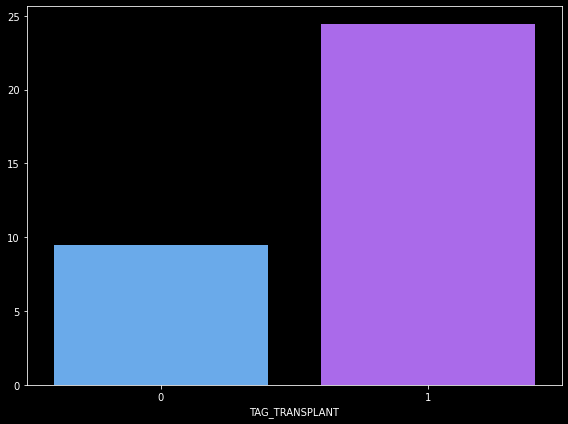

TAG_FAILURE


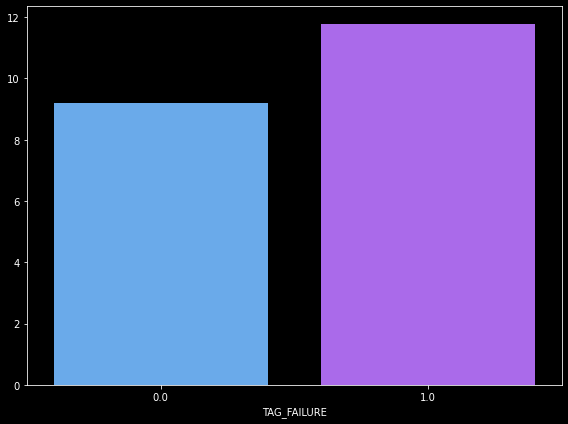

TAG_CANCER


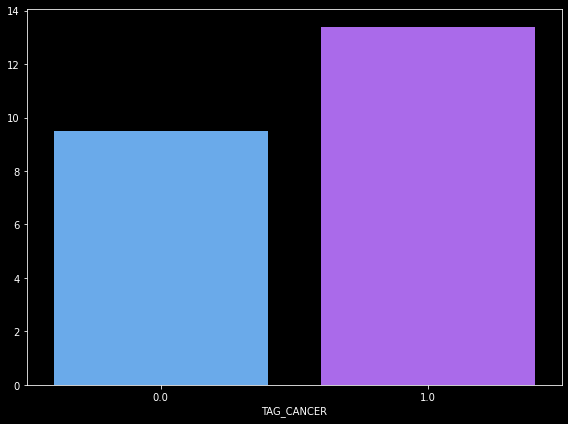

TAG_ID


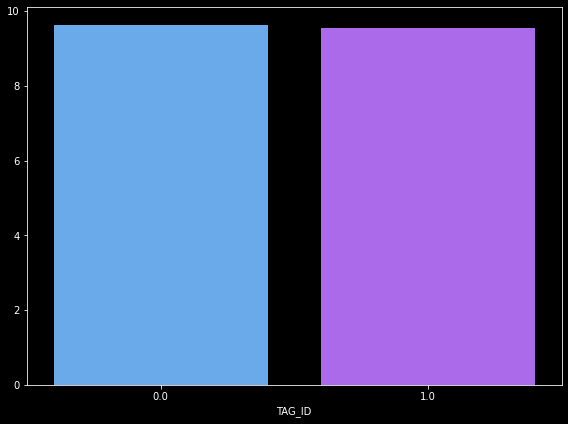

TAG_NEONATE


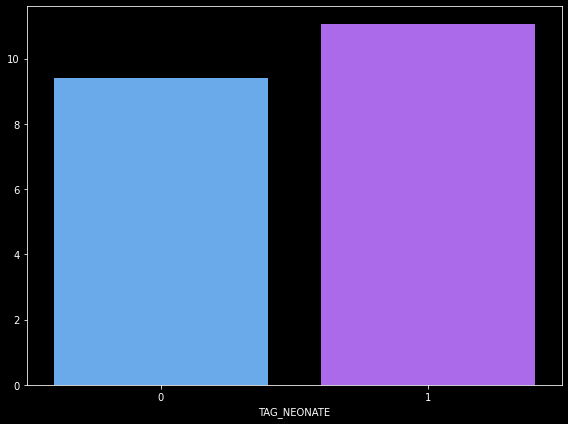

TAG_BREAST


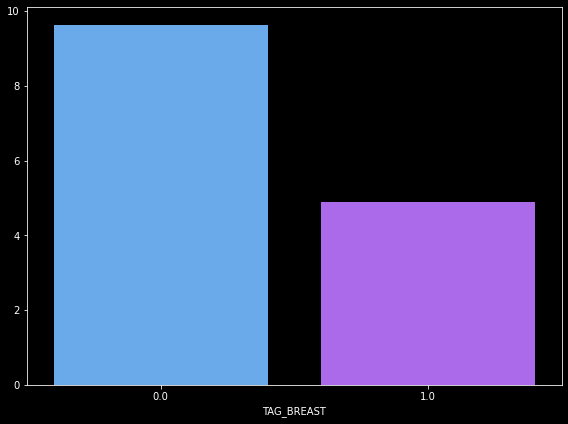

TAG_CARDIAC


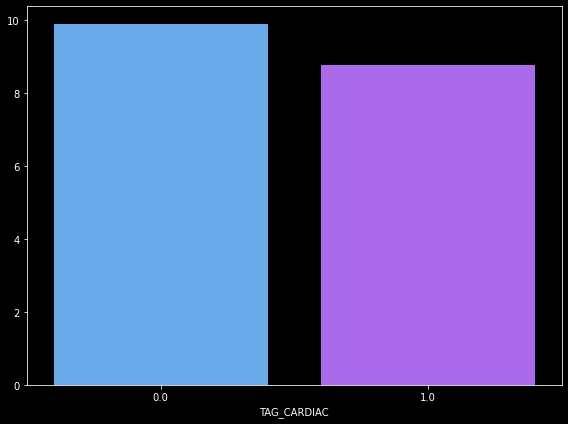

TAG_CONNECTIVE_TISSUE


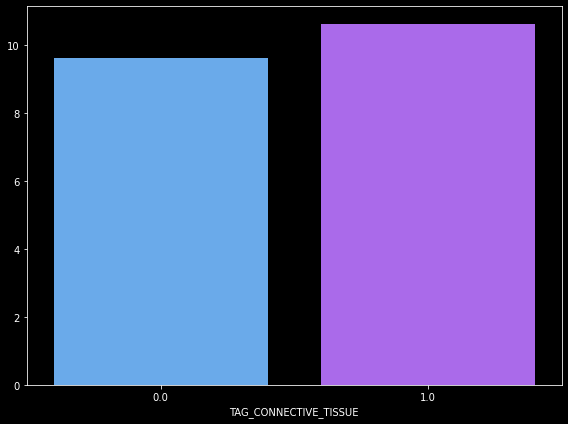

TAG_DM


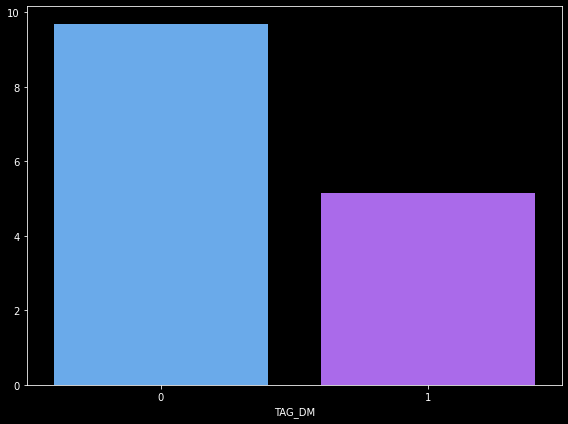

TAG_ELECTROLYTE_DX


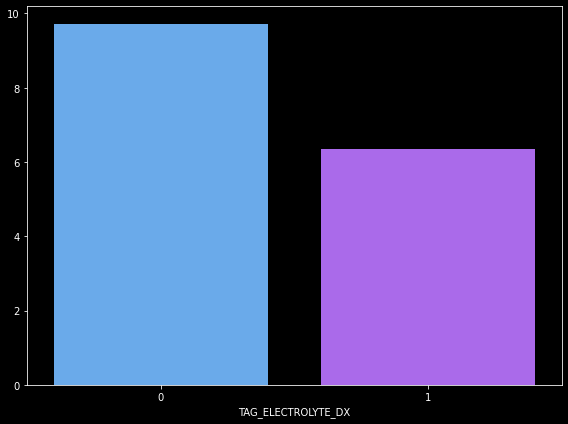

TAG_ENDOCRINE


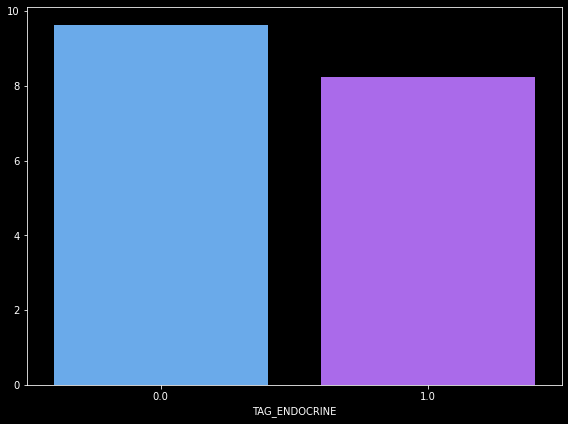

TAG_ENT


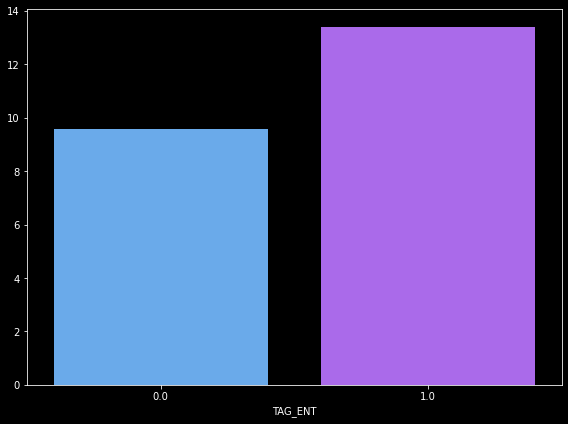

TAG_GI


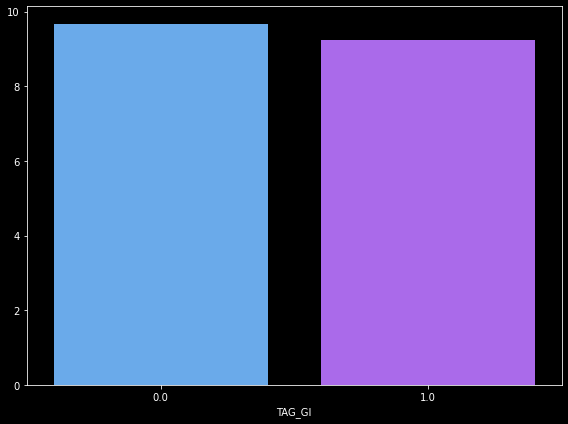

TAG_GU


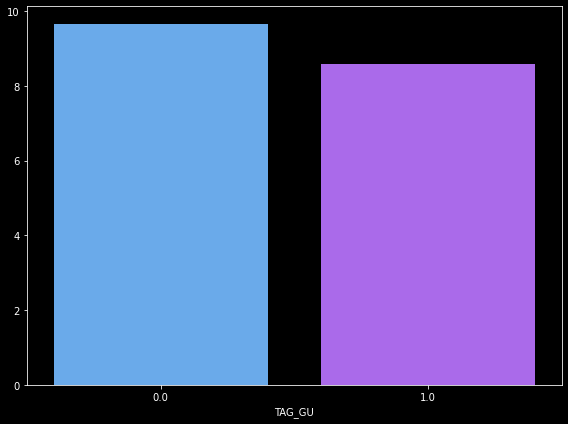

TAG_HEME


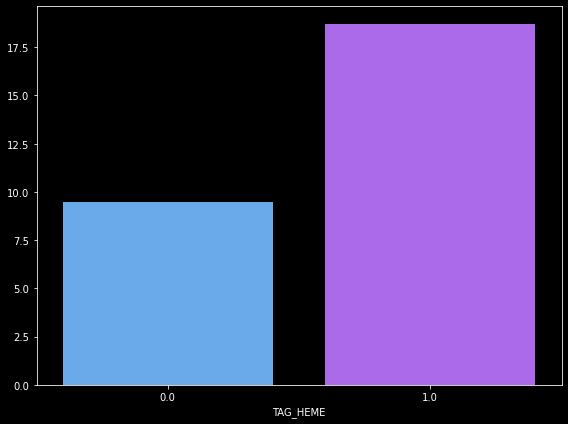

TAG_HIV


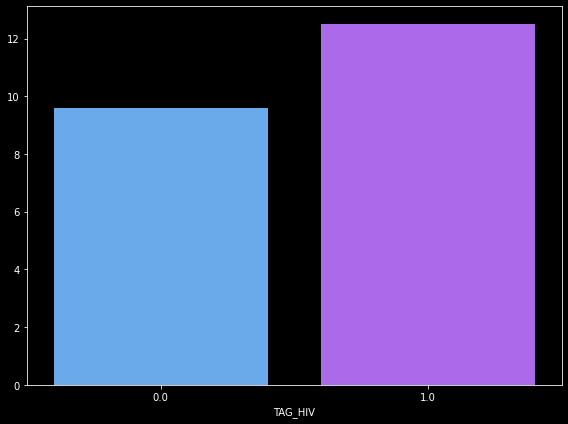

TAG_HTN


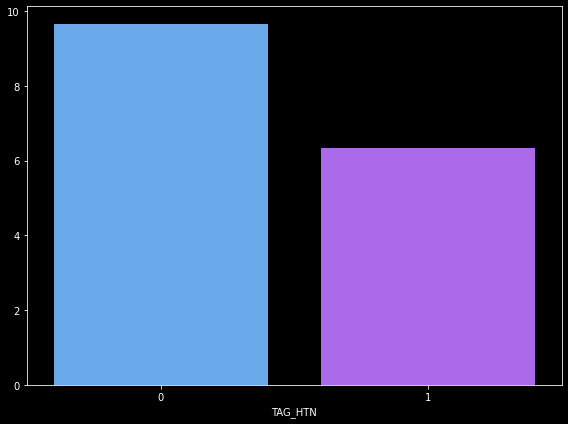

TAG_LIVER


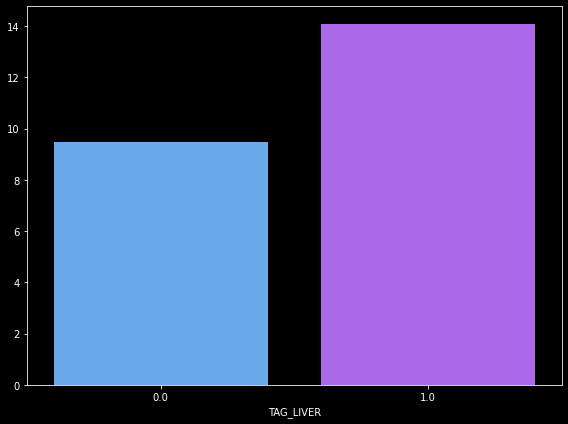

TAG_MI


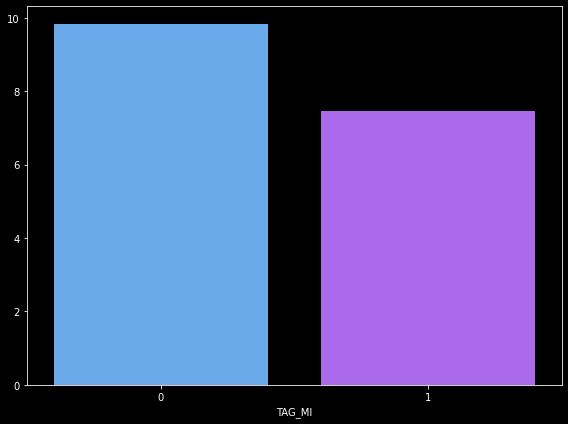

TAG_NEURO


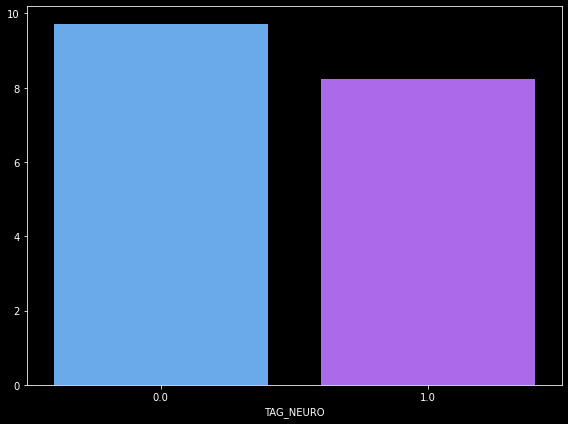

TAG_OB


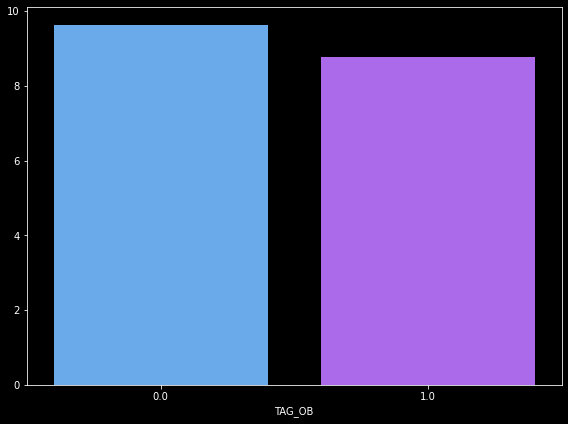

TAG_OD


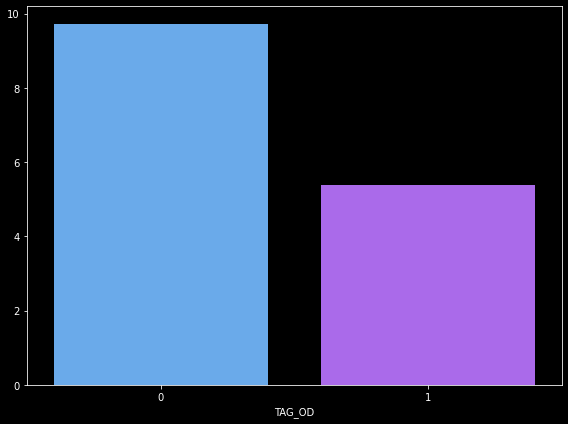

TAG_ORTHO


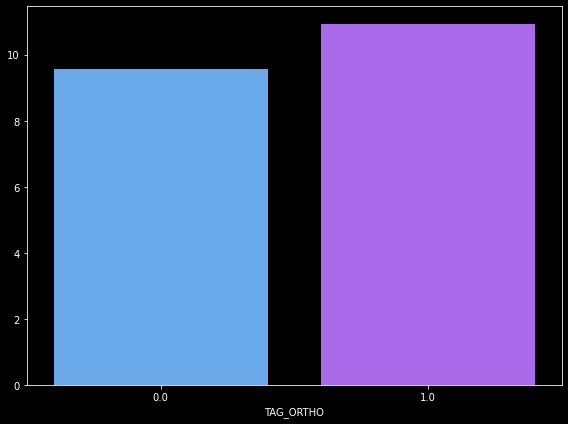

TAG_PSYCH


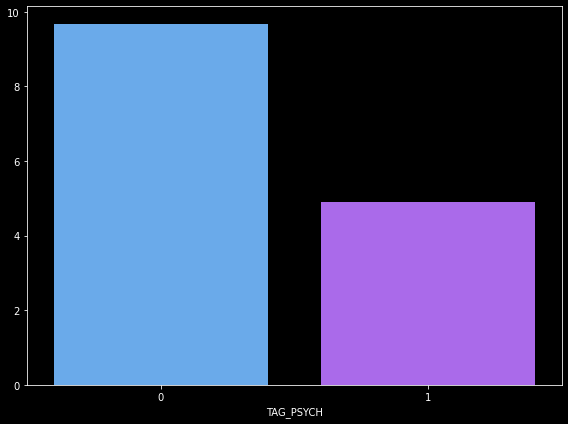

TAG_RENAL


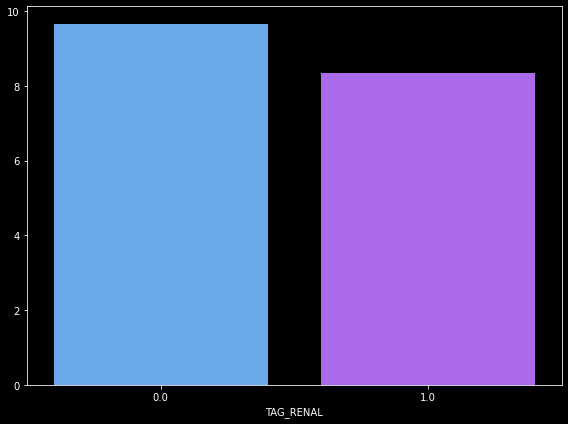

TAG_RESPIRATORY


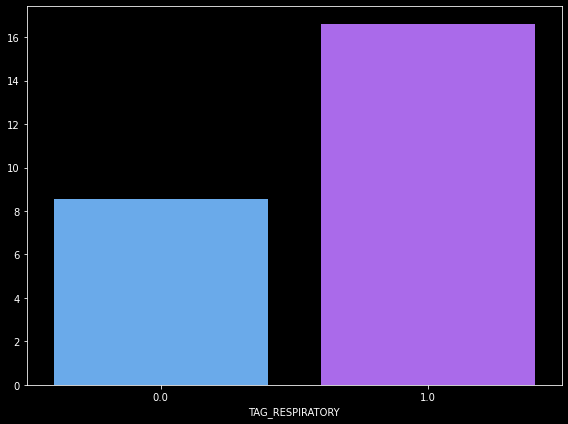

TAG_SEPSIS


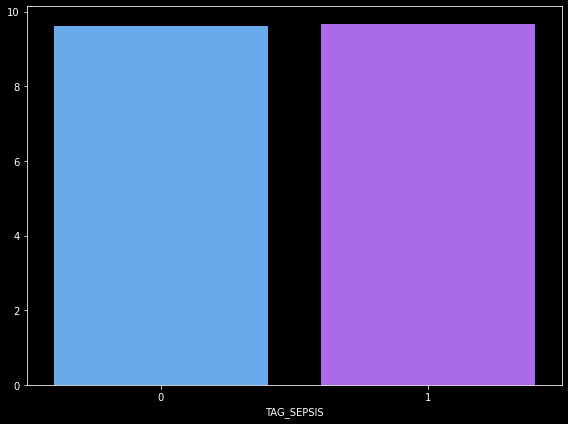

TAG_SKIN_SOFT_TISSUE


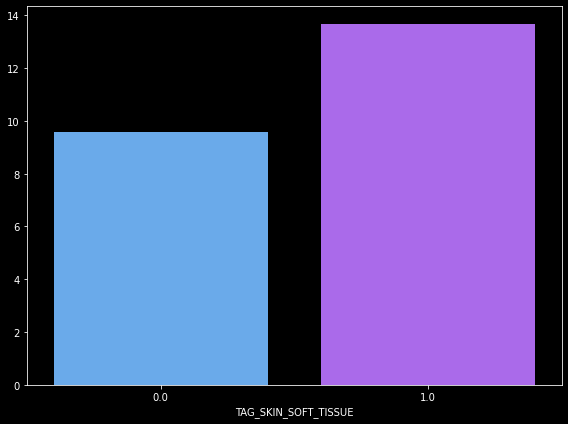

TAG_SKIN_SOFT_TISSUESKIN_SOFT_TISSUE


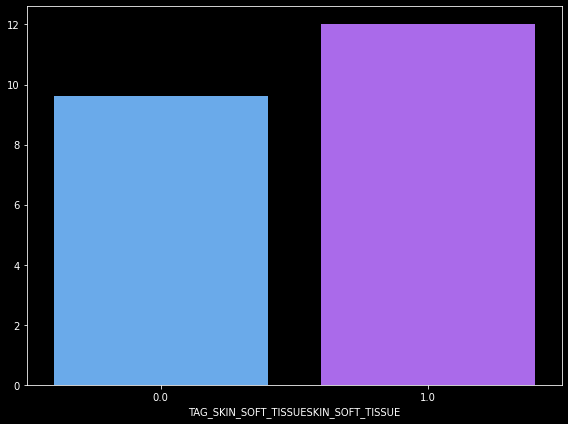

TAG_STROKE


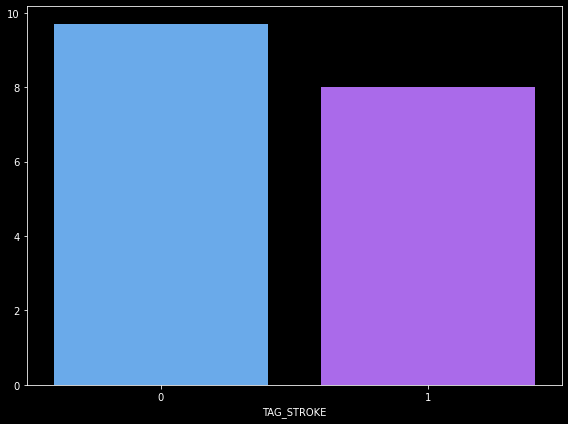

TAG_TRAUMA


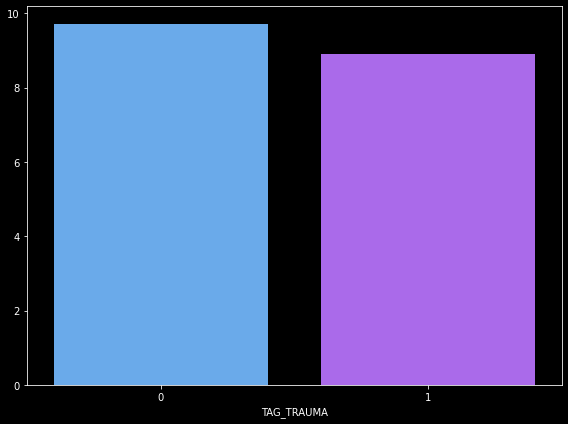

TAG_VASCULAR


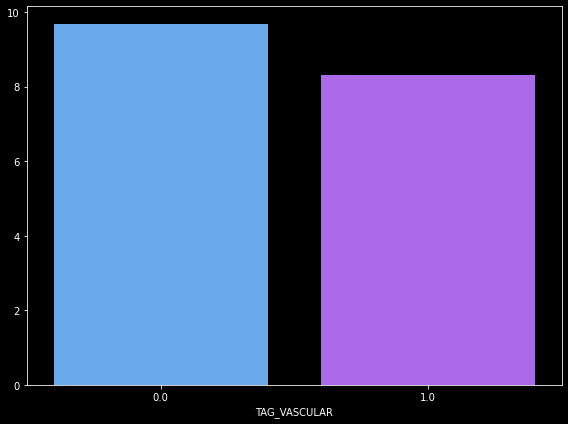

TAG_HEAD_BLEED


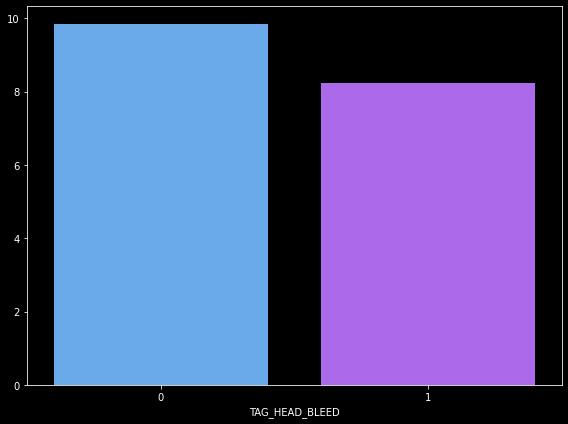

TAG_SEIZURE


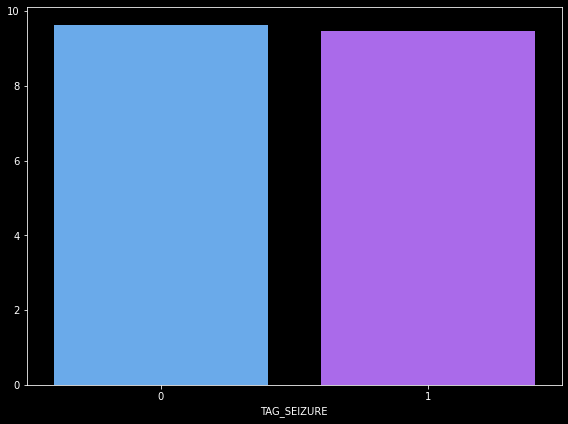

TAG_AMS


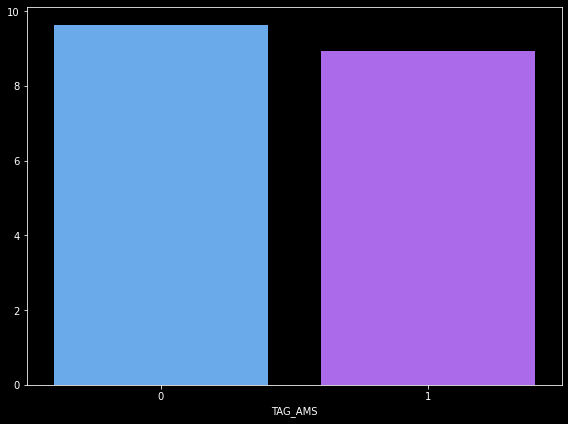

TAG_CAD


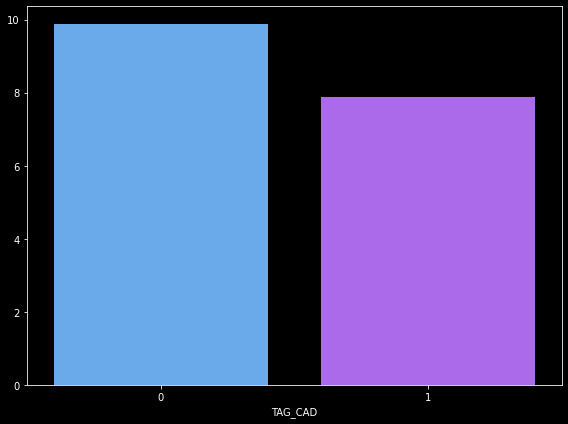

TAG_HEART_FAILURE


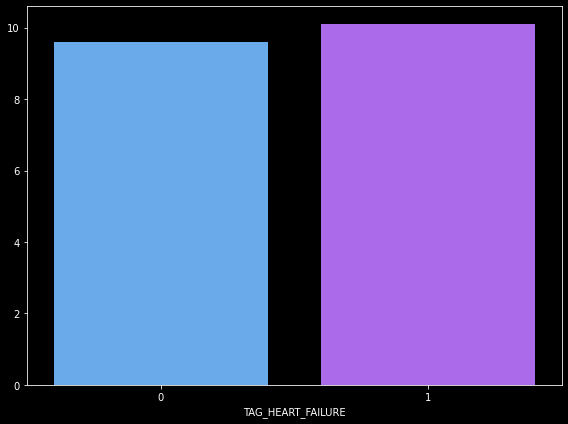

TAG_AORTIC_ANEURYSM


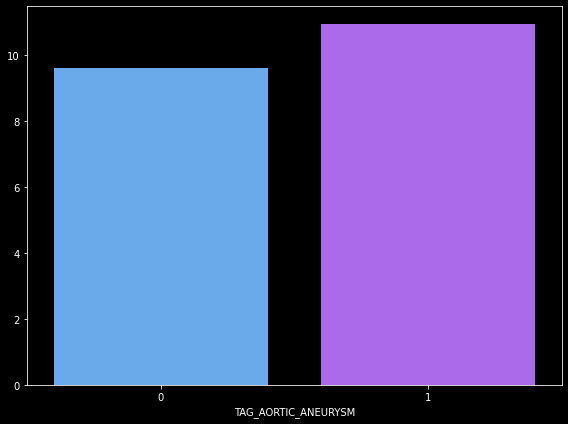

TAG_VALVE_DX


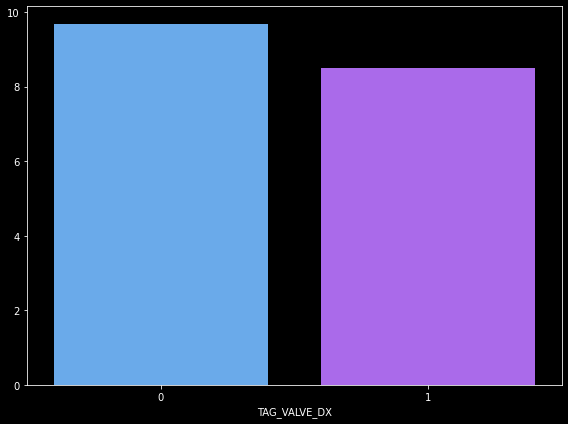

TAG_CARDIAC_ARREST


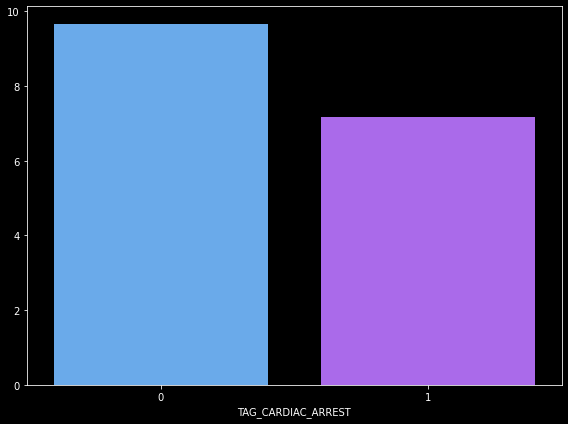

TAG_A_FIB


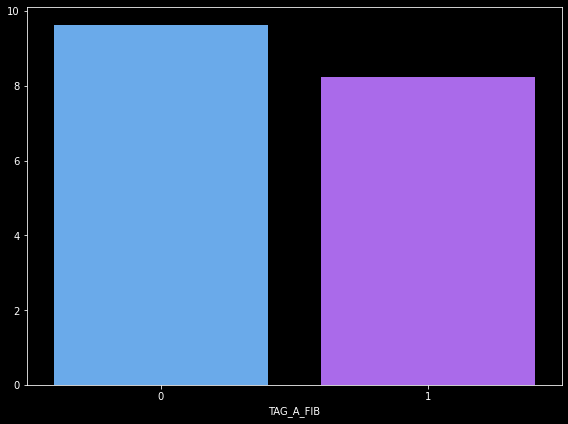

TAG_HYPOTENSION


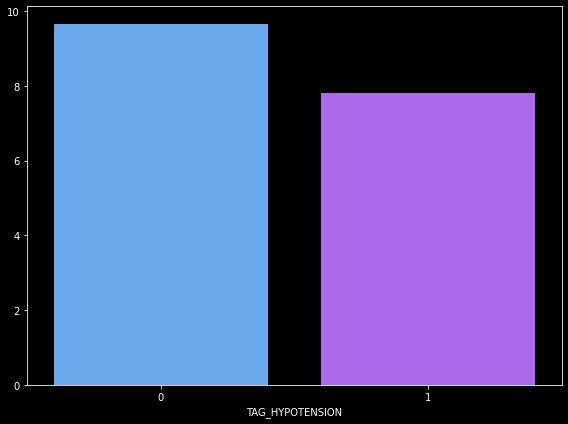

TAG_PERICARDIAL EFFUSION


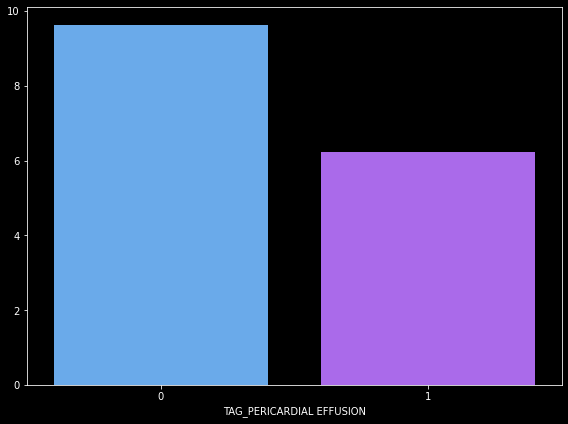

TAG_HEART_BLOCK


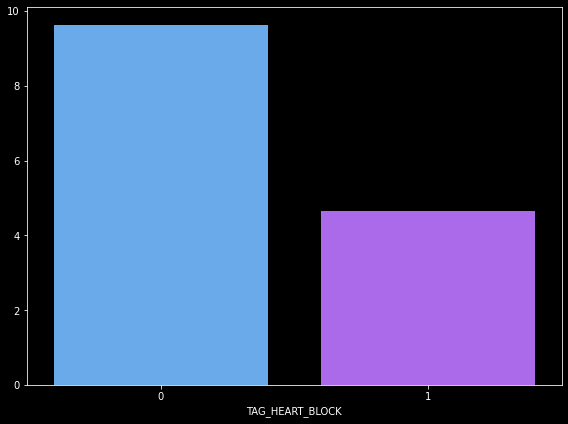

TAG_TACHYCARDIA


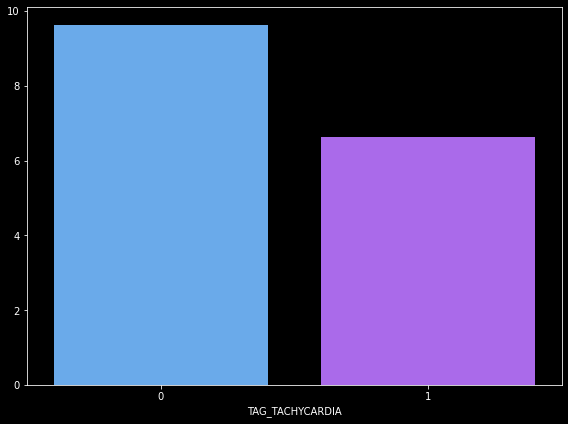

TAG_DYSRHYTHMIA OTHER


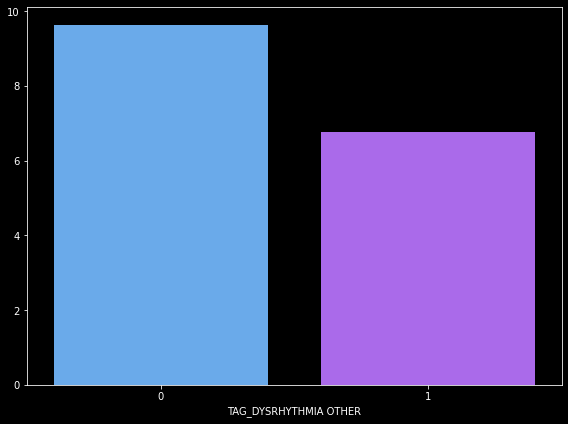

TAG_ENDOCARDITIS


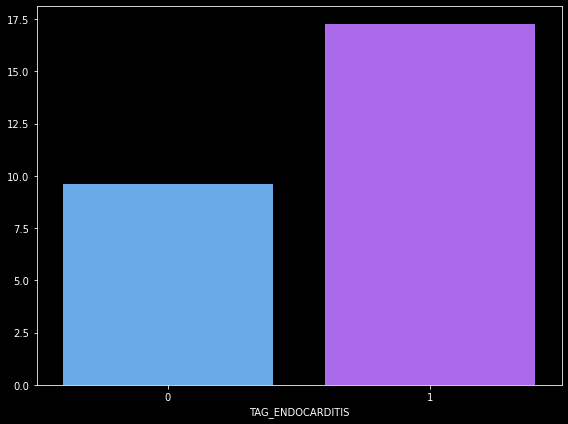

TAG_VASCULAR_OTHER


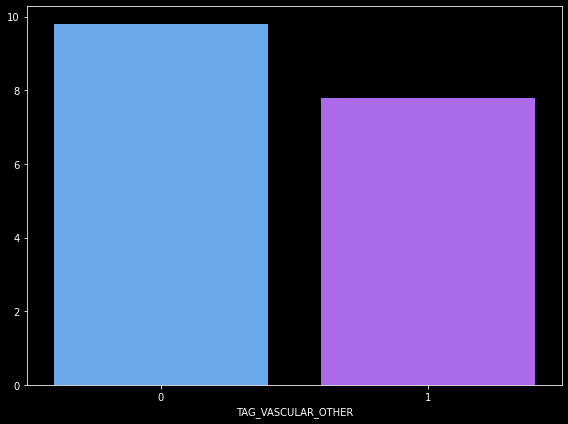

TAG_RESPIRATORY_INFECTION


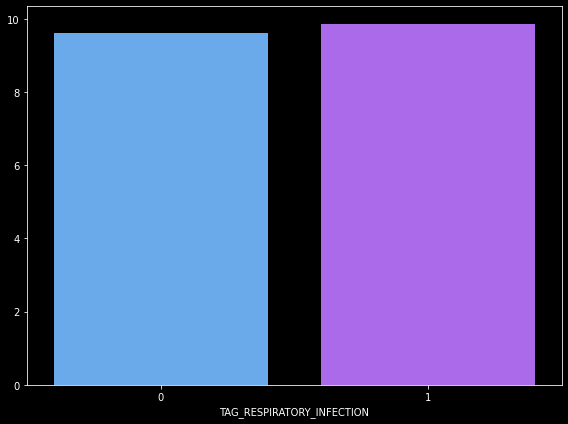

TAG_PE


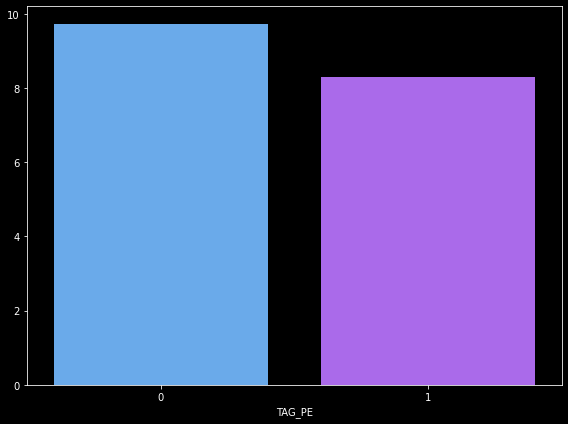

TAG_RESTRICTIVE_LUNG_DX


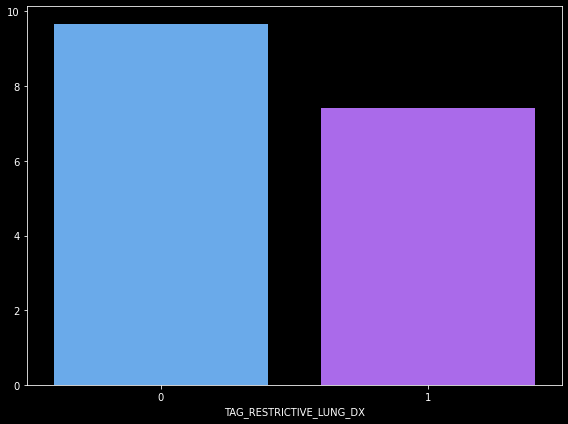

TAG_DYSPNEA


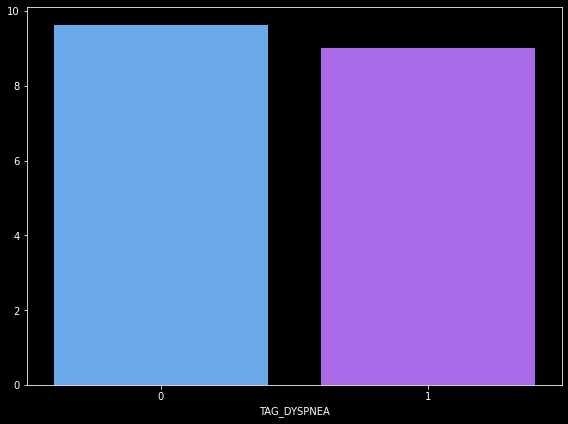

TAG_RESPIRATORY_FAILURE


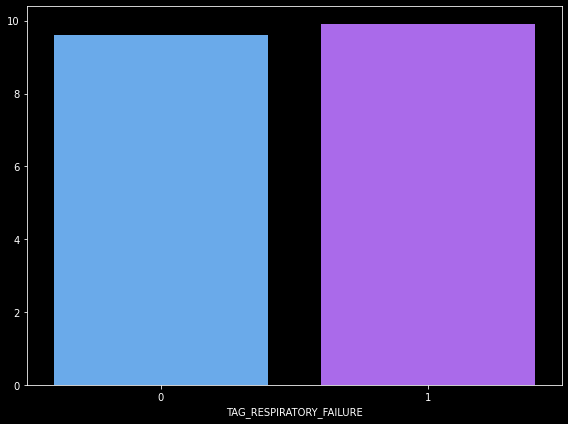

TAG_PULMONARY_EDEMA


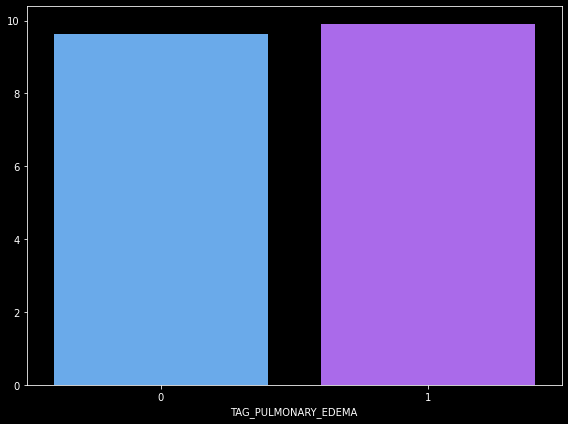

TAG_HEMO_PNEUMOTHORAX


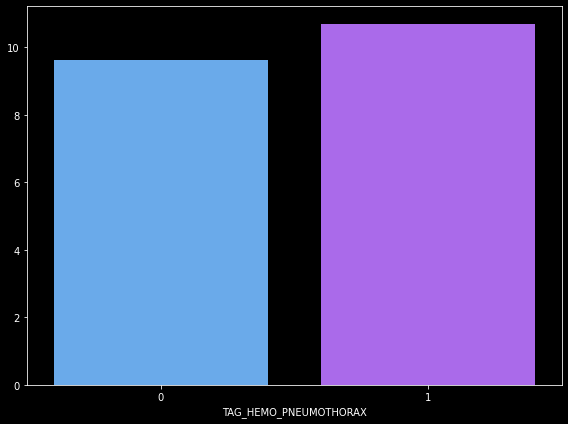

TAG_GIB


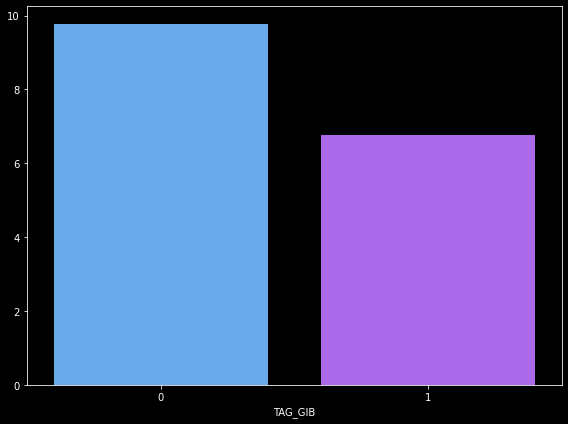

TAG_GI_OBSTRUCTION


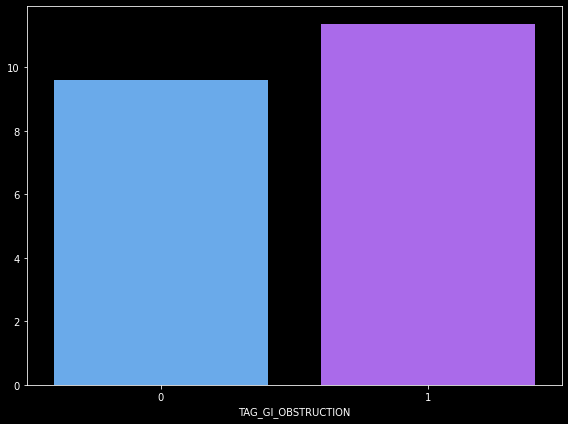

TAG_GI_INFLAMMATION


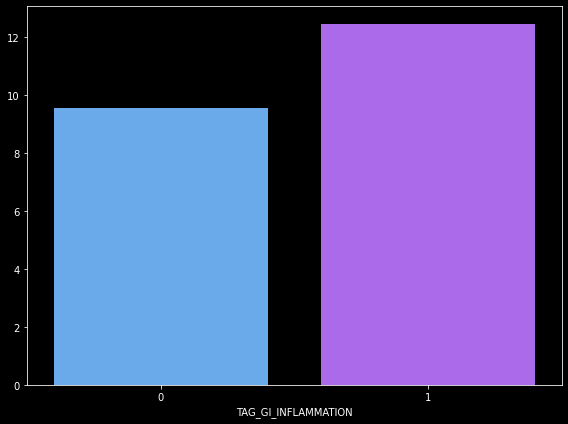

TAG_GI_OTHER


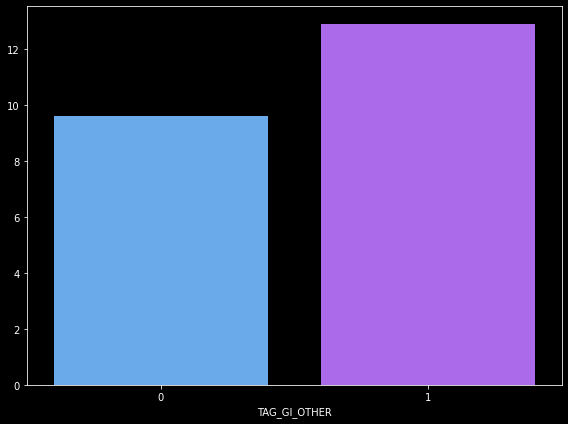

TAG_LIVER_FAILURE


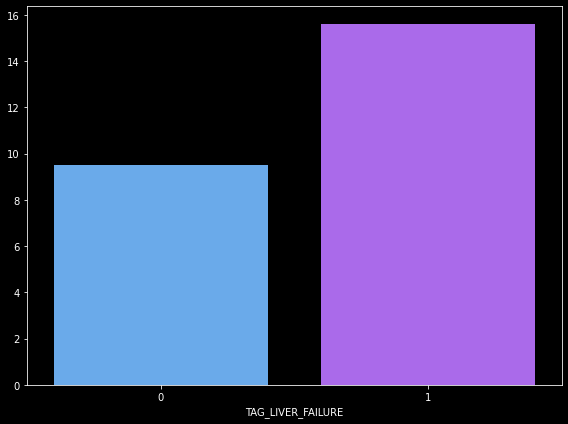

TAG_LIVER_OTHER


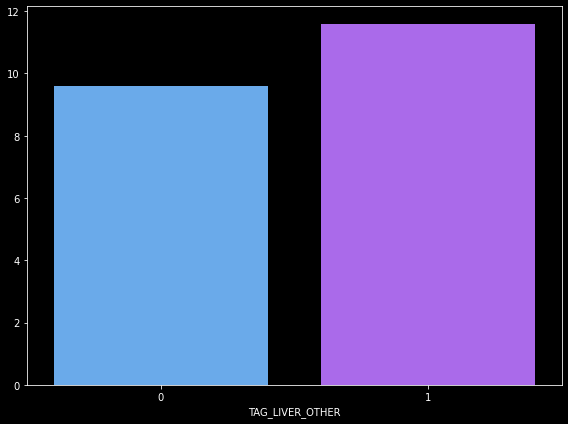

TAG_RENAL_FAILURE


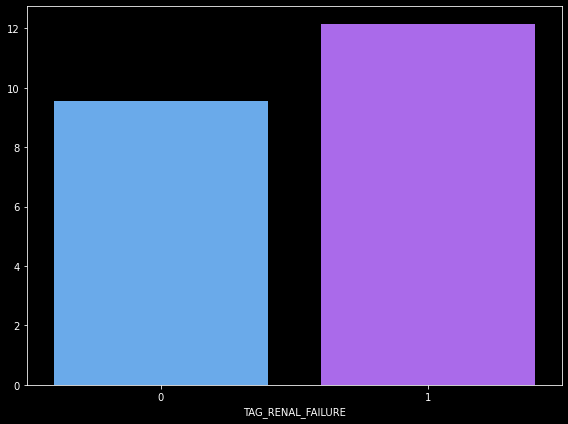

TAG_UTI


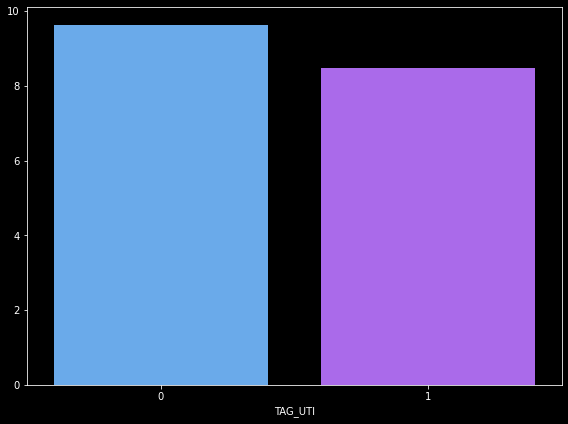

TAG_RENAL_OTHER


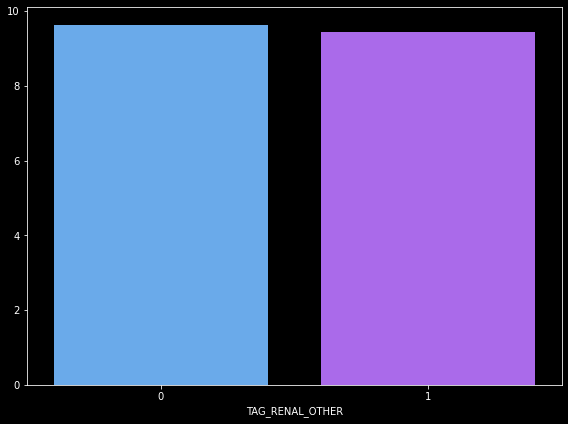

TAG_ANEMIA


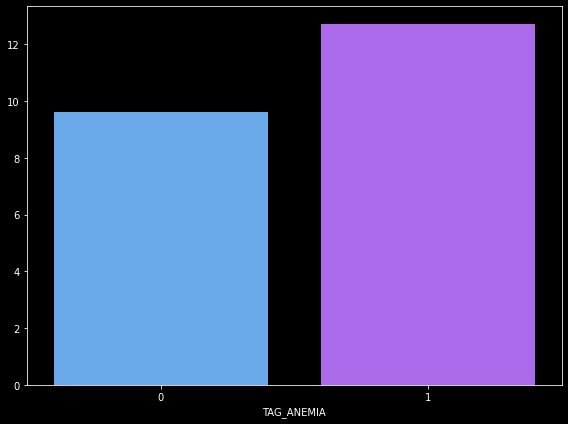

TAG_INFECTION_OTHER


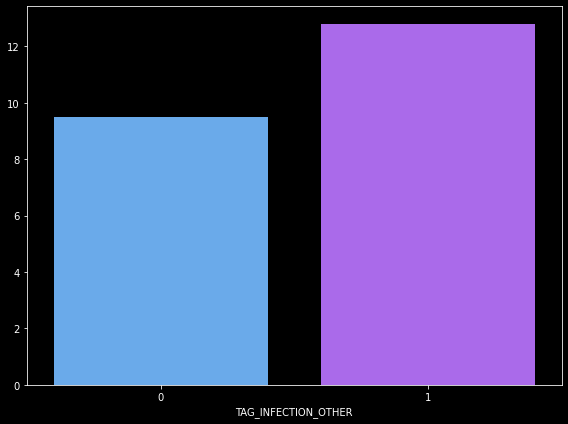

TAG_ALLERGIC_REACTION


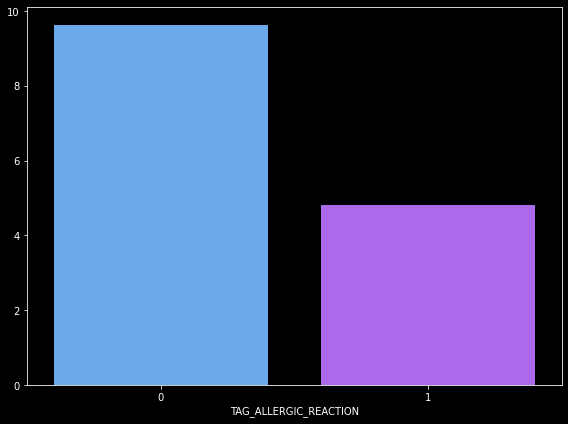

TAG_CLOT


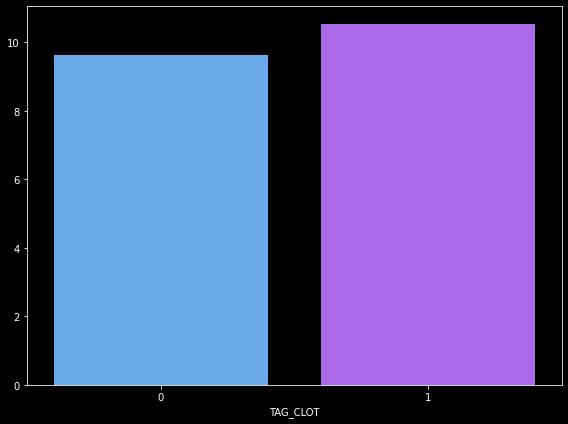

TAG_BLEEDING_DX


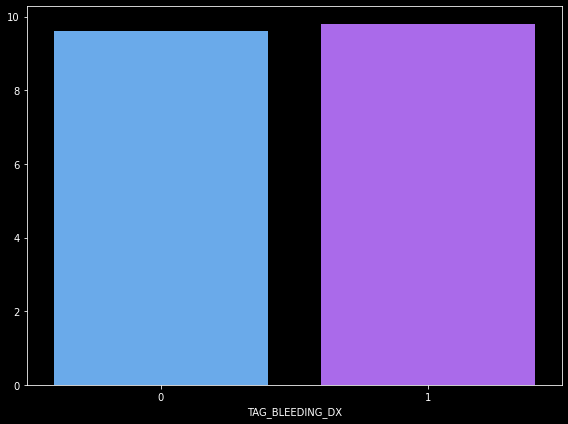

TAG_DKA


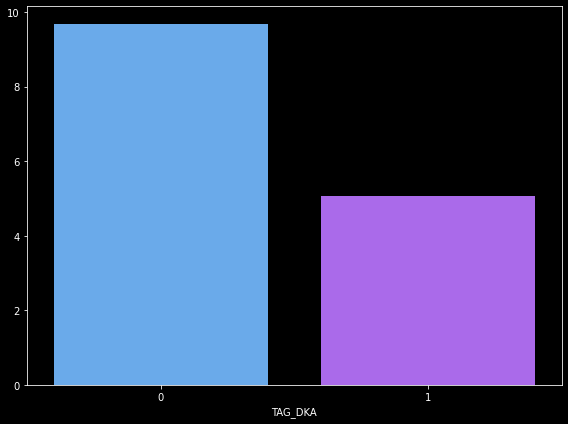

TAG_CONSTITUTION


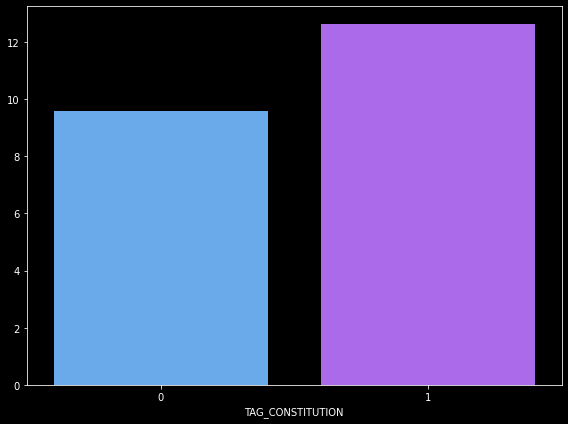

TAG_FRACTURE


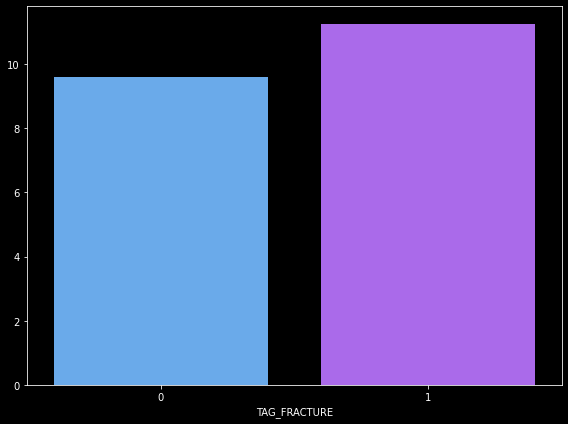

TAG_HEAD_TRAUMA


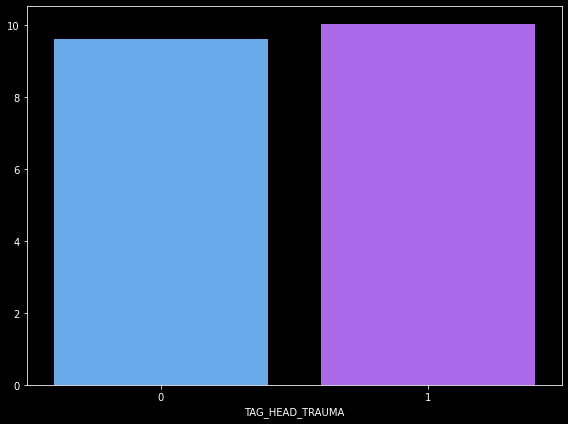

TAG_WITHDRAWAL


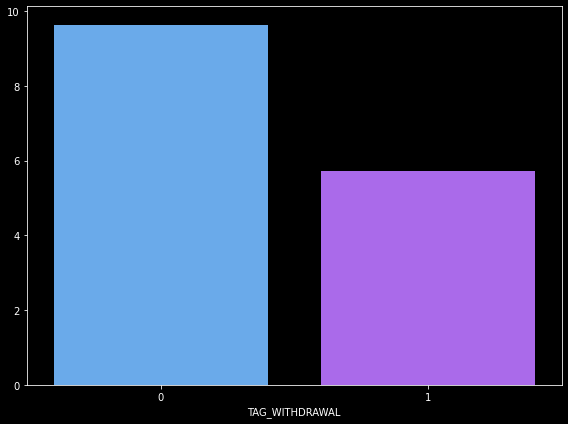

TAG_POOR_PERFUSION


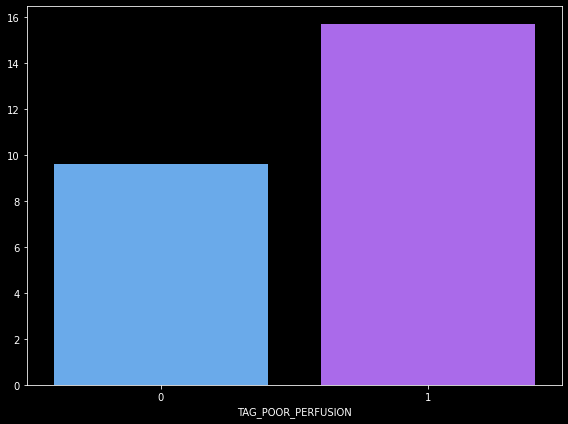

TAG_SPINE_DX


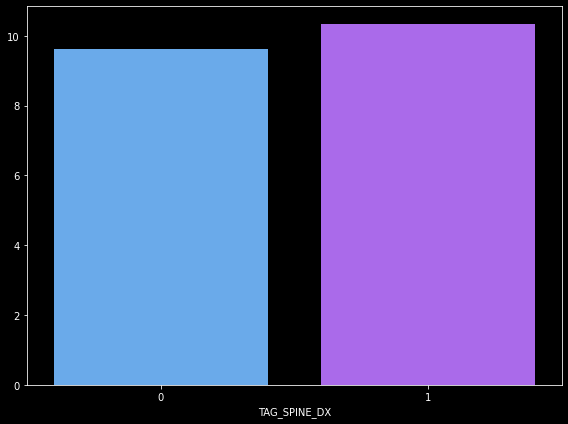

TAG_GI_CANCER


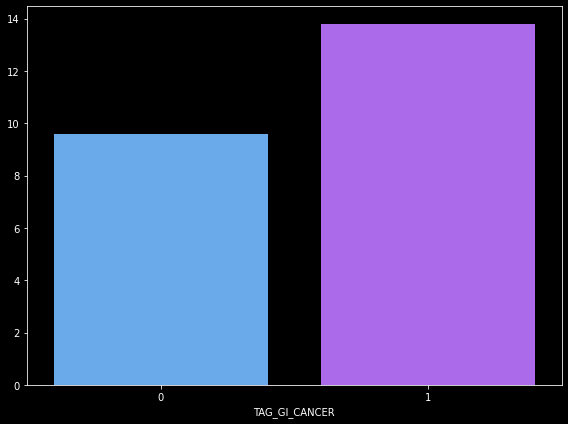

TAG_METASTATIC_CANCER


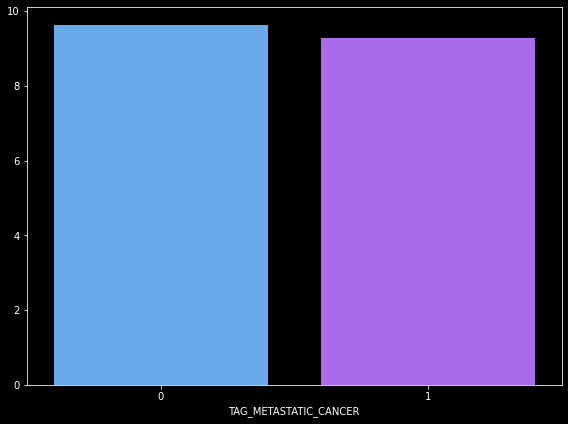

TAG_NEURO_CANCER


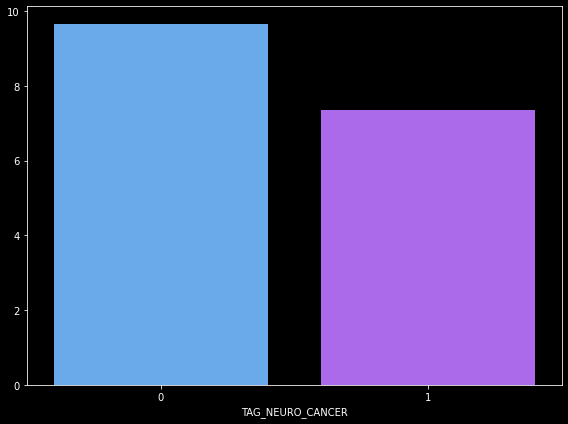

TAG_RESPIRATORY_CANCER


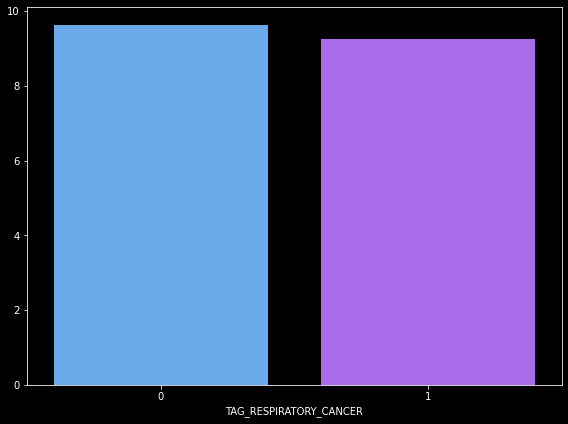

TAG_PANCREATIC_CANCER


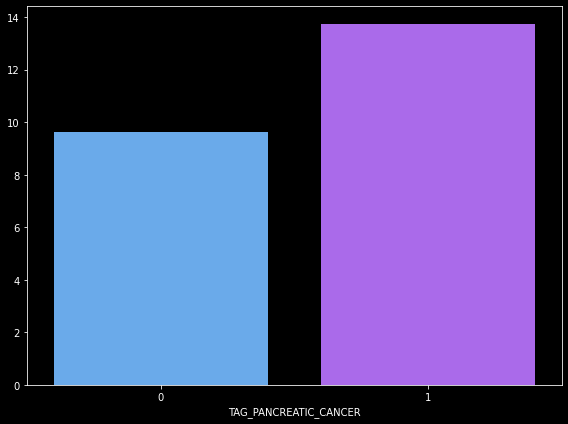

TAG_HEME_CANCER


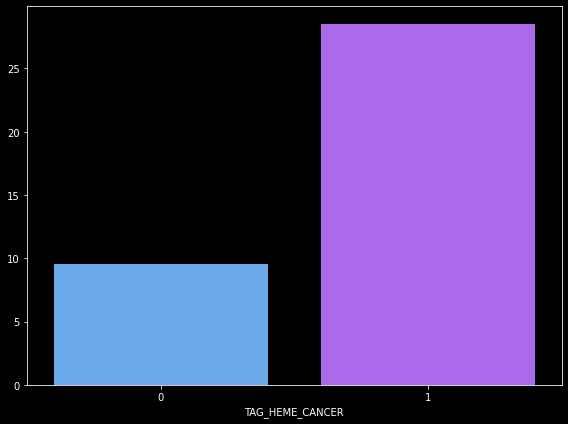

TAG_BLADDER/RENAL_CANCER


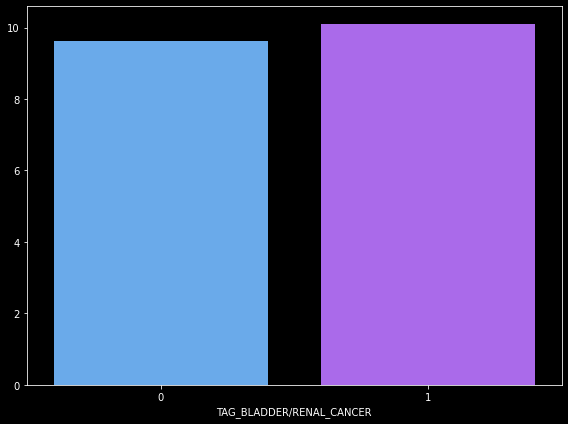

TAG_LIVER_CANCER


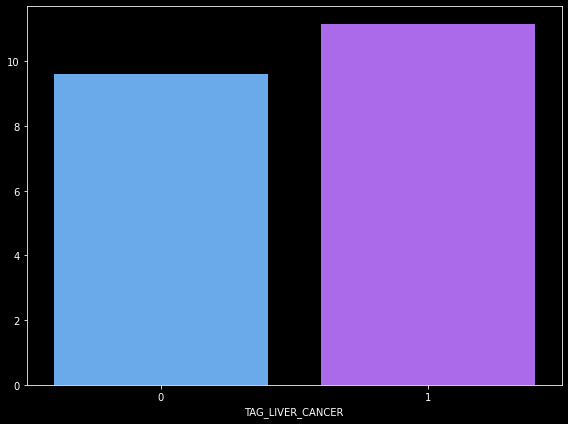

TAG_BREAST_CANCER


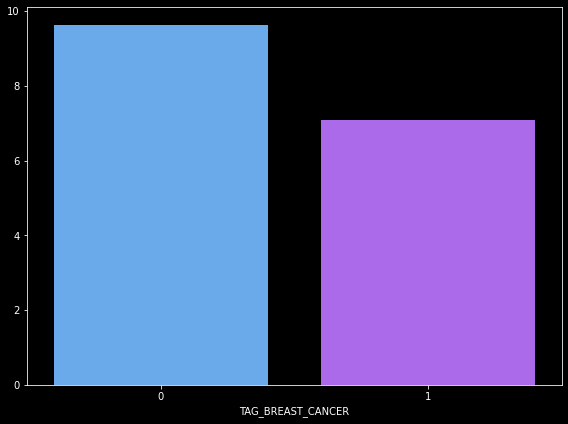

TAG_FEMALE_REPRO_CANCER


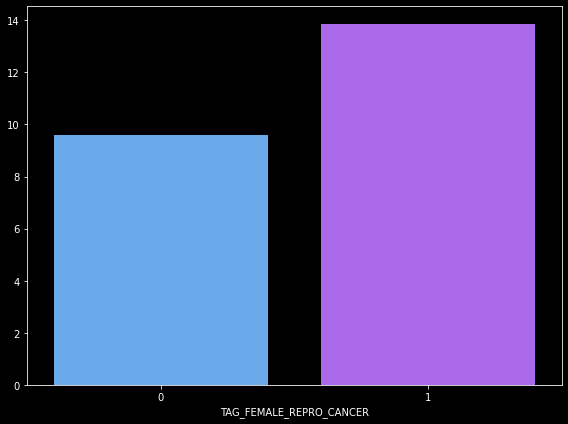

TAG_OTHER_CANCER


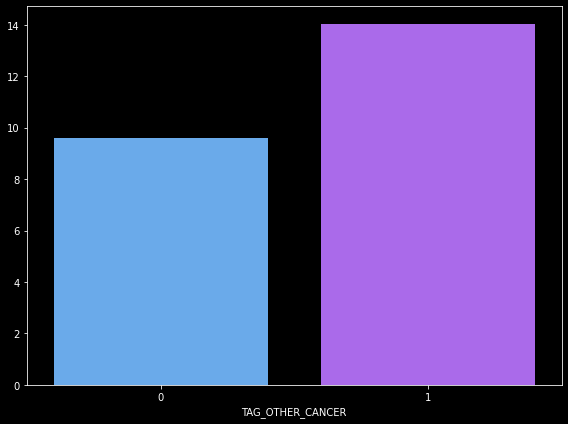

TAG_PAIN


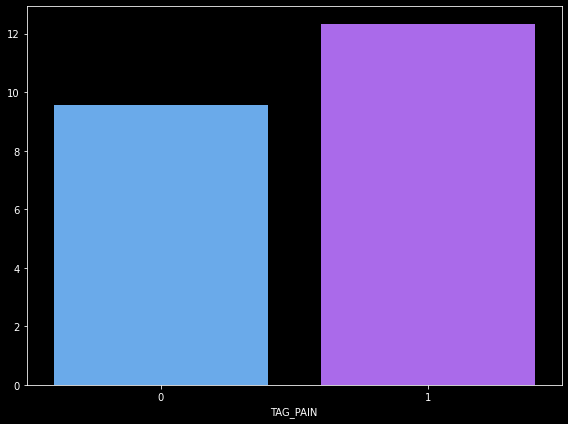

TAG_HERNIA


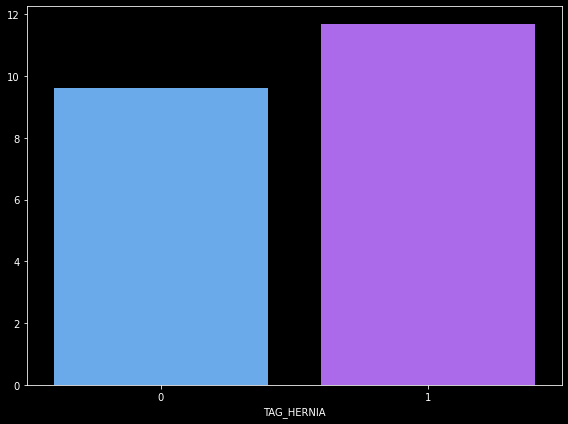

TAG_MINOR


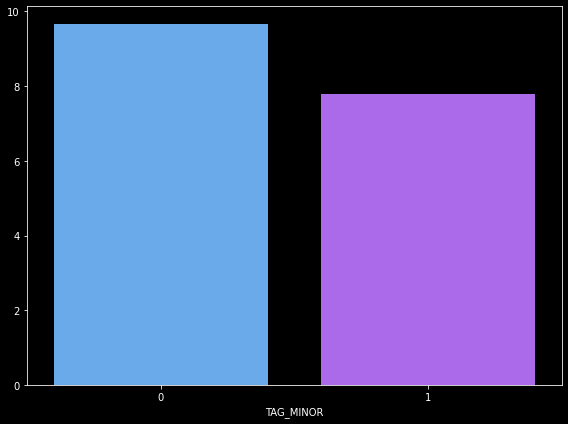

TAG_LITHIASES


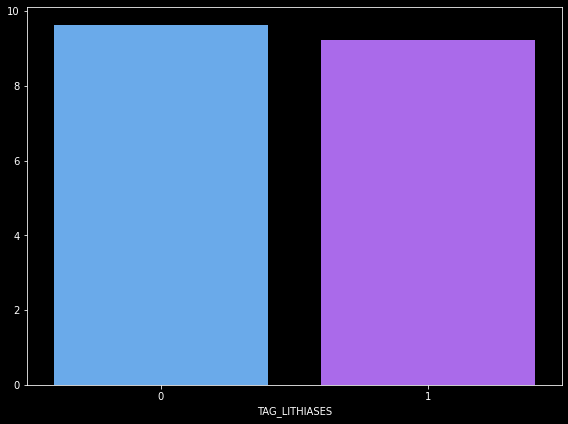

TAG_FOREIGN_BODY


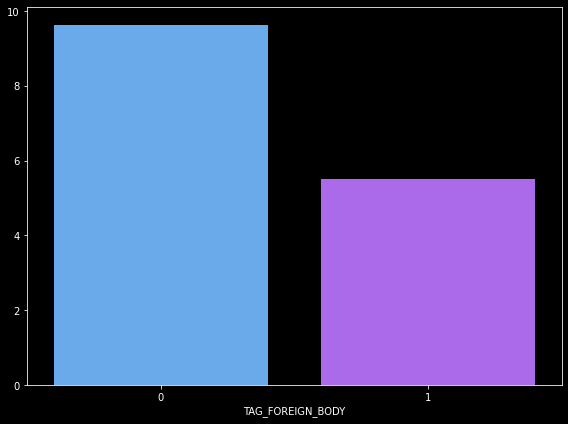

TAG_NONSPECIFIC


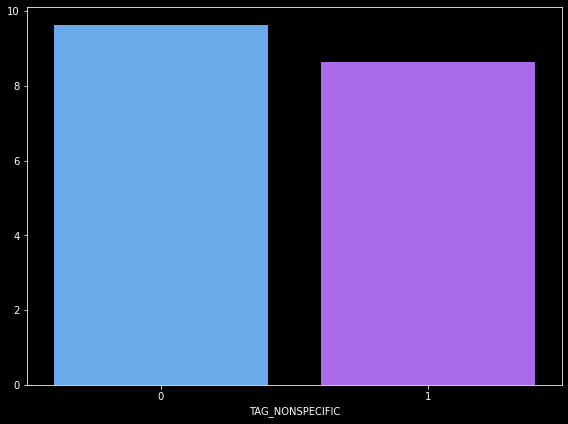

TAG_PROCEDURE


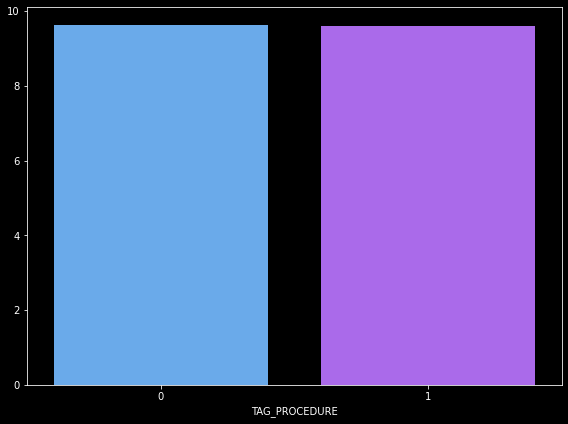

TAG_PREMATURE


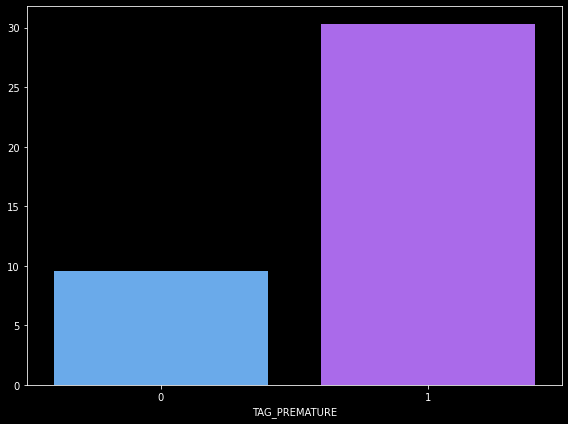

In [506]:
for c in X_2.columns[8:]:
    print(c)
    X_grouped = X_2.groupby(c).LOS
    X_means   = X_grouped.mean()

    plt.figure(figsize = (8,6))

    sns.barplot(x   = X_means.index,
                y   = X_means.values,
                #hue = X_grouped.count(),
                palette= 'cool')

    plt.tight_layout()
    plt.show()

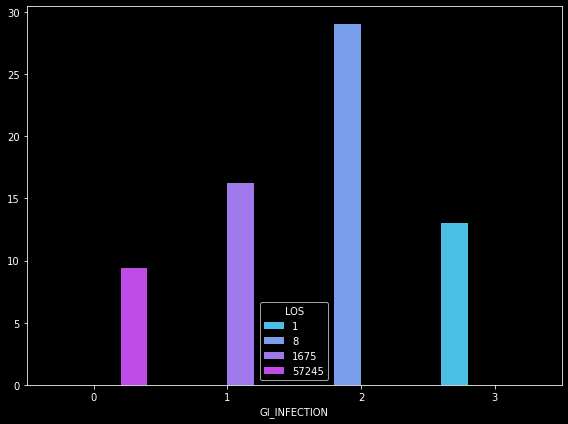

In [495]:
X_plot = X_2.groupby('GI_INFECTION').LOS.mean()

plt.figure(figsize = (8,6))

sns.barplot(x   = X_plot.index,
            y   = X_plot.values,
            hue = X_2.groupby('GI_INFECTION').LOS.count(),
            palette= 'cool')


#plt.title('Age Distribution by Gender')
#plt.legend(X_plot,frameon=False)
plt.tight_layout()

In [505]:
X_2.groupby('BACTERIAL_INFECTION_OTHER').LOS.count()

BACTERIAL_INFECTION_OTHER
0    54370
1     3917
2      545
3       85
4       11
6        1
Name: LOS, dtype: int64